# Lending Club Case Study


## Contents
1. [Problem Statement](#problem-statement)
2. [Goal](#goal)
3. [Initial Steps](#initial-steps)
    * [Import Required Libraries and Configure Default Settings](#import-required-libraries-and-configure-default-settings)
    * [Read the dataset](#read-the-dataset)
4. [Data Cleaning and Manipulation](#data-cleaning-and-manipulation)
    * [Analyse empty values in each column](#analyse-empty-values-in-each-column)
    * [Remove completely empty columns](#remove-completely-empty-columns)
    * [Check for single valued columns](#check-for-single-valued-columns)
    * [Analyse remaining columns](#analyse-remaining-columns)
    * [Remove general information columns](#remove-general-information-columns)
    * [Remove post-approval columns not useful for pre-approval risk assessment](#remove-post-approval-columns-not-useful-for-pre-approval-risk-assessment)
    * [Removing ongoing loans](#removing-ongoing-loans)
    * [Taking care of remaining columns with empty values](#taking-care-of-remaining-columns-with-empty-values)
        * [1. The number of months since the last public record and borrower's last delinquency](#1-the-number-of-months-since-the-last-public-record-and-borrowers-last-delinquency)
        * [2. Employment length](#2-employment-length)
        * [3. Number of public record bankruptcies](#3-number-of-public-record-bankruptcies)
        * [4. Revolving line utilization rate](#4-revolving-line-utilization-rate)
    * [Handling Incorrect Data Types](#handling-incorrect-data-types)
        * [Checking Data Types](#checking-data-types)
        * [1. Term (Numerical)](#1-term-numerical)
        * [2. Interest rate (Numerical)](#2-interest-rate-numerical)
        * [3. Employment Length (Numerical)](#3-employment-length-numerical)
        * [4. Revolving line utilization rate (Numerical)](#4-revolving-line-utilization-rate-numerical)
        * [5. Loan issue date (Date)](#5-loan-issue-date-date)
        * [6. Earliest reported credit line (Date)](#6-earliest-reported-credit-line-date)
    * [Check and remove any duplicate rows](#check-and-remove-any-duplicate-rows)
    * [Outlier Handling](#outlier-handling)
        * [Finding outlier columns](#finding-outlier-columns)
        * [Finding outlier threshold](#finding-outlier-threshold)
        * [Remove outliers above threshold](#remove-outliers-above-threshold)
        * [Check distribution after removing outliers](#check-distribution-after-removing-outliers)
    * [Sanity Checks](#sanity-checks)
        * [1. Range Check for Numerical and Date Columns](#1-range-check-for-numerical-and-date-columns)
        * [2. Earliest Credit Line Date Cannot Be More Than Issue Date](#2-earliest-credit-line-date-cannot-be-more-than-issue-date)
        * [3. Loan Amount matches the calculation of Term, Installment and Interest Rate](#3-loan-amount-matches-the-calculation-of-term-installment-and-interest-rate)
        * [4. Any columns with string value as NaN, None or Null](#4-any-columns-with-string-value-as-nan-none-or-null)
    * [Shape of dataframe after data cleaning and manipulation](#shape-of-dataframe-after-data-cleaning-and-manipulation)
5. [Analysis](#analysis)
    * [Derived Metrics](#derived-metrics)
        * [1. Annual Income (Data-driven Derived Metrics)](#1-annual-income-data-driven-derived-metrics)
        * [2. Loan Issue Date (Type driven Derived Metrics)](#2-loan-issue-date-type-driven-derived-metrics)
        * [3. Earliest credit line (Business driven Derived Metrics)](#3-earliest-credit-line-business-driven-derived-metrics)
        * [4. Loan Amount (Data and Business driven Derived Metrics)](#4-loan-amount-data-and-business-driven-derived-metrics)
        * [5. Installments (Business driven Derived Metrics)](#5-installments-business-driven-derived-metrics)
        * [6. DTI (Data driven Derived Metrics)](#6-dti-data-driven-derived-metrics)
        * [7. Revolving utilization rate (Data driven Derived Metrics)](#7-revolving-utilization-rate-data-driven-derived-metrics)
6. [Analysis of Target Variable](#analysis-of-target-variable)
7. [Visual Analysis (Univariate, Segmented Univariate, Bivariate, Multivariate Analysis)](#visual-analysis-univariate-segmented-univariate-bivariate-multivariate-analysis)
    * [Common Functions for plotting](#common-functions-for-plotting)
    * [Correlation between each numerical variable against Loan Status (Target Variable)](#correlation-between-each-numerical-variable-against-loan-status-target-variable)
        * [1. Loan Amount](#1-loan-amount)
        * [2. Annual Income](#2-annual-income)
        * [3. Loan Amount to Income Ratio](#3-loan-amount-to-income-ratio)
        * [4. Installment](#4-installment)
        * [5. Monthly Installment as percent of Income](#5-monthly-installment-as-percent-of-income)
        * [6. Installment to loan ratio](#6-installment-to-loan-ratio)
        * [7. DTI](#7-dti)
        * [8. Term](#8-term)
        * [9. Revolving Utilization](#9-revolving-utilization)
        * [10. Interest Rate](#10-interest-rate)
        * [11. Issue Date](#11-issue-date)
        * [12. Earliest Credit Line](#12-earliest-credit-line)
        * [13. Grade and Sub Grade](#13-grade-and-sub-grade)
        * [14. Verification Status](#14-verification-status)
        * [15. Purpose](#15-purpose)
        * [16. Employment Length](#16-employment-length)
        * [17. Home Ownership](#17-home-ownership)
        * [18. State (Address)](#18-state-address)
        * [19. Remaining columns/variables:](#19-remaining-columnsvariables)
            * a. Inquiries in the last 6 months (inq_last_6mths)
            * b. The number of open accounts (open_acc)
            * c. Revolving Balance (revol_bal)
            * d. The total number of credit line accounts (total_acc)
            * e. Number of 30+ days past-due incidences for the past 2 years (delinq_2yrs)
            * f. Number of derogatory public records (pub_rec)
            * g. Number of public record bankruptcies (pub_rec_bankruptcies)
8. [Summary of Key Conclusions](#summary-of-key-conclusions)
9. [Next Business Steps](#next-business-steps)

## Problem Statement:
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Goal:

Our goal is to identify the key factors or common underlying factors that lead to loan defaults or charge offs. Understanding these will help us make informed business decisions, such as lowering interest rates or applying stricter loan approvals.

---
---
## Initial Steps

### Import Required Libraries and Configure Default Settings

In [3695]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline in Jupyter notebooks (added just for ensuring compatibility; may not be required)
%matplotlib inline 

In [3696]:
# Display all columns
pd.options.display.max_columns = None

### Read the dataset

In [3697]:
#read the dataset and check the first 5 rows

loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [3698]:
#Check the shape of the dataframe
print('Initial shape of dataframe: ', loan_data.shape)

Initial shape of dataframe:  (39717, 111)


---
---
## Data Cleaning and Manipulation

### Analyse empty values in each column

In [3699]:
#count of empty values in each column
loan_data.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

<div class="alert alert-block alert-info">Some columns are completely empty. 
Let's remove these columns since they don't add any value to our analysis.</div>

### Remove completely empty columns

In [3700]:
#Remove all columns having empty values
loan_data.dropna(axis=1, how='all', inplace = True)

#Check the shape again
print('After removing columns with all empty values: ', loan_data.shape)


After removing columns with all empty values:  (39717, 57)


### Check for single valued columns

In [3701]:
single_valued_columns = loan_data.loc[:, loan_data.nunique() == 1].columns #Get all the columns that has only single value
loan_data[single_valued_columns].head()

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0          n                   f                         0.0            1   
1          n                   f                         0.0            1   
2          n                   f                         0.0            1   
3          n                   f                         0.0            1   
4          n                   f                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   
3       INDIVIDUAL               0                       0.0            0   
4       INDIVIDUAL               0                       0.0            0   

   tax_liens  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

<div class="alert alert-block alert-info">Above columns have only a single value. 
Let's remove these columns since they don't add any value to our analysis, as they have no variation for analysis.</div>

### Remove single valued columns

In [3702]:
#Remove all columns having only single values
loan_data = loan_data.loc[:, loan_data.nunique() > 1]

#Check the shape again
print('After removing columns having only single values: ', loan_data.shape)

After removing columns having only single values:  (39717, 48)


### Analyse remaining columns

In [3703]:
print('Remaining Columns: ', list(loan_data.columns)) #Remaining columns till now
loan_data.head()

Remaining Columns:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.

### Remove general information columns

<div class="alert alert-block">
We'll be dropping the following General Information columns since they won't help in our analysis:

1. **emp_title:** Job titles can vary even for similar roles, so it's not useful.
2. **member_id:** Unique identifier without analytical value.
3. **desc:** Free-text loan descriptions
4. **url:** URL for the loan listing.
5. **title:** Loan title provided by the borrower.
6. **zip_code:** First 3 digits of the ZIP code provided by the borrower.
7. **id:** Unique LC assigned ID for the loan listing, without analytical value.
8. **last_credit_pull_d:** The most recent month LC pulled credit for this loan.

</div>

In [3704]:
print('Shape before deleting general columns: ', loan_data.shape)
general_information_columns = ['emp_title','member_id', 'desc', 'url', 'title', 'zip_code','id','last_credit_pull_d']
loan_data.drop(general_information_columns, axis=1, inplace=True)
print('Shape after deleting general columns: ', loan_data.shape)
loan_data.head()


Shape before deleting general columns:  (39717, 48)
Shape after deleting general columns:  (39717, 40)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0  Dec-11   Fully Paid     credit_card         AZ  27.65            0   
1  Dec-11  Charged Off             car         GA   1.00            0   
2  Dec-11   Fully Paid  small_business         IL   8.72            0   
3  Dec-11   Fully Paid           other         CA  20.00            0   
4  Dec-11      Current           other         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d  pub_rec_bankruptcies  
0       Jan-15           171.62          NaN                   0.0  
1       Apr-13           119.66          NaN                   0.0  
2       Jun-14           649.91          NaN                   0.0  
3       Jan-15           357.48          NaN                   0.0  
4       May-16            67.79       Jun-16                   0.0

### Remove post-approval columns not useful for pre-approval risk assessment

<div class="alert alert-block">
We will drop the following columns since they provide information available only after loan approval and are not useful for pre-approval risk assessment:

1. **out_prncp:** Remaining outstanding principal for total amount funded.
2. **total_pymnt:** Payments received to date for total amount funded.
3. **total_rec_prncp:** Principal received to date.
4. **total_rec_int:** Interest received to date.
5. **total_rec_late_fee:** Late fees received to date.
6. **recoveries:** Post charge off gross recovery.
7. **collection_recovery_fee:** Fees paid for recovery.
8. **last_pymnt_d:** Last month payment was received.
9. **last_pymnt_amnt:** Last total payment amount received.
10. **next_pymnt_d:** Next scheduled payment date.
11. **out_prncp_inv:** Remaining outstanding principal for portion of total amount funded by investors.
12. **total_pymnt_inv:** Total payments received to date for portion of total amount funded by investors.
13. **funded_amnt:** Total amount committed by investors for that loan at that point in time.
14. **funded_amnt_inv:** Total amount committed by investors for that loan at that point in time.
</div>

In [3705]:
print('Shape before deleting columns not useful for pre-approval risk assessment: ', loan_data.shape)
post_approval_columns = ['out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                         'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','out_prncp_inv',
                         'total_pymnt_inv','funded_amnt','funded_amnt_inv']
loan_data.drop(post_approval_columns, axis=1, inplace=True)
print('Shape after deleting columns not useful for pre-approval risk assessment: ', loan_data.shape)
loan_data.head()

Shape before deleting columns not useful for pre-approval risk assessment:  (39717, 40)
Shape after deleting columns not useful for pre-approval risk assessment:  (39717, 26)


loan_amnt        term int_rate  installment grade sub_grade emp_length  \
0       5000   36 months   10.65%       162.87     B        B2  10+ years   
1       2500   60 months   15.27%        59.83     C        C4   < 1 year   
2       2400   36 months   15.96%        84.33     C        C5  10+ years   
3      10000   36 months   13.49%       339.31     C        C1  10+ years   
4       3000   60 months   12.69%        67.79     B        B5     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

          purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card         AZ  27.65            0           Jan-85   
1             car         GA   1.00            0           Apr-99   
2  small_business         IL   8.72            0           Nov-01   
3           other         CA  20.00            0           Feb-96   
4           other         OR  17.94            0           Jan-96   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0               1                     NaN                     NaN         3   
1               5                     NaN                     NaN         3   
2               2                     NaN                     NaN         2   
3               1                    35.0                     NaN        10   
4               0                    38.0                     NaN        15   

   pub_rec  revol_bal revol_util  total_acc  pub_rec_bankruptcies  
0        0      13648     83.70%          9                   0.0  
1        0       1687      9.40%          4                   0.0  
2        0       2956     98.50%         10                   0.0  
3        0       5598        21%         37                   0.0  
4        0      27783     53.90%         38                   0.0

In [3706]:
#Let's check all values of Loan Status
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Removing ongoing loans

In [3707]:
#Since we need to do pre-approval risk assessment, we don't require current customers with ongoing loan
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data['loan_status'].value_counts()
print('Shape after remove rows of customers with ongoing loan: ', loan_data.shape)

Shape after remove rows of customers with ongoing loan:  (38577, 26)


### Taking care of remaining columns with empty values

In [3708]:
#Columns has most empty values
loan_data.isnull().sum().sort_values(ascending=False) 

mths_since_last_record    35837
mths_since_last_delinq    24905
emp_length                 1033
pub_rec_bankruptcies        697
revol_util                   50
dti                           0
total_acc                     0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
loan_amnt                     0
term                          0
purpose                       0
loan_status                   0
issue_d                       0
verification_status           0
annual_inc                    0
home_ownership                0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
addr_state                    0
dtype: int64

#### 1. The number of months since the last public record and borrower's last delinquency

<div class="alert alert-block alert-info">
Let's check the percentage of null values for the columns <b>mths_since_last_record</b> and <b>mths_since_last_delinq</b> specifically for defaulters/charged off customers. These columns could be critical indicators for identifying defaulters.
</div>

In [3709]:
charged_off_customers_specific_columns = loan_data[loan_data.loan_status == 'Charged Off'][["mths_since_last_record","mths_since_last_delinq"]] 
#Percentage of null values for columns mths_since_last_record and mths_since_last_delinq of defaulters/ChargedOff customers
print('Below is the percent of entries empty for Charged Off customers:')
np.round(100 * charged_off_customers_specific_columns.isnull().sum()/len(charged_off_customers_specific_columns),2).astype(str) + '%'

Below is the percent of entries empty for Charged Off customers:


mths_since_last_record    89.73%
mths_since_last_delinq    61.93%
dtype: object

<div class="alert alert-block alert-info">

Since both **mths_since_last_record** and **mths_since_last_delinq** have more than 60% of entries empty for charged-off customers, we will drop these columns.

</div>

In [3710]:
loan_data.drop(['mths_since_last_record','mths_since_last_delinq'], axis=1, inplace=True) #dropping mths_since_last_record and mths_since_last_delinq
print('Shape after deleting columns with more than 60 percent of empty values for charged off customers: ', loan_data.shape)
loan_data.head()

Shape after deleting columns with more than 60 percent of empty values for charged off customers:  (38577, 24)


loan_amnt        term int_rate  installment grade sub_grade emp_length  \
0       5000   36 months   10.65%       162.87     B        B2  10+ years   
1       2500   60 months   15.27%        59.83     C        C4   < 1 year   
2       2400   36 months   15.96%        84.33     C        C5  10+ years   
3      10000   36 months   13.49%       339.31     C        C1  10+ years   
5       5000   36 months    7.90%       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

          purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card         AZ  27.65            0           Jan-85   
1             car         GA   1.00            0           Apr-99   
2  small_business         IL   8.72            0           Nov-01   
3           other         CA  20.00            0           Feb-96   
5         wedding         AZ  11.20            0           Nov-04   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   
1               5         3        0       1687      9.40%          4   
2               2         2        0       2956     98.50%         10   
3               1        10        0       5598        21%         37   
5               3         9        0       7963     28.30%         12   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

#### 2. Employment length

<div class="alert alert-block alert-info">

Since loan status is our target variable in this analysis, let's find the frequency of **Employment Length** against each loan status.

</div>

In [3711]:
#create pivot to check frequency of emp_length against each loan status
emp_length_pivot_table = loan_data.pivot_table(index='emp_length', columns='loan_status', aggfunc='size') 
emp_length_pivot_table['Total'] = emp_length_pivot_table.sum(axis=1) #calculate Total Summary 
emp_length_pivot_table.sort_values(by='Total', ascending=False) #sort by Total column


loan_status  Charged Off  Fully Paid  Total
emp_length                                 
10+ years           1331        7157   8488
< 1 year             639        3869   4508
2 years              567        3724   4291
3 years              555        3457   4012
4 years              462        2880   3342
5 years              458        2736   3194
1 year               456        2713   3169
6 years              307        1861   2168
7 years              263        1448   1711
8 years              203        1232   1435
9 years              158        1068   1226

<div class="alert alert-block alert-info">

In the pivot table above, we can see that "10+ years" of emp_length has the highest frequency by a huge margin, regardless of loan status. Therefore, we will fill the empty **emp_length** values with its mode ("10+ years").

</div>

In [3712]:
emp_length_mode = loan_data['emp_length'].mode()[0] #get the mode
loan_data['emp_length'].fillna(emp_length_mode, inplace=True) #replace empty values with mode 
print('Empty values in emp_length: ',loan_data['emp_length'].isna().sum())

Empty values in emp_length:  0


#### 3. Number of public record bankruptcies

<div class="alert alert-block alert-info">

Since loan status is our target variable in this analysis, let's find the frequency of **public record bankruptcies** against each loan status.

</div>

In [3713]:
#create pivot to check frequency of pub_rec_bankruptcies_pivot_table against each loan status
pub_rec_bankruptcies_pivot_table = loan_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', aggfunc='size')
pub_rec_bankruptcies_pivot_table['Total'] = pub_rec_bankruptcies_pivot_table.sum(axis=1) #calculate Total Summary 
pub_rec_bankruptcies_pivot_table.sort_values(by='Total', ascending=False) #sort by Total column

loan_status           Charged Off  Fully Paid  Total
pub_rec_bankruptcies                                
0.0                          5141       31097  36238
1.0                           366        1271   1637
2.0                             2           3      5

<div class="alert alert-block alert-info">

In the pivot table above, we can see that **pub_rec_bankruptcies** with a value of 0.0 has the highest frequency by a huge margin, regardless of loan status. So, we will fill the empty **pub_rec_bankruptcies** values with its mode.

</div>

In [3714]:
pub_rec_bankruptcies_mode = loan_data['pub_rec_bankruptcies'].mode()[0] #get mode
loan_data['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True) #fill empty values with mode
print('Empty values in pub_rec_bankruptcies: ',loan_data['pub_rec_bankruptcies'].isna().sum())

Empty values in pub_rec_bankruptcies:  0


#### 4. Revolving line utilization rate

<div class="alert alert-block alert-info">

For the revolving line utilization rate, we have very few empty values. We can take two steps to handle these missing values:

1. Remove the rows with empty revolving line utilization rate, as it won't significantly affect our analysis.
2. Replace the empty values with the mode or median, depending on the distribution.

Given the small number of missing records, it's better to **remove the empty data rather than make assumptions**. Therefore, we will remove the rows with empty revolving line utilization rates.

</div>

In [3715]:
loan_data.dropna(subset = ["revol_util"], axis=0,inplace=True)
print('Empty values in revol_util: ',loan_data['revol_util'].isna().sum())

Empty values in revol_util:  0


### Handling Incorrect Data Types 

#### Checking Data Types

In [3716]:
print(loan_data.dtypes)
loan_data.head()

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object


loan_amnt        term int_rate  installment grade sub_grade emp_length  \
0       5000   36 months   10.65%       162.87     B        B2  10+ years   
1       2500   60 months   15.27%        59.83     C        C4   < 1 year   
2       2400   36 months   15.96%        84.33     C        C5  10+ years   
3      10000   36 months   13.49%       339.31     C        C1  10+ years   
5       5000   36 months    7.90%       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

          purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card         AZ  27.65            0           Jan-85   
1             car         GA   1.00            0           Apr-99   
2  small_business         IL   8.72            0           Nov-01   
3           other         CA  20.00            0           Feb-96   
5         wedding         AZ  11.20            0           Nov-04   

   inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0               1         3        0      13648     83.70%          9   
1               5         3        0       1687      9.40%          4   
2               2         2        0       2956     98.50%         10   
3               1        10        0       5598        21%         37   
5               3         9        0       7963     28.30%         12   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

<div class="alert alert-block alert-info">

Based on the above data analysis and its data types, we need to convert the following columns:

**To Numeric (integer or float):**
1. term
2. int_rate
3. emp_length
4. revol_util

**To Date:**
1. issue_d
2. earliest_cr_line

</div>

#### 1. Term (Numerical)

In [3717]:
loan_data.term.value_counts() #check values in term

term
 36 months    29049
 60 months     9478
Name: count, dtype: int64

In [3718]:
loan_data["term"] = loan_data["term"].apply(lambda val: int(val.replace(" months",""))) #remove " months" and convert to integer
loan_data["term"].describe() #let's check term's distribution

count    38527.000000
mean        41.904223
std         10.336550
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

#### 2. Interest rate (Numerical)

In [3719]:
loan_data.int_rate.value_counts() #check values in interest rate

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [3720]:
loan_data["int_rate"] = loan_data["int_rate"].apply(lambda val: float(val.rstrip("%"))) #remove % symbol and convert to float
loan_data["int_rate"].describe() #let's check int_rate's distribution

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

#### 3. Employment Length (Numerical)

In [3721]:
loan_data.emp_length.value_counts() #check values in employment length

emp_length
10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: count, dtype: int64

<div class="alert alert-block alert-info">

For the **emp_length** column, we'll make the following assumptions:
1. "< 1 year" will be considered as 0 years.
2. "10+ years" will be considered as 10 years.

</div>

In [3722]:
def clean_emp_length(emp_length):
    if emp_length == '< 1 year': #if emp_length is "less than 1 year", return 0
        return 0
    elif emp_length == '10+ years': #if emp_length is "10+ year", return 10
        return 10
    else:
        # Take the first part (number) from splitted word and convert to integer
        return int(emp_length.split()[0])

In [3723]:
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda val: clean_emp_length(val)) #convert employment length to integer
loan_data["emp_length"].value_counts() #let's check emp_length's frequency

emp_length
10    9517
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: count, dtype: int64

In [3724]:
loan_data["emp_length"].describe() #let's check emp_length's distribution

count    38527.000000
mean         5.078594
std          3.603060
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

#### 4. Revolving line utilization rate (Numerical)

In [3725]:
loan_data.revol_util.value_counts() #check values in revolving line utilization rate

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [3726]:
loan_data["revol_util"] = loan_data["revol_util"].apply(lambda val: float(val.rstrip("%"))) #remove % symbol and convert to float
loan_data["revol_util"].describe() #let's check revol_util's distribution

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

#### 5. Loan issue date (Date)

In [3727]:
loan_data.issue_d.value_counts() #check values in Loan Issue Date

issue_d
Nov-11    2060
Dec-11    2042
Oct-11    1940
Sep-11    1913
Aug-11    1798
Jul-11    1742
Jun-11    1727
May-11    1609
Apr-11    1559
Mar-11    1440
Jan-11    1380
Feb-11    1297
Dec-10    1266
Oct-10    1128
Nov-10    1121
Jul-10    1118
Sep-10    1085
Aug-10    1075
Jun-10    1024
May-10     920
Apr-10     827
Mar-10     736
Feb-10     626
Nov-09     601
Dec-09     596
Jan-10     587
Oct-09     544
Sep-09     449
Aug-09     408
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [3728]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y') # Convert to date format
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
1       2500    60     15.27        59.83     C        C4           0   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card         AZ  27.65            0           Jan-85   
1             car         GA   1.00            0           Apr-99   
2  small_business         IL   8.72            0           Nov-01   
3           other         CA  20.00            0           Feb-96   
5         wedding         AZ  11.20            0           Nov-04   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
1               5         3        0       1687         9.4          4   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

#### 6. Earliest reported credit line (Date)

In [3729]:
loan_data.earliest_cr_line.value_counts() #check values in Earliest reported credit line

earliest_cr_line
Oct-99    360
Nov-98    357
Dec-98    340
Oct-00    340
Dec-97    317
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [3730]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y') # Convert to date format
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
1       2500    60     15.27        59.83     C        C4           0   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0     credit_card         AZ  27.65            0       1985-01-01   
1             car         GA   1.00            0       1999-04-01   
2  small_business         IL   8.72            0       2001-11-01   
3           other         CA  20.00            0       1996-02-01   
5         wedding         AZ  11.20            0       2004-11-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
1               5         3        0       1687         9.4          4   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

### Check and remove any duplicate rows

In [3731]:
#Check Duplicate rows
print('Duplicate rows: ' , loan_data.duplicated().sum())

Duplicate rows:  0


<div class="alert alert-block alert-info">There is no duplicate rows in our dataframe</div>

### Outlier Handling

#### Finding outlier columns

In [3732]:
#Get all numeric columns
numeric_outliers_columns = loan_data.select_dtypes(include=['number']).columns
print('Total numeric columns: ', len(numeric_outliers_columns))

Total numeric columns:  15


<div class="alert alert-block">
Function to generate box plots for all the numeric columns provided and display them in a tabular pattern
</div>

In [3733]:
# Generate box plots for all the numeric columns passed and displays in tabular pattern where no. of column is specified with num_cols parameter
def generate_box_plot(data_frame, numeric_column_list, num_cols):
    if len(numeric_column_list) == 0:
        return "Parameters specified are not accurate. There must be at least 1 numeric column in the list specified."
    if num_cols < 1:
        return "Parameters specified are not accurate. num_cols cannot be less than 1."

    num_plots = len(numeric_column_list)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5 * num_rows))

    # Handle edge case for axes when No. of rows or No. of cols are 1
    # axes is always a 2D array for consistent indexing     
    if num_rows == 1 and num_cols == 1: #axes is a single Axes object.
        axes = [[axes]]
    elif num_rows == 1: #axes is a 1D array of Axes objects.
        axes = [axes]
    elif num_cols == 1: #axes is a 1D array of Axes objects.
        axes = [[ax] for ax in axes]

    # Define a color palette
    palette = sns.color_palette("coolwarm", max(num_cols, num_plots))

    # Add all boxplots to subplots
    for i, col in enumerate(numeric_column_list):
        row_pos, col_pos = divmod(i, num_cols)
        sns.boxplot(y=data_frame[col], ax=axes[row_pos][col_pos], color=palette[i % len(palette)])
        axes[row_pos][col_pos].set_title(f'Box Plot of {col}')
        axes[row_pos][col_pos].set_ylabel(col)

    # Hide any empty subplots
    if num_plots < num_rows * num_cols:
        for j in range(num_plots, num_rows * num_cols):
            fig.delaxes(axes[j // num_cols][j % num_cols])

    plt.tight_layout()
    plt.show()



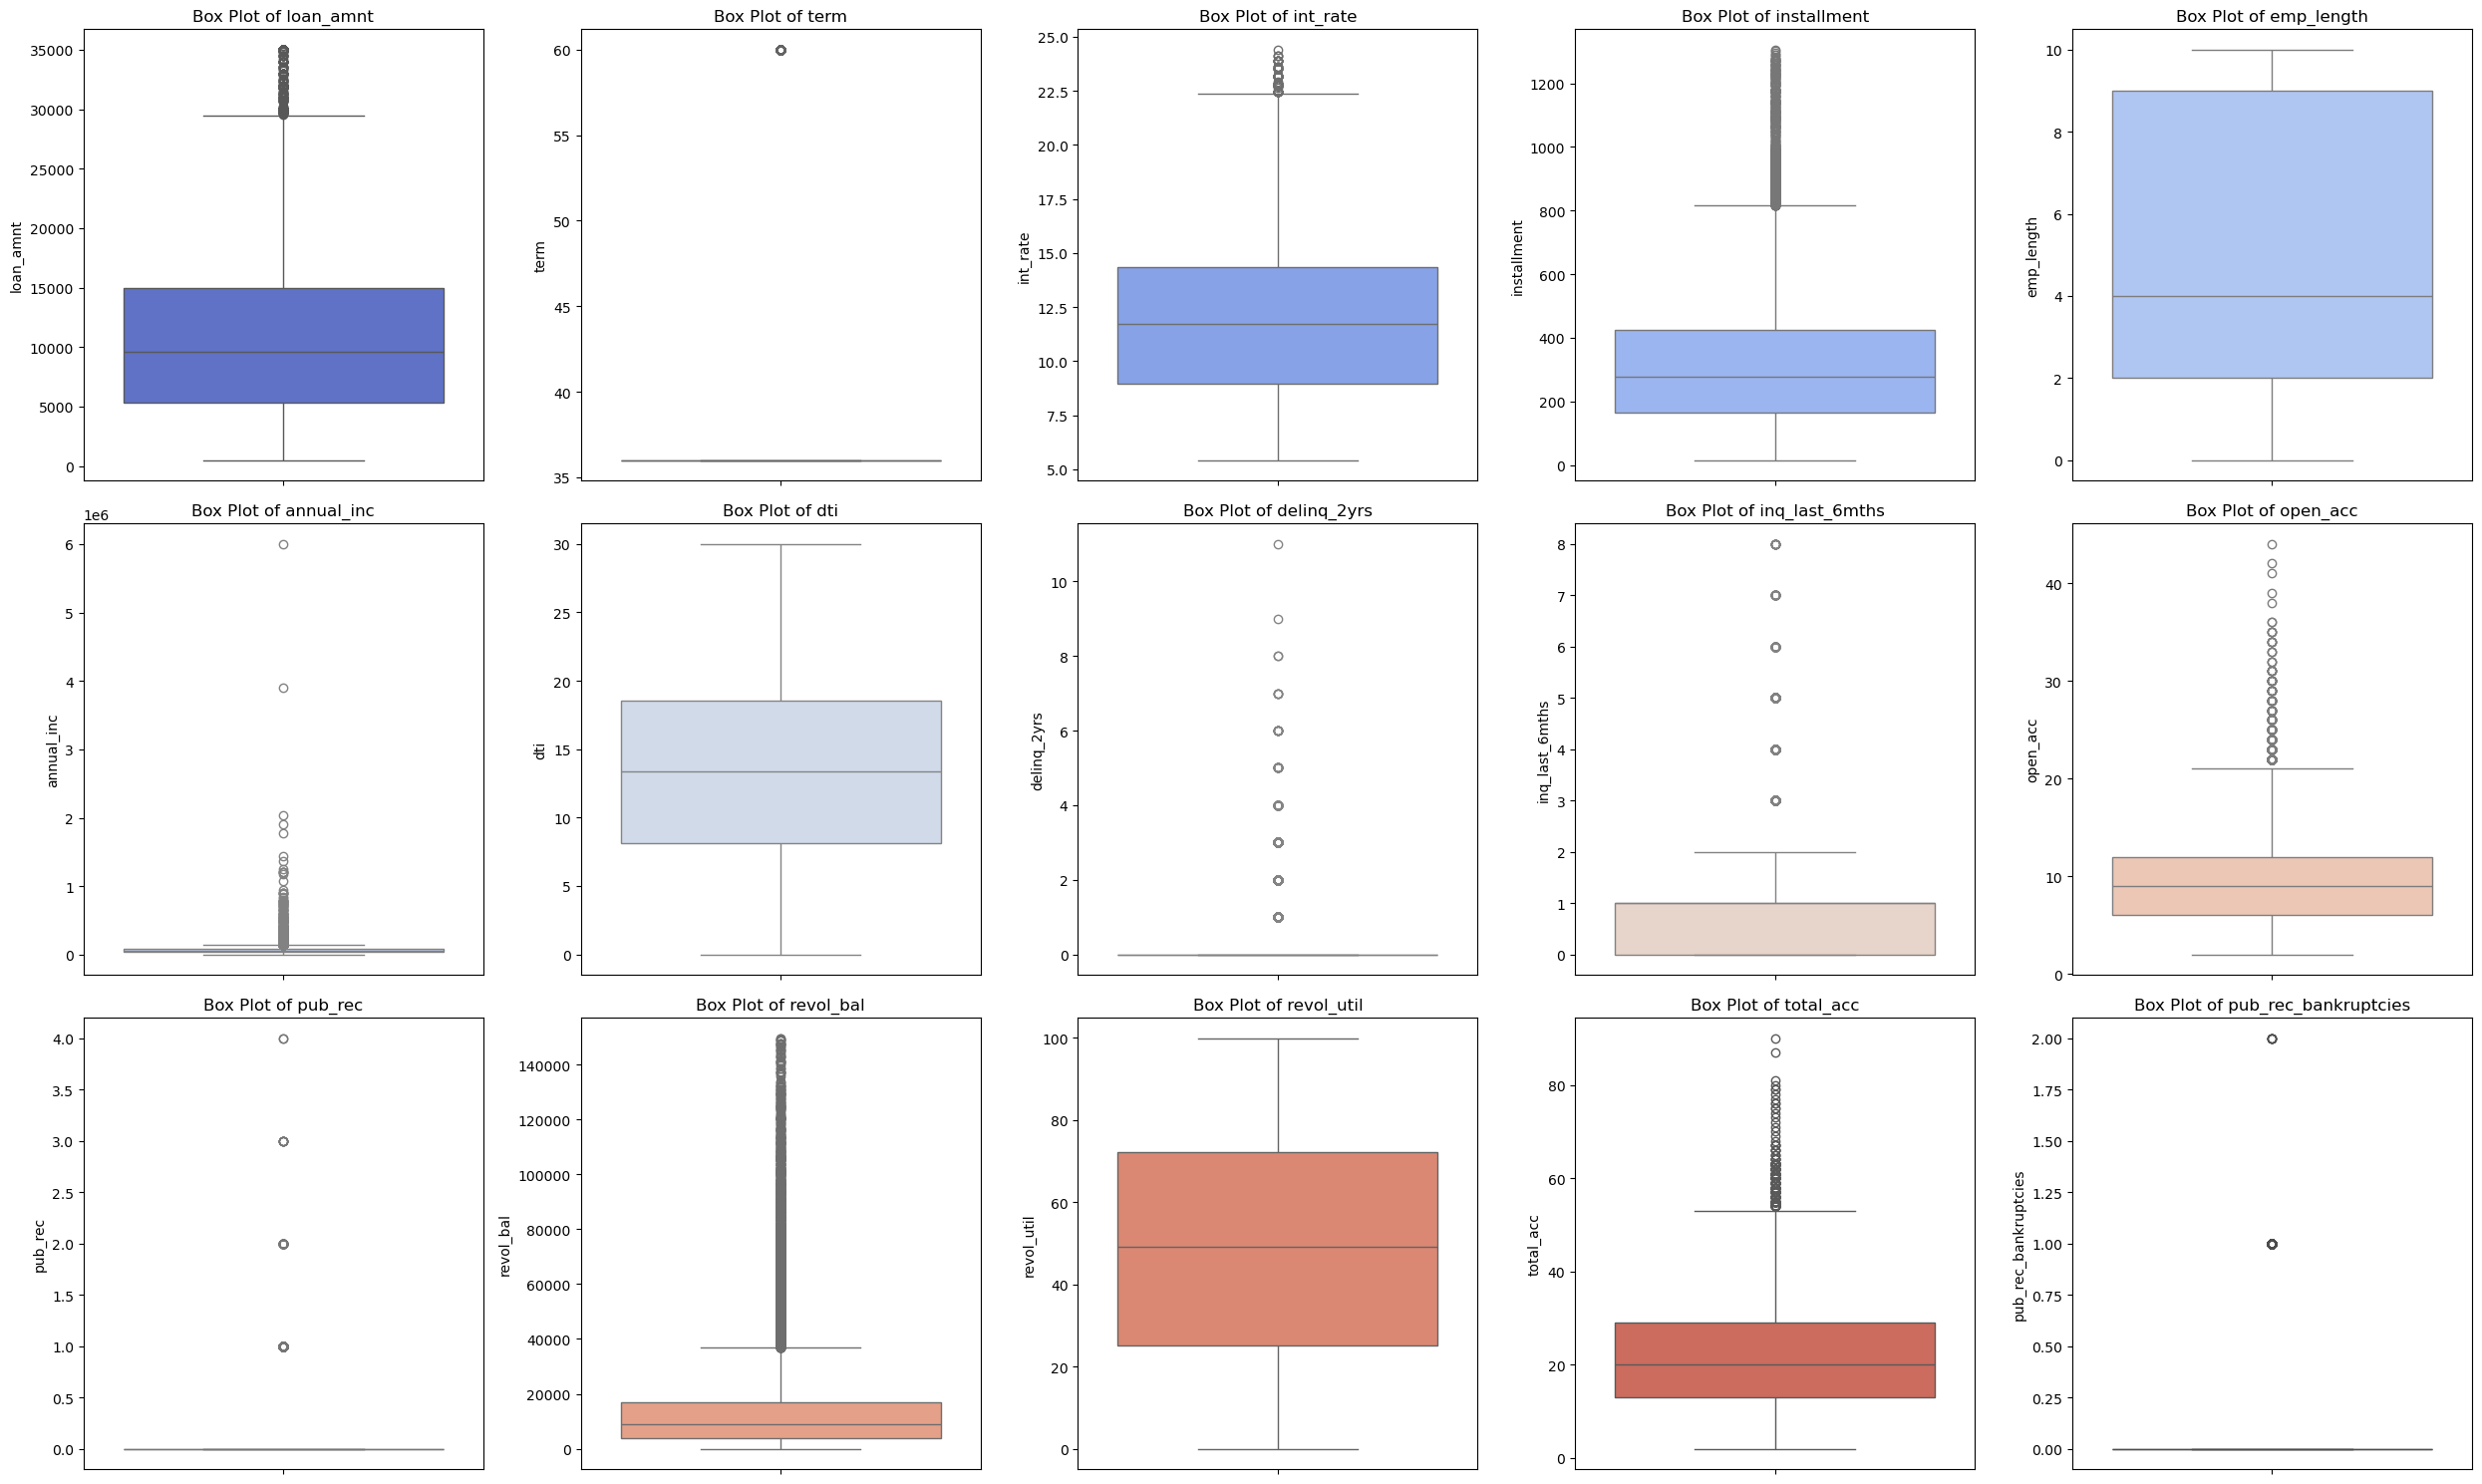

In [3734]:
generate_box_plot(loan_data,numeric_outliers_columns, 5)  #show all numeric column box plot in n * 5 subplot

<div class="alert alert-block alert-info">

We can see that **emp_length**, **dti**, and **revol_util** have no outliers. Therefore, we will not examine their outliers further.

</div>

In [3735]:
#remove the columns without outliers, to focus on columns with outliers
no_outlier_columns = ['emp_length','dti','revol_util']
numeric_outliers_columns = list(numeric_outliers_columns) #converting column index to list, in order to remove columns with no outliers
for no_outlier_col in no_outlier_columns:
    numeric_outliers_columns.remove(no_outlier_col)

print('Columns to examine for outliers: ' , numeric_outliers_columns)

Columns to examine for outliers:  ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies']


#### Finding outlier threshold

In [3736]:
#Each outlier column's with quantile values
quantiles = [0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
loan_data[numeric_outliers_columns].quantile(quantiles).T

0.90         0.91         0.92        0.93  \
loan_amnt              21600.000   23000.0000   24000.0000   25000.000   
term                      60.000      60.0000      60.0000      60.000   
int_rate                  16.820      17.1400      17.3344      17.560   
installment              621.222     645.3194     663.2704     682.842   
annual_inc            115000.000  120000.0000  122000.0000  127500.000   
delinq_2yrs                1.000       1.0000       1.0000       1.000   
inq_last_6mths             2.000       3.0000       3.0000       3.000   
open_acc                  15.000      16.0000      16.0000      16.000   
pub_rec                    0.000       0.0000       0.0000       0.000   
revol_bal              28980.000   30764.2400   32724.8400   35052.540   
total_acc                 38.000      38.0000      39.0000      41.000   
pub_rec_bankruptcies       0.000       0.0000       0.0000       0.000   

                           0.94       0.95       0.96         0.97       0.98  \
loan_amnt              25000.00   25000.00   25000.00   28000.0000   30000.00   
term                      60.00      60.00      60.00      60.0000      60.00   
int_rate                  17.99      18.30      18.67      19.2900      19.91   
installment              710.03     760.82     805.08     831.0858     870.39   
annual_inc            134176.00  140004.00  150000.00  165000.0000  187000.00   
delinq_2yrs                1.00       1.00       1.00       1.0000       2.00   
inq_last_6mths             3.00       3.00       3.00       3.0000       3.00   
open_acc                  17.00      17.00      18.00      19.0000      20.00   
pub_rec                    0.00       1.00       1.00       1.0000       1.00   
revol_bal              37866.00   41412.60   46054.52   52946.6600   63465.84   
total_acc                 42.00      43.00      45.00      48.0000      51.00   
pub_rec_bankruptcies       0.00       0.00       1.00       1.0000       1.00   

                           0.99        1.00  
loan_amnt              35000.00    35000.00  
term                      60.00       60.00  
int_rate                  20.90       24.40  
installment              931.09     1305.19  
annual_inc            234000.00  6000000.00  
delinq_2yrs                2.00       11.00  
inq_last_6mths             4.00        8.00  
open_acc                  22.00       44.00  
pub_rec                    1.00        4.00  
revol_bal              83303.22   149588.00  
total_acc                 56.00       90.00  
pub_rec_bankruptcies       1.00        2.00

<div class="alert alert-block alert-info">

Based on the above table, we can identify sharp deviations and handle outliers as follows:

1. **loan_amnt**: Remove outliers beyond the 96th percentile.
2. **term**: No outliers to remove as the values are fixed (36 or 60).
3. **int_rate**: Remove outliers beyond the 99th percentile.
4. **installment**: Remove outliers beyond the 98th percentile.
5. **annual_inc**: Remove outliers beyond the 96th percentile.
6. **delinq_2yrs**: Remove outliers beyond the 99th percentile.
7. **inq_last_6mths**: Remove outliers beyond the 98th percentile (it was 3 continuously from the 95th to 98th percentiles).
8. **open_acc**: Remove outliers beyond the 98th percentile.
9. **pub_rec**: Remove outliers beyond the 99th percentile (from the 95th to 99th percentiles, it is 1).
10. **revol_bal**: Remove outliers beyond the 95th percentile.
11. **total_acc**: Remove outliers beyond the 98th percentile (values > 51).
12. **pub_rec_bankruptcies**: Remove outliers beyond the 99th percentile.

</div>

In [3737]:
# Outlier threshold for each column
quantiles = {
    'loan_amnt': 0.96,
    'int_rate': 0.99,
    'installment': 0.98,
    'annual_inc': 0.96,
    'delinq_2yrs': 0.99,
    'inq_last_6mths': 0.98,
    'open_acc': 0.98,
    'pub_rec': 0.99,
    'revol_bal': 0.95,
    'total_acc': 0.98,
    'pub_rec_bankruptcies': 0.99
}

# find total outliers in each columns/variables
outlier_counts = {}
for col, percentile in quantiles.items():
    threshold = loan_data[col].quantile(percentile)
    count_above_threshold = (loan_data[col] > threshold).sum()
    outlier_counts[col] = count_above_threshold

# Convert the result to a DataFrame for better visualization
outlier_counts_df = pd.DataFrame(outlier_counts.items(), columns=['Column', 'Total Outliers above threshold'])

#Find percentage of records that are outliers for each columns/variables
outlier_counts_df["Percentage of records that are outliers"] = np.round(100 * outlier_counts_df['Total Outliers above threshold'] / len(loan_data),2).astype(str) + "%"
outlier_counts_df


Column  Total Outliers above threshold  \
0              loan_amnt                            1435   
1               int_rate                             385   
2            installment                             769   
3             annual_inc                            1485   
4            delinq_2yrs                             310   
5         inq_last_6mths                             571   
6               open_acc                             730   
7                pub_rec                              57   
8              revol_bal                            1927   
9              total_acc                             695   
10  pub_rec_bankruptcies                               5   

   Percentage of records that are outliers  
0                                    3.72%  
1                                     1.0%  
2                                     2.0%  
3                                    3.85%  
4                                     0.8%  
5                                    1.48%  
6                                    1.89%  
7                                    0.15%  
8                                     5.0%  
9                                     1.8%  
10                                   0.01%

<div class="alert alert-block alert-info">

Since the outliers are very few for each column, we will simply delete them.

</div>

#### Remove outliers above threshold

In [3738]:
loan_data_len_with_outliers = len(loan_data) #Total entries including outliers
print('Total entries including outliers: ', loan_data_len_with_outliers)

#Removing the outliers
for col, percentile in quantiles.items():
    threshold = loan_data[col].quantile(percentile)
    loan_data = loan_data[loan_data[col] <= threshold]

loan_data_len_without_outliers = len(loan_data)
print('Total entries excluding outliers: ', loan_data_len_without_outliers)

print('No. of records retained after deleting outliers: ', np.round(100 * loan_data_len_without_outliers/loan_data_len_with_outliers,2),'%' )

Total entries including outliers:  38527
Total entries excluding outliers:  31030
No. of records retained after deleting outliers:  80.54 %


#### Check distribution after removing outliers

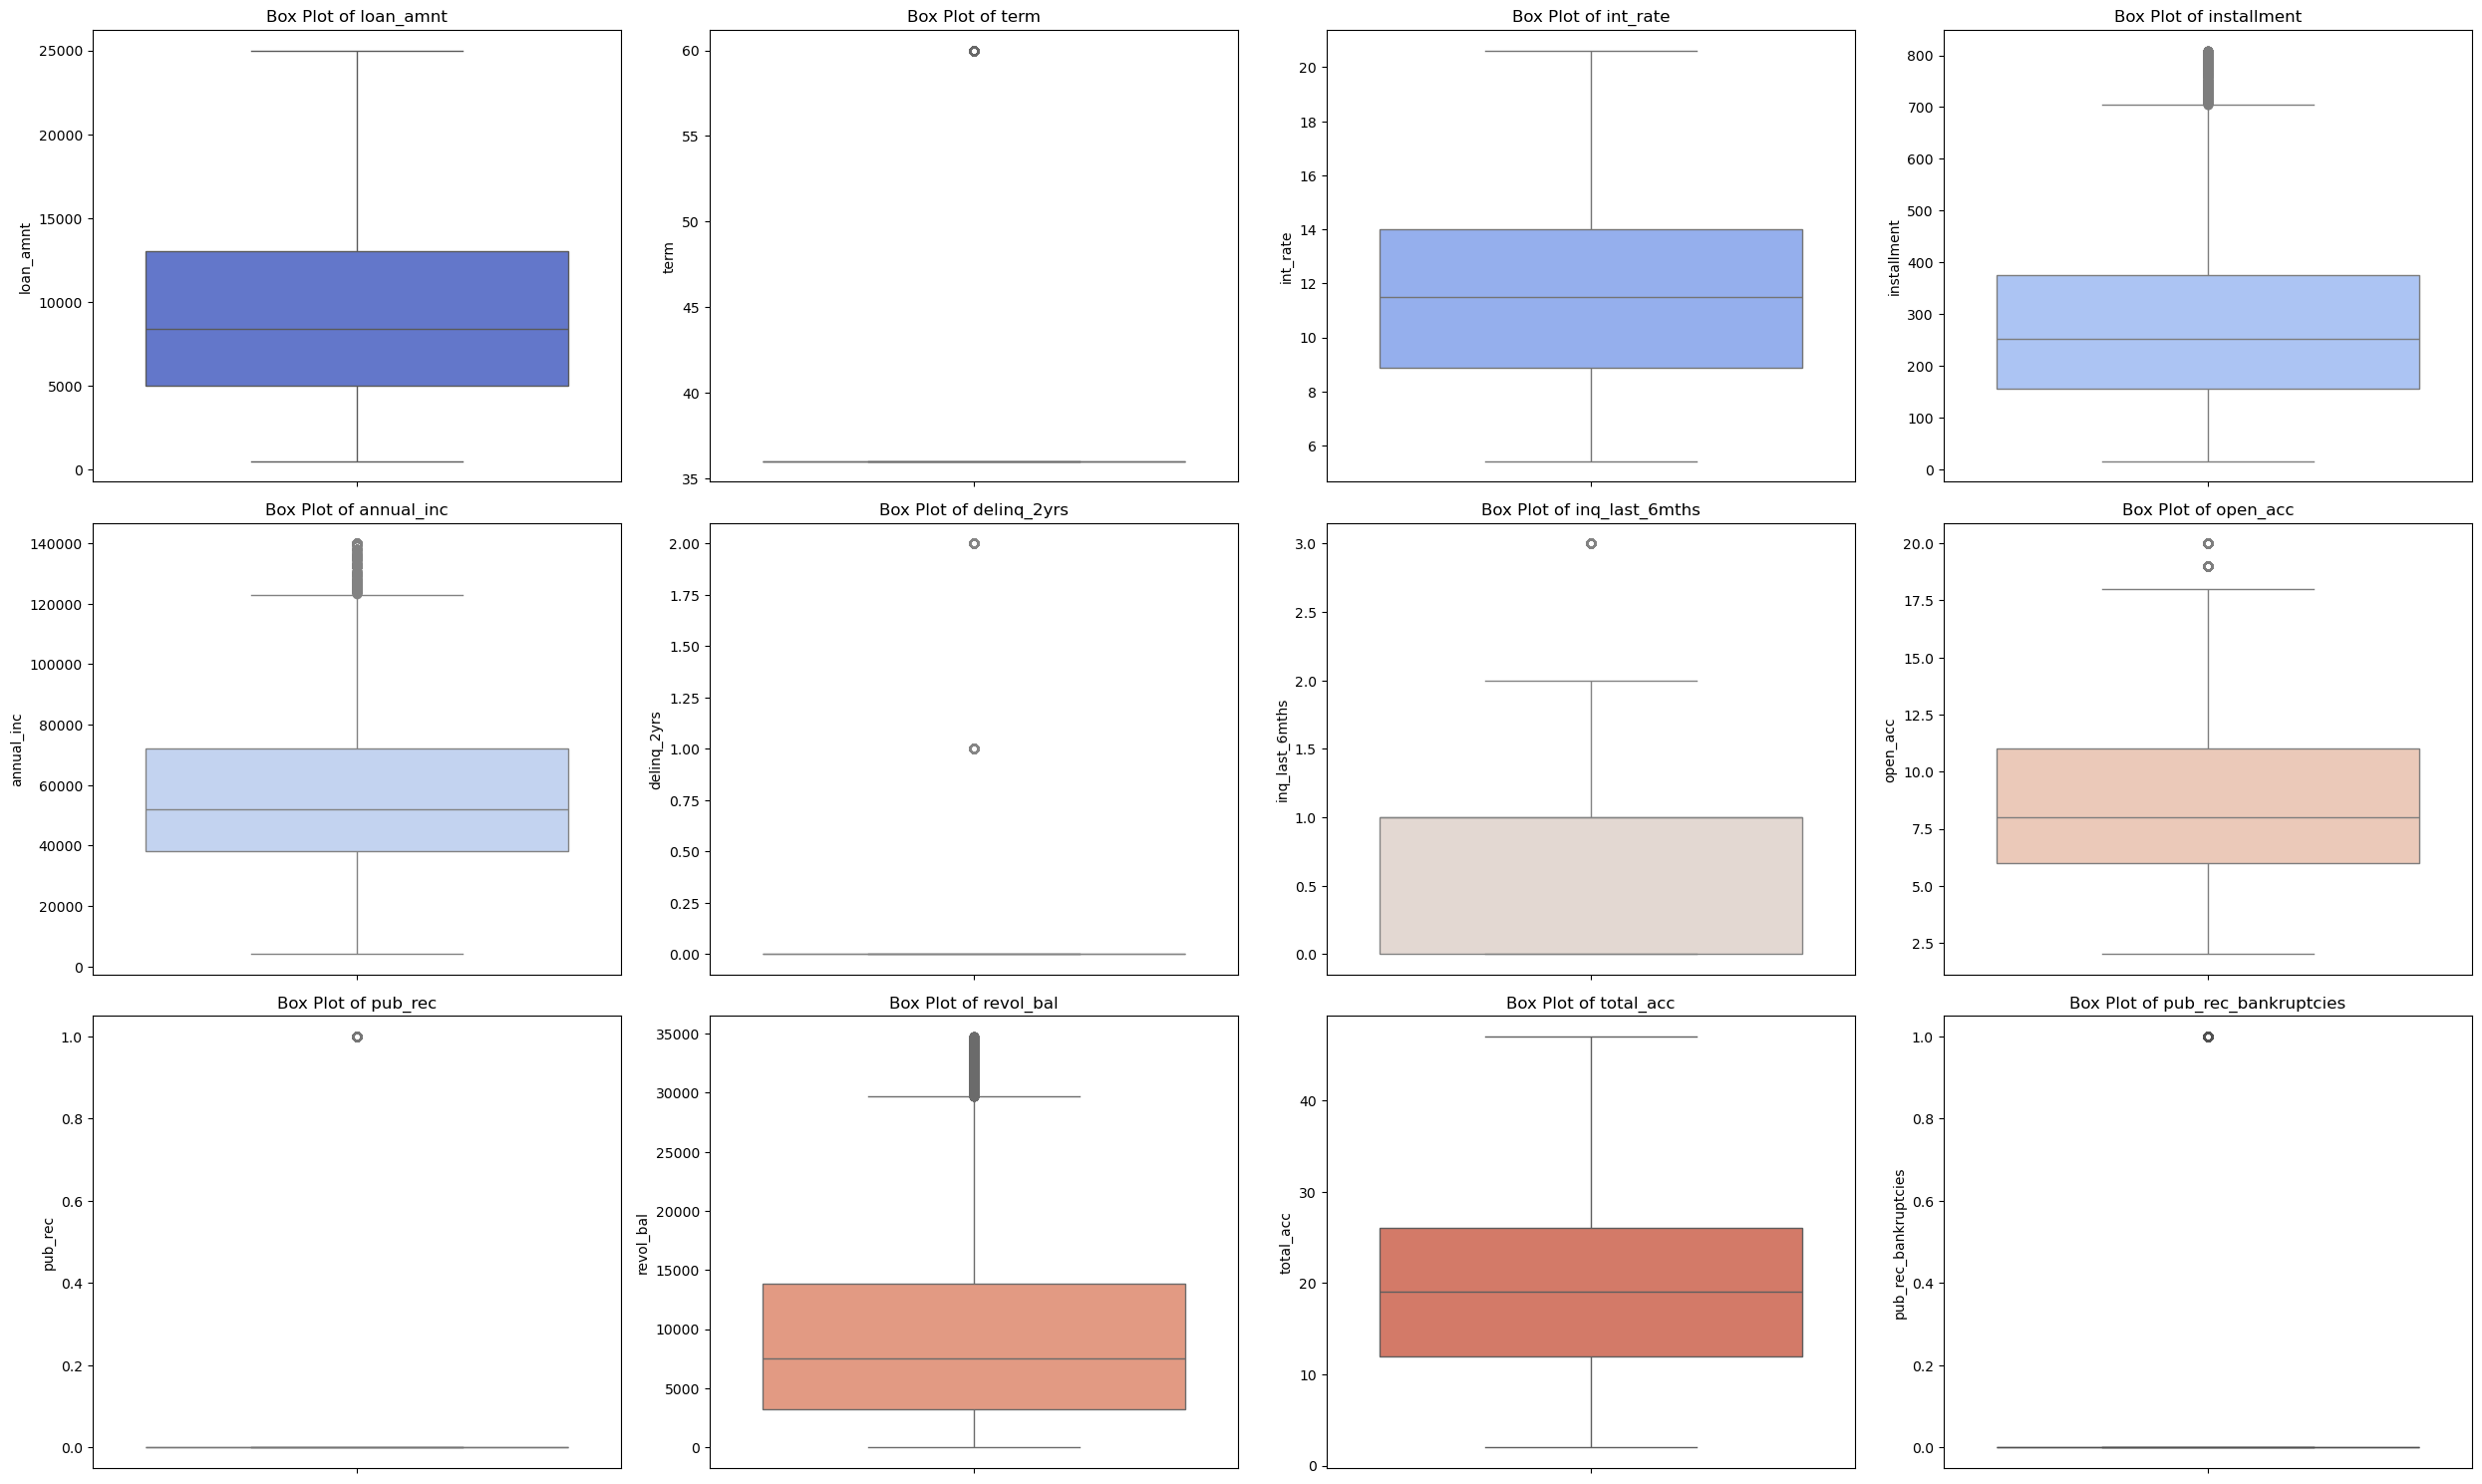

In [3739]:
generate_box_plot(loan_data,numeric_outliers_columns, 4)  #show all numeric column with outliers box plot in n * 4 subplot

<div class="alert alert-block alert-info">

Although there are still a few outliers, we will retain them to preserve the data. We can also observe that the distribution in the boxplot has improved after removing the most significant outliers.

</div>

### Sanity Checks

#### 1. Range Check for Numerical and Date Columns

In [3740]:
all_numeric_date_columns = loan_data.select_dtypes(include=['number','datetime']).columns # All Numeric or Date columns
#get range of all numerical and date columns
for col in all_numeric_date_columns:
    print(f"Range of column {col}: {loan_data[col].min()} to {loan_data[col].max()}")

Range of column loan_amnt: 500 to 25000
Range of column term: 36 to 60
Range of column int_rate: 5.42 to 20.62
Range of column installment: 15.69 to 809.62
Range of column emp_length: 0 to 10
Range of column annual_inc: 4000.0 to 140000.0
Range of column issue_d: 2007-06-01 00:00:00 to 2011-12-01 00:00:00
Range of column dti: 0.0 to 29.99
Range of column delinq_2yrs: 0 to 2
Range of column earliest_cr_line: 1969-02-01 00:00:00 to 2068-12-01 00:00:00
Range of column inq_last_6mths: 0 to 3
Range of column open_acc: 2 to 20
Range of column pub_rec: 0 to 1
Range of column revol_bal: 0 to 34753
Range of column revol_util: 0.0 to 99.9
Range of column total_acc: 2 to 47
Range of column pub_rec_bankruptcies: 0.0 to 1.0


<div class="alert alert-block alert-info">

We've noticed that some entries in **earliest_cr_line** (the month the borrower's earliest reported credit line was opened) have incorrect dates. Let's remove rows with **earliest_cr_line** dates from 2012 (our dataset date range).

</div>

In [3741]:
loan_data = loan_data[loan_data['earliest_cr_line'] < '2012-01-01'] #remove rows with earliest_cr_line dates from 2012
loan_data['earliest_cr_line'].describe() # let's check the range of earliest_cr_line again

count                            30967
mean     1997-12-05 19:33:58.027577856
min                1969-02-01 00:00:00
25%                1994-12-01 00:00:00
50%                1999-02-01 00:00:00
75%                2002-06-01 00:00:00
max                2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object

#### 2. Earliest Credit Line Date Cannot Be More Than Issue Date

In [3742]:
print('Number of records with credit line date is more than issue date: ', len(loan_data[loan_data["earliest_cr_line"] > loan_data["issue_d"]]))

Number of records with credit line date is more than issue date:  0


<div class="alert alert-block alert-info">
There are no incorrect entries where the earliest credit line date is later than the issue date.
</div>

#### 3. Loan Amount matches the calculation of Term, Installment and Interest Rate

In [3743]:
# function to calculate loan amount using Term, Installment and Interest Rate
def calculate_loan_amount(installment, term, int_rate):
    # Convert annual rate to monthly
    monthly_rate = (int_rate / 100) / 12
    # Calculate loan amount using the formula for an annuity
    loan_amnt = installment * (1 - (1 + monthly_rate) ** -term) / monthly_rate
    return np.round(loan_amnt).astype(int) #Loan Amount is in integer datatype


<div class="alert alert-block alert-info">
Let's calculate the loan amount for each row based on the term, installment, and interest rate. Then, we'll check for any loan amounts that don't match the calculated values.
</div>

In [3744]:
# Calculate loan amount for each row and check loan amount that doesn't matches calculation
calculated_loan_amnt = loan_data.apply(lambda row: calculate_loan_amount(row['installment'], row['term'], row['int_rate']), axis=1)
print('Number of records with miscalculated loan amount: ', loan_data[loan_data.loan_amnt != calculated_loan_amnt].shape[0])

Number of records with miscalculated loan amount:  2675


In [3745]:
#We will drop miscalculated loan amount records
loan_data = loan_data[loan_data.loan_amnt == calculated_loan_amnt]
print('Shape after dropping miscalulated loan amount records: ', loan_data.shape)

Shape after dropping miscalulated loan amount records:  (28292, 24)


#### 4. Any columns with string value as NaN, None or Null

In [3746]:
# Apply the function to check string value for 'NaN', 'None', 'Null' across the string column and sum per column
nan_columns = loan_data[loan_data.select_dtypes(include=['object']).columns].map(lambda val: val.lower() in ["nan", "none", "null"]).sum()
# Filter columns that have any 'NaN', 'None', 'Null'
columns_with_nan = nan_columns[nan_columns > 0]

# Display the columns
columns_with_nan

home_ownership    2
dtype: int64

In [3747]:
# check home ownership values
loan_data['home_ownership'].value_counts()

home_ownership
RENT        14964
MORTGAGE    10985
OWN          2283
OTHER          58
NONE            2
Name: count, dtype: int64

<div class="alert alert-block alert-info">

Since **Home Ownership** has only 2 values as NONE, any action wouldn't affect our analysis much. We'll replace the missing values with the mode.

</div>

In [3748]:
# Calculate the mode of the 'home_ownership' column
mode_home_ownership = loan_data['home_ownership'].mode()[0]

# Replace 'NONE' values with the mode
loan_data['home_ownership'] = loan_data['home_ownership'].replace('NONE', mode_home_ownership)

# check home ownership values
loan_data['home_ownership'].value_counts()

home_ownership
RENT        14966
MORTGAGE    10985
OWN          2283
OTHER          58
Name: count, dtype: int64

### Shape of dataframe after data cleaning and manipulation

In [3749]:
print('Shape of dataframe after data cleaning and manipulation: ',loan_data.shape)

Shape of dataframe after data cleaning and manipulation:  (28292, 24)


---
---
## Analysis

### Derived Metrics

In [3750]:
loan_data.columns #checking all the columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')


<div class="alert alert-block alert-info">
Function to check the distribution of a variable/column with a box plot and display the lower/upper fence
</div>

In [3751]:
#Function to check the distribution of a variable/column with a box plot and display the lower/upper fence
def check_distribution(data_frame,col):
    print(f"{col} Distribution:")
    
    # Calculate descriptive statistics
    desc_stats = loan_data[col].describe()

    # Calculate the IQR
    Q1 = desc_stats['25%']
    Q3 = desc_stats['75%']
    IQR = Q3 - Q1

    # Calculate whisker values
    lower_fence_normalised = max(desc_stats['min'],Q1 - 1.5 * IQR)
    upper_fence_normalised = min(desc_stats['max'],Q3 + 1.5 * IQR)

    # Add whisker values to the descriptive statistics table
    desc_stats['lower_fence_normalised'] = lower_fence_normalised
    desc_stats['upper_fence_normalised'] = upper_fence_normalised

    # Convert to DataFrame for better presentation
    desc_stats_df = desc_stats.to_frame()
    print(desc_stats_df)

    data_frame[col].plot.box()
    plt.show()

#### 1. Annual Income (Data driven Derived Metrics)
a. Income Brackets (Data driven Derived Metrics using distribution) - can be useful for analyzing annual income bin wise

annual_inc Distribution:
                           annual_inc
count                    28292.000000
mean                     56403.345598
std                      25807.216686
min                       4000.000000
25%                      37266.450000
50%                      51998.000000
75%                      70800.000000
max                     140000.000000
lower_fence_normalised    4000.000000
upper_fence_normalised  121100.325000


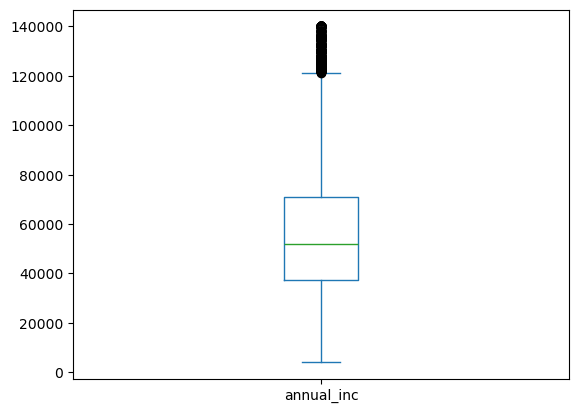

In [3752]:
#let's check Annual Income Distribution to create brackets
check_distribution(loan_data,"annual_inc")

In [3753]:
#Assigning Income Brackets based on above distribution and percentiles
income_bins = [0, 37266, 51998, 70800, 121100, float('inf')]
income_labels = ['Low ($0 - $37,266)', 'Lower-Middle ($37,266 - $51,998)', 'Middle ($51,998 - $70,800)', 'Upper-Middle ($70,800 - $1,21,100)', 'High ($1,21,100+)']
loan_data['annual_income_bracket'] = pd.cut(loan_data['annual_inc'], bins=income_bins, labels=income_labels)
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  
0                   0.0                Low ($0 - $37,266)  
2                   0.0                Low ($0 - $37,266)  
3                   0.0  Lower-Middle ($37,266 - $51,998)  
5                   0.0                Low ($0 - $37,266)  
6                   0.0  Lower-Middle ($37,266 - $51,998)

#### 2. Loan Issue Date (Type driven Derived Metrics)
Derive metrics that can be useful for analyzing loan issue date:<br>
    a. Month (Type driven Derived Metrics)<br>
    b. Year (Type driven Derived Metrics)<br>
    c. Quarter (Type driven Derived Metrics)

In [3754]:
# Get month, year and quarter from issue_d
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_quarter'] = loan_data['issue_d'].dt.quarter
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  issue_month  \
0                   0.0                Low ($0 - $37,266)           12   
2                   0.0                Low ($0 - $37,266)           12   
3                   0.0  Lower-Middle ($37,266 - $51,998)           12   
5                   0.0                Low ($0 - $37,266)           12   
6                   0.0  Lower-Middle ($37,266 - $51,998)           12   

   issue_year  issue_quarter  
0        2011              4  
2        2011              4  
3        2011              4  
5        2011              4  
6        2011              4

### 3. Earliest credit line (Business driven Derived Metrics) 
Derive metrics that can be useful for analyzing earliest credit history:<br>
    a. Years between Earliest credit history and loan issue date (Business driven Derived Metrics)

In [3755]:
#Years between Earliest credit history and loan issue date
loan_data['years_since_earliest_credit_during_issue'] = loan_data['issue_d'].dt.year - loan_data['earliest_cr_line'].dt.year
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  issue_month  \
0                   0.0                Low ($0 - $37,266)           12   
2                   0.0                Low ($0 - $37,266)           12   
3                   0.0  Lower-Middle ($37,266 - $51,998)           12   
5                   0.0                Low ($0 - $37,266)           12   
6                   0.0  Lower-Middle ($37,266 - $51,998)           12   

   issue_year  issue_quarter  years_since_earliest_credit_during_issue  
0        2011              4                                        26  
2        2011              4                                        10  
3        2011              4                                        15  
5        2011              4                                         7  
6        2011              4                                         6

#### 4. Loan Amount (Data and Business driven Derived Metrics) 
Derive metrics that can be useful for analyzing loan amount:<br>
    a. Loan Amount bins (Data driven Derived Metrics) <br>
    b. Loan Amount to Income Ratio (Business driven Derived Metrics) <br>

loan_amnt Distribution:
                           loan_amnt
count                   28292.000000
mean                     9062.369221
std                      5447.159597
min                       500.000000
25%                      5000.000000
50%                      8000.000000
75%                     12000.000000
max                     25000.000000
lower_fence_normalised    500.000000
upper_fence_normalised  22500.000000


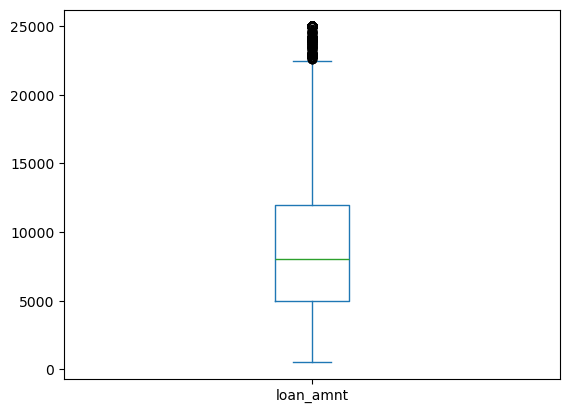

In [3756]:
#First let's check Loan Amount Distribution to create bins
check_distribution(loan_data,"loan_amnt")

In [3757]:
#Based on above distribution and percentiles, we can create Loan amount bins
loan_amnt_bins = [0, 5000, 8000, 12000, 15000, 22500, float('inf')]
loan_amnt_labels = ['0-5k', '5k-8k', '8k-12k', '12k-15k', '15k-22.5k', '22.5k+']
loan_data['loan_amnt_bins'] = pd.cut(loan_data['loan_amnt'], bins=loan_amnt_bins, labels=loan_amnt_labels)


In [3758]:
#Loan Amount to Income Ratio
loan_data['loan_amnt_income_ratio'] = np.round(loan_data['loan_amnt'] / loan_data['annual_inc'],2)
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  issue_month  \
0                   0.0                Low ($0 - $37,266)           12   
2                   0.0                Low ($0 - $37,266)           12   
3                   0.0  Lower-Middle ($37,266 - $51,998)           12   
5                   0.0                Low ($0 - $37,266)           12   
6                   0.0  Lower-Middle ($37,266 - $51,998)           12   

   issue_year  issue_quarter  years_since_earliest_credit_during_issue  \
0        2011              4                                        26   
2        2011              4                                        10   
3        2011              4                                        15   
5        2011              4                                         7   
6        2011              4                                         6   

  loan_amnt_bins  loan_amnt_income_ratio  
0           0-5k                    0.21  
2           0-5k                    0.20  
3         8k-12k                    0.20  
5           0-5k                    0.14  
6          5k-8k                    0.15

#### 5. Installments (Business driven Derived Metrics)
Derive metrics that can be useful for analyzing installments:<br>
    a. Installment to Loan ratio (Business driven Derived Metrics)<br>
    b. Annual Installment as Percentage of Annual Income, or Monthly Installment as Percentage of Monthly Income (Business driven Derived Metrics)<br>

In [3759]:
#Installment to Loan ratio
loan_data['installment_to_loan_ratio'] = np.round(loan_data['installment'] / loan_data['loan_amnt'],2)
#Annual Installment as Percentage of Annual Income, or Monthly Installment as Percentage of Monthly Income
loan_data['installment_as_percent_of_monthly_income'] = np.round(100*(loan_data['installment'] * 12) / loan_data['annual_inc'],2)

loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  issue_month  \
0                   0.0                Low ($0 - $37,266)           12   
2                   0.0                Low ($0 - $37,266)           12   
3                   0.0  Lower-Middle ($37,266 - $51,998)           12   
5                   0.0                Low ($0 - $37,266)           12   
6                   0.0  Lower-Middle ($37,266 - $51,998)           12   

   issue_year  issue_quarter  years_since_earliest_credit_during_issue  \
0        2011              4                                        26   
2        2011              4                                        10   
3        2011              4                                        15   
5        2011              4                                         7   
6        2011              4                                         6   

  loan_amnt_bins  loan_amnt_income_ratio  installment_to_loan_ratio  \
0           0-5k                    0.21                       0.03   
2           0-5k                    0.20                       0.04   
3         8k-12k                    0.20                       0.03   
5           0-5k                    0.14                       0.03   
6          5k-8k                    0.15                       0.02   

   installment_as_percent_of_monthly_income  
0                                      8.14  
2                                      8.26  
3                                      8.28  
5                                      5.22  
6                                      4.34

#### 6. DTI (Data driven Derived Metrics) 
Derive metrics that can be useful during analyzing dti:<br>
    a. dti risk brackets (Data driven Derived Metrics) <br>

dti Distribution:
                                 dti
count                   28292.000000
mean                       13.107292
std                         6.667924
min                         0.000000
25%                         7.950000
50%                        13.140000
75%                        18.360000
max                        29.990000
lower_fence_normalised      0.000000
upper_fence_normalised     29.990000


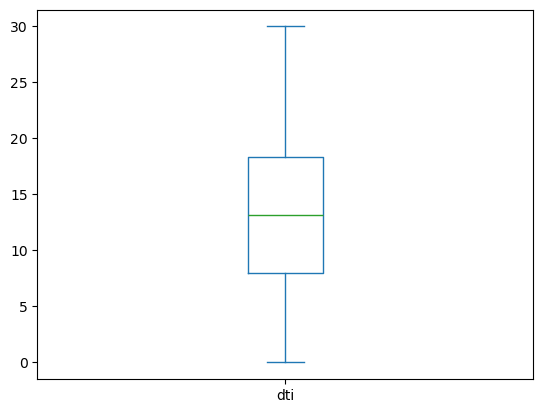

In [3760]:
#let's check DTI Distribution to create brackets
check_distribution(loan_data,"dti")

In [3761]:
#Assign DTI risk brackets based on above distribution
dti_bins = [0, 7.95, 13.14, 18.36, float('inf')]
dti_labels = ['Low', 'Moderate', 'High', 'Very High']
loan_data['dti_bracket'] = pd.cut(loan_data['dti'], bins=dti_bins, labels=dti_labels)
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  issue_month  \
0                   0.0                Low ($0 - $37,266)           12   
2                   0.0                Low ($0 - $37,266)           12   
3                   0.0  Lower-Middle ($37,266 - $51,998)           12   
5                   0.0                Low ($0 - $37,266)           12   
6                   0.0  Lower-Middle ($37,266 - $51,998)           12   

   issue_year  issue_quarter  years_since_earliest_credit_during_issue  \
0        2011              4                                        26   
2        2011              4                                        10   
3        2011              4                                        15   
5        2011              4                                         7   
6        2011              4                                         6   

  loan_amnt_bins  loan_amnt_income_ratio  installment_to_loan_ratio  \
0           0-5k                    0.21                       0.03   
2           0-5k                    0.20                       0.04   
3         8k-12k                    0.20                       0.03   
5           0-5k                    0.14                       0.03   
6          5k-8k                    0.15                       0.02   

   installment_as_percent_of_monthly_income dti_bracket  
0                                      8.14   Very High  
2                                      8.26    Moderate  
3                                      8.28   Very High  
5                                      5.22    Moderate  
6                                      4.34   Very High

#### 7. Revolving utilization rate (Data driven Derived Metrics)
Derive metrics that can be useful during analyzing Revolving utilization rate:<br>
    a. Revolving utilization Brackets<br>

revol_util Distribution:
                          revol_util
count                   28292.000000
mean                       48.335788
std                        28.270378
min                         0.000000
25%                        25.000000
50%                        48.500000
75%                        71.700000
max                        99.900000
lower_fence_normalised      0.000000
upper_fence_normalised     99.900000


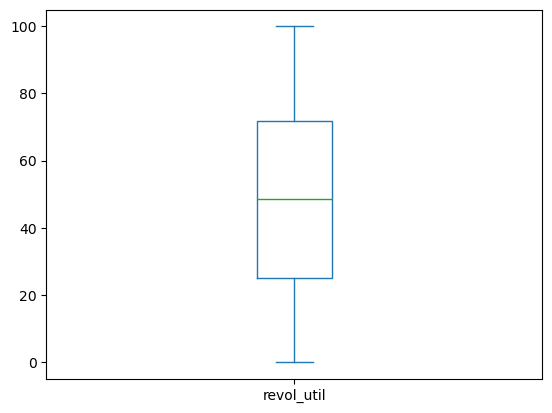

In [3762]:
#let's check Revolving Utilization to create brackets
check_distribution(loan_data,"revol_util")

In [3763]:
#Assigning Revolving Utilization brackets based on above distribution
revol_util_bins = [0, 25, 48.5, 71.7, float('inf')]
revol_util_labels = ['Low utilization', 'Medium utilization', 'High utilization', 'Very high utilization']
loan_data['revol_util_bracket'] = pd.cut(loan_data['revol_util'], bins=revol_util_bins, labels=revol_util_labels)
loan_data.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2          10   
2       2400    36     15.96        84.33     C        C5          10   
3      10000    36     13.49       339.31     C        C1          10   
5       5000    36      7.90       156.46     A        A4           3   
6       7000    60     15.96       170.08     C        C5           8   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   
6           RENT     47004.0        Not Verified 2011-12-01  Fully Paid   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0         credit_card         AZ  27.65            0       1985-01-01   
2      small_business         IL   8.72            0       2001-11-01   
3               other         CA  20.00            0       1996-02-01   
5             wedding         AZ  11.20            0       2004-11-01   
6  debt_consolidation         NC  23.51            0       2005-07-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
5               3         9        0       7963        28.3         12   
6               1         7        0      17726        85.6         11   

   pub_rec_bankruptcies             annual_income_bracket  issue_month  \
0                   0.0                Low ($0 - $37,266)           12   
2                   0.0                Low ($0 - $37,266)           12   
3                   0.0  Lower-Middle ($37,266 - $51,998)           12   
5                   0.0                Low ($0 - $37,266)           12   
6                   0.0  Lower-Middle ($37,266 - $51,998)           12   

   issue_year  issue_quarter  years_since_earliest_credit_during_issue  \
0        2011              4                                        26   
2        2011              4                                        10   
3        2011              4                                        15   
5        2011              4                                         7   
6        2011              4                                         6   

  loan_amnt_bins  loan_amnt_income_ratio  installment_to_loan_ratio  \
0           0-5k                    0.21                       0.03   
2           0-5k                    0.20                       0.04   
3         8k-12k                    0.20                       0.03   
5           0-5k                    0.14                       0.03   
6          5k-8k                    0.15                       0.02   

   installment_as_percent_of_monthly_income dti_bracket     revol_util_bracket  
0                                      8.14   Very High  Very high utilization  
2                                      8.26    Moderate  Very high utilization  
3                                      8.28   Very High        Low utilization  
5                                      5.22    Moderate     Medium utilization  
6                                      4.34   Very High  Very high utilization

### Analysis of Target Variable
Check the percentage of each value in Target Variable (Loan Status)

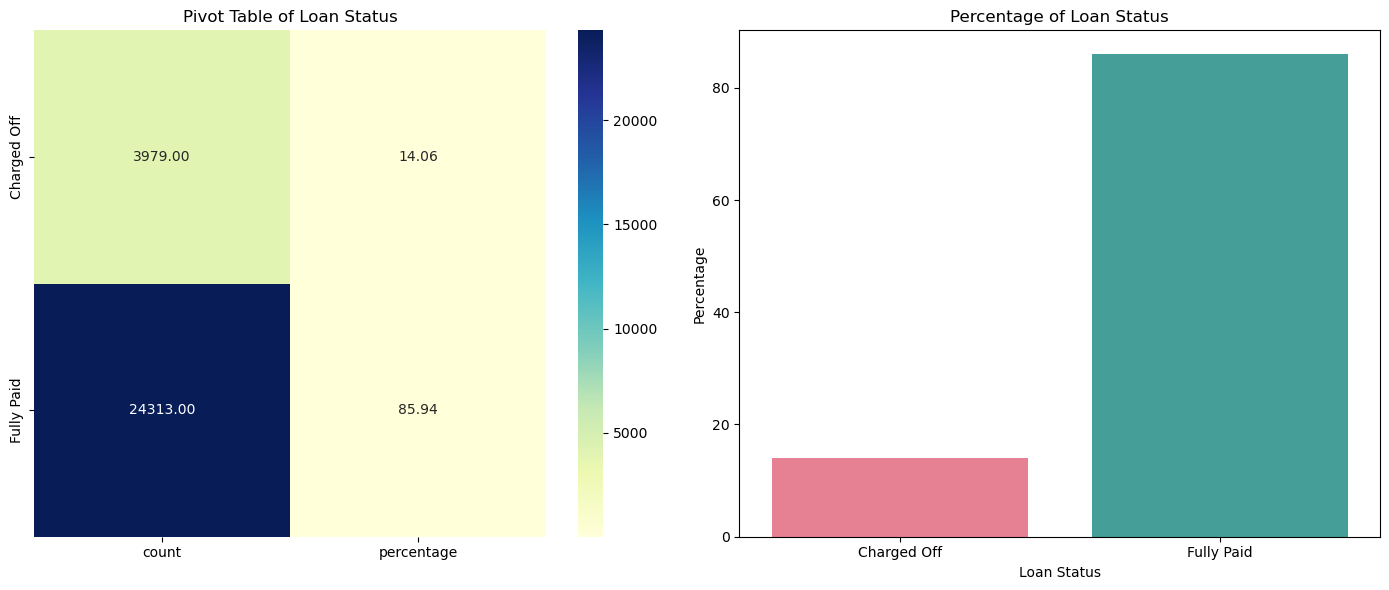

In [3764]:
#Create a pivot table
loan_status_pivot_table = loan_data.pivot_table(index='loan_status', aggfunc='size', fill_value=0).reset_index(name='count')

#Calculate percentages
total = loan_status_pivot_table['count'].sum()
loan_status_pivot_table['percentage'] = (loan_status_pivot_table['count'] / total) * 100

#Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Plot the pivot table as a heatmap
sns.heatmap(loan_status_pivot_table.set_index('loan_status'), annot=True, fmt='.2f', cmap='YlGnBu', ax=ax[0])
ax[0].set_title('Pivot Table of Loan Status')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

#Bar chart for percentages with a better color palette
palette = sns.color_palette("husl", len(loan_status_pivot_table['loan_status'].unique()))
sns.barplot(x='loan_status', y='percentage', data=loan_status_pivot_table, ax=ax[1], hue='loan_status', palette=palette, dodge=False, legend=False)
ax[1].set_title('Percentage of Loan Status')
ax[1].set_ylabel('Percentage')
ax[1].set_xlabel('Loan Status')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

<b>Conclusion</b>: Approx. **86%** comsumers have **fully paid** the loan, while **14%** consumers turned out to be **defaulter** which is **concerning percent**.

</div>

### Visual Analysis

1. Loan Amount
2. Annual Income
3. Loan Amount to Income Ratio
4. Installment
5. Monthly Installment as percent of Income
6. Installment to loan ratio
7. DTI
8. Term
9. Revolving Utilization
10. Interest Rate
11. Issue Date
12. Earliest Credit Line
13. Grade and Sub Grade
14. Verification Status
15. Purpose
16. Employment Length
17. Home Ownership
18. State (Address)
19. Remaining columns/variables:<br>
    a. Inquiries in the last 6 months <b>(inq_last_6mths)</b><br>
    b. The number of open accounts <b>(open_acc)</b><br>
    c. Revolving Balance <b>(revol_bal)</b><br>
    d. The total number of credit line accounts <b>(total_acc)</b><br>
    e. Number of 30+ days past-due incidences for the past 2 years <b>(delinq_2yrs)</b><br>
    f. Number of derogatory public records <b>(pub_rec)</b><br>
    g. Number of public record bankruptcies <b>(pub_rec_bankruptcies)</b><br>

---
#### Common Functions for plotting

In [3765]:
#Univariate Bar Plot Function

def univariate_bar_plot(data, col, title, x_label, y_label = 'Count of Loan Alloted', horizontal = False):
    # Plotting the bar plot
    if horizontal:
        ax = sns.countplot(y=col, data=data, hue=col, palette='viridis')
    else:    
        ax = sns.countplot(x=col, data=data, hue=col, palette='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Adding values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    
    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability
    plt.show()

In [3766]:
#Bivariate Percentage Bar Plot Function

def bivariate_percent_bar_plot(data, x_col, y_col, title, x_label, y_label = 'Percentage of Loan Alloted', legend_loc='upper right', horizontal = False):
    # Calculate the counts
    group_count = data.groupby([x_col, y_col], observed=True).size().reset_index(name='count') #count of grouped column x and y
    total = data.groupby(x_col, observed=True).size().reset_index(name='total') #count of grouped column x

    # Merge the counts and calculate percentages
    group_count = pd.merge(group_count, total, on=x_col)
    group_count['percentage'] = group_count['count'] / group_count['total'] * 100

    # Plotting the percentage count plot for x_col vs y_col
    if horizontal:
        ax = sns.barplot(y=x_col, x='percentage', hue=y_col, data=group_count, palette='viridis')
        plt.title(title)
        plt.xlabel(y_label)
        plt.ylabel(x_label)
    else:    
        ax = sns.barplot(x=x_col, y='percentage', hue=y_col, data=group_count, palette='viridis')
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

    # Adding values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

    # Change legend position
    ax.legend(loc=legend_loc)
    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability   
    plt.show()

In [3767]:
#Univariate & Segmented Univariate - Box Plot Function
def univariate_box_plot(data, y_col, segment_col, title, x_label, y_label):
    #Plotting the box plot
    if segment_col is not None:
        sns.boxplot(x=segment_col, y=y_col, data=data, palette='viridis', hue=segment_col) #Segmented Univariate Analysis
    else:
        sns.boxplot(y=y_col, data=data) #Univariate Analysis
    plt.title(title)
    if x_label is not None:
        plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability
    plt.grid(True)
    plt.show()

In [3768]:
def scatter_plot(data, x_col, y_col, z_col, title, x_label, y_label):
    # Plotting the scatter plot
    sns.scatterplot(x=x_col, y=y_col, hue=z_col, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.xticks(rotation=45) #Rotate ticks of x axis by 45 degree, for better readability
    plt.grid(True)
    plt.show()

In [3769]:
def line_graph_loan_date_wise(date_attribute_col, date_attribute_label):
    # Group by date_attribute_col and loan status, and calculate count and median loan amount
    loan_count = loan_data.groupby([date_attribute_col, 'loan_status']).size().reset_index(name='count')
    loan_median = loan_data.groupby([date_attribute_col, 'loan_status'])['loan_amnt'].median().reset_index(name='median_loan_amnt')

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

    # Plot count of loan applications
    sns.lineplot(ax=axes[0], x=date_attribute_col, y='count', hue='loan_status', data=loan_count, palette='viridis', marker='o')
    axes[0].set_title(f'Count of loan alloted vary over the {date_attribute_label}, segmented by Loan Status')
    axes[0].set_xlabel(date_attribute_label)
    axes[0].set_ylabel('Count of Loan Alloted')
    axes[0].grid(True)

    # Adding data labels for count of loan applications
    for i in range(len(loan_count)):
        axes[0].text(loan_count[date_attribute_col][i], loan_count['count'][i], loan_count['count'][i], 
                    ha='right', va='bottom')

    # Plot median of loan amounts
    sns.lineplot(ax=axes[1], x=date_attribute_col, y='median_loan_amnt', hue='loan_status', data=loan_median, palette='viridis', marker='o')
    axes[1].set_title(f'Median loan amount vary over the {date_attribute_label}, segmented by Loan Status')
    axes[1].set_xlabel(date_attribute_label)
    axes[1].set_ylabel('Median Loan Amount ($)')
    axes[1].grid(True)

    # Adding data labels for median loan amounts
    for i in range(len(loan_median)):
        axes[1].text(loan_median[date_attribute_col][i], loan_median['median_loan_amnt'][i], loan_median['median_loan_amnt'][i], 
                    ha='right', va='bottom')

    # Set x-axis ticks with step of 1
    years = loan_data[date_attribute_col].unique()
    axes[1].set_xticks(np.arange(years.min(), years.max() + 1, 1))

    plt.tight_layout()
    plt.show()

---
#### Correlation between each numerical variable against Loan Status (Target Variable)

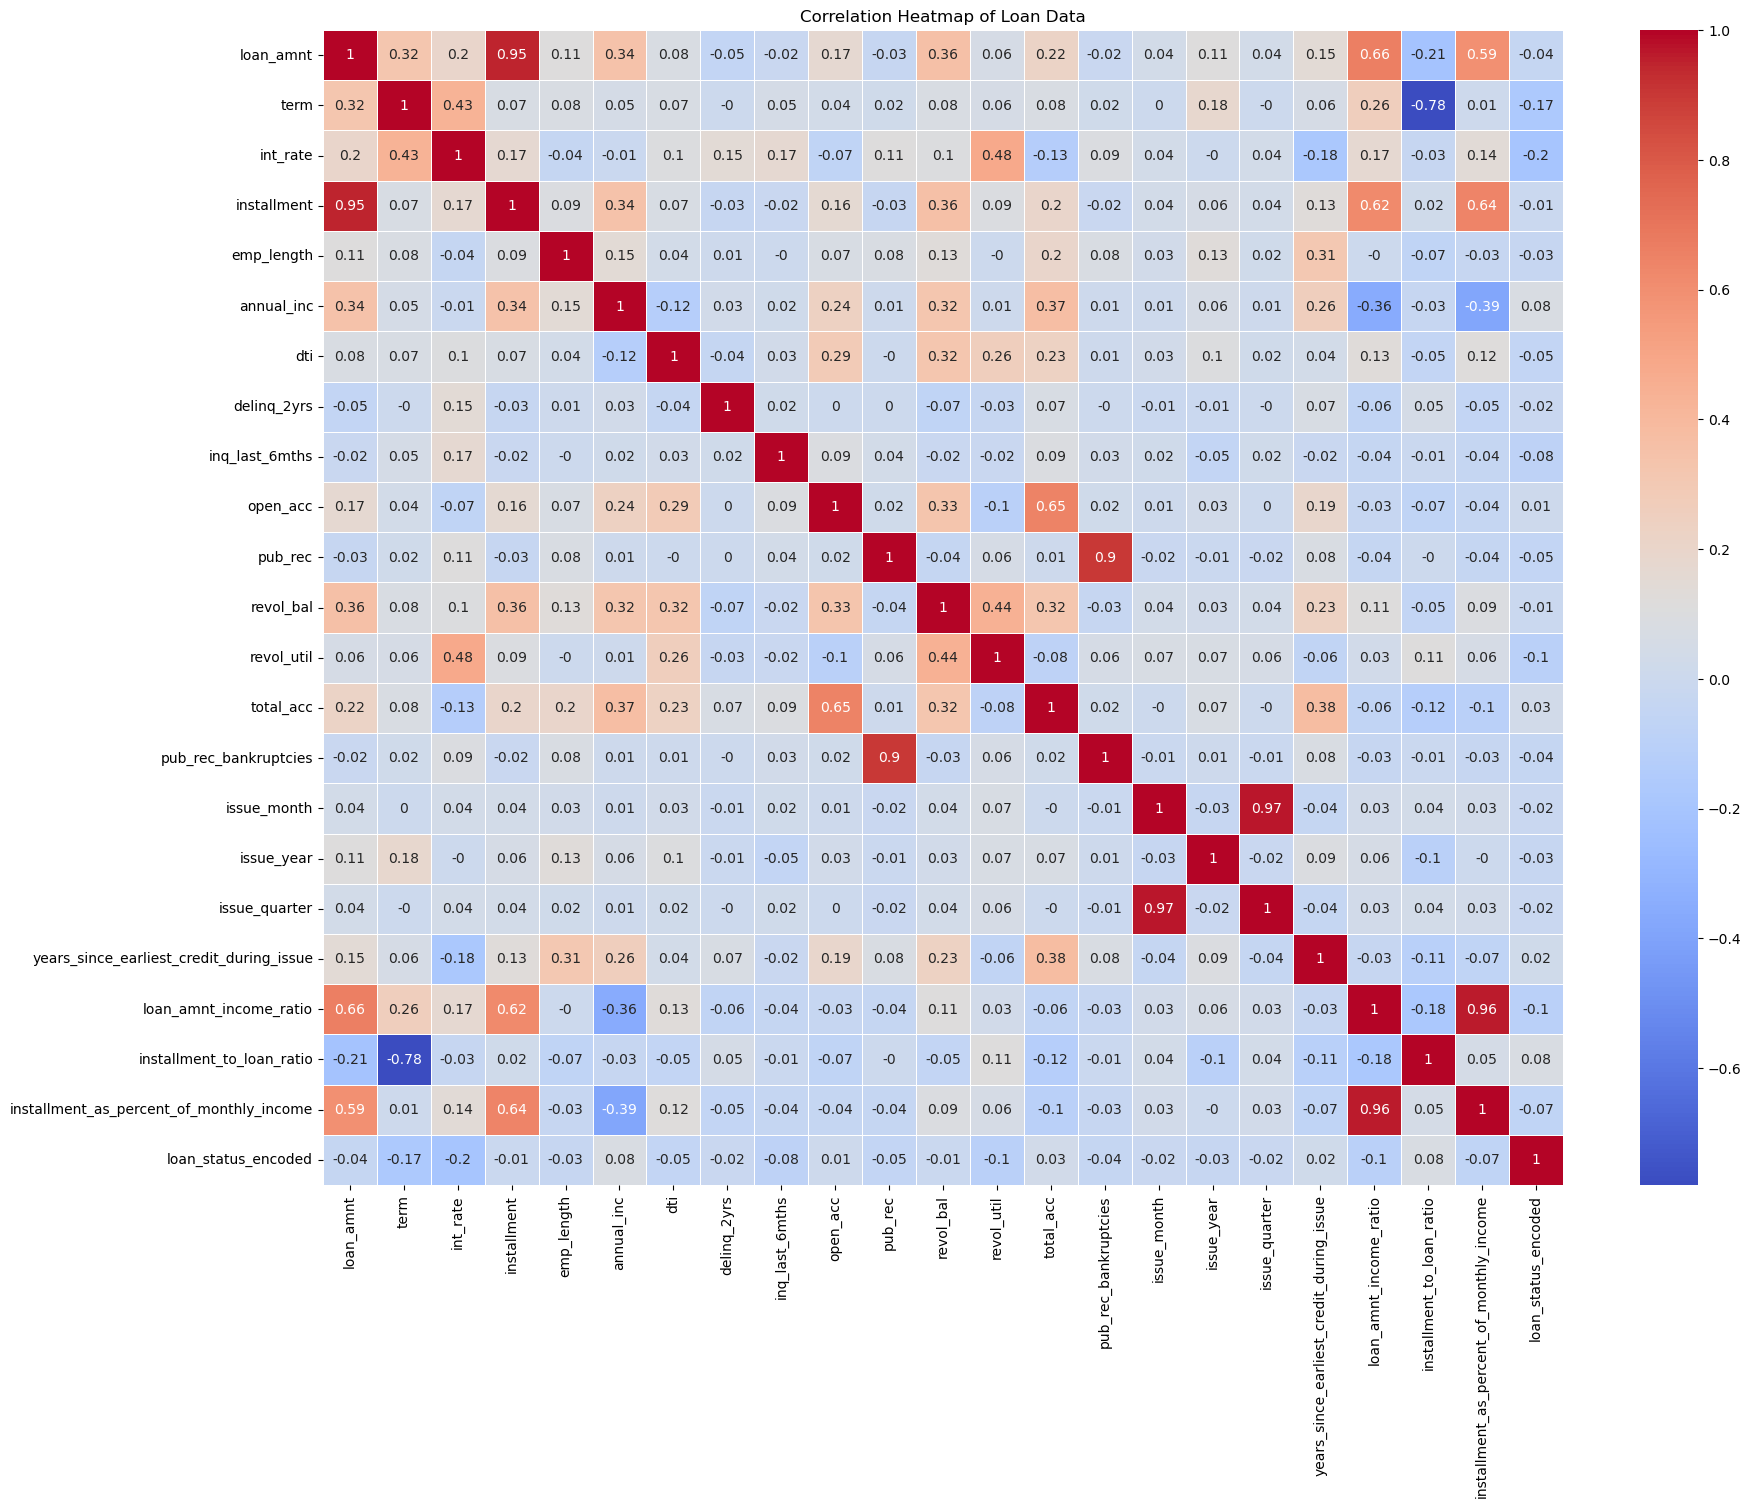

Correlation of all numeric varaibles against Loan Status:
loan_status_encoded                         1.00
installment_to_loan_ratio                   0.08
annual_inc                                  0.08
total_acc                                   0.03
years_since_earliest_credit_during_issue    0.02
open_acc                                    0.01
revol_bal                                  -0.01
installment                                -0.01
delinq_2yrs                                -0.02
issue_month                                -0.02
issue_quarter                              -0.02
emp_length                                 -0.03
issue_year                                 -0.03
pub_rec_bankruptcies                       -0.04
loan_amnt                                  -0.04
dti                                        -0.05
pub_rec                                    -0.05
installment_as_percent_of_monthly_income   -0.07
inq_last_6mths                             -0.08
revol_util 

In [3770]:
# Encode 'loan_status' where 'Fully Paid' = 1 and 'Charged Off' = 0
loan_data['loan_status_encoded'] = loan_data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Select relevant columns
relevant_columns = loan_data.select_dtypes(include=['number']).columns

# Calculate correlation matrix
corr_matrix = loan_data[relevant_columns].corr().round(2)

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Loan Data')
plt.show()

# Correlation of all numeric varaibles against Loan Status
print("Correlation of all numeric varaibles against Loan Status:")
print(corr_matrix['loan_status_encoded'].sort_values(ascending=False))

<div class="alert alert-block alert-warning"><b>Conclusion:</b> There isn't any significant correlation between Loan Status and other variables</div>

---
#### 1. Loan Amount

<b>Univariate Analysis</b>

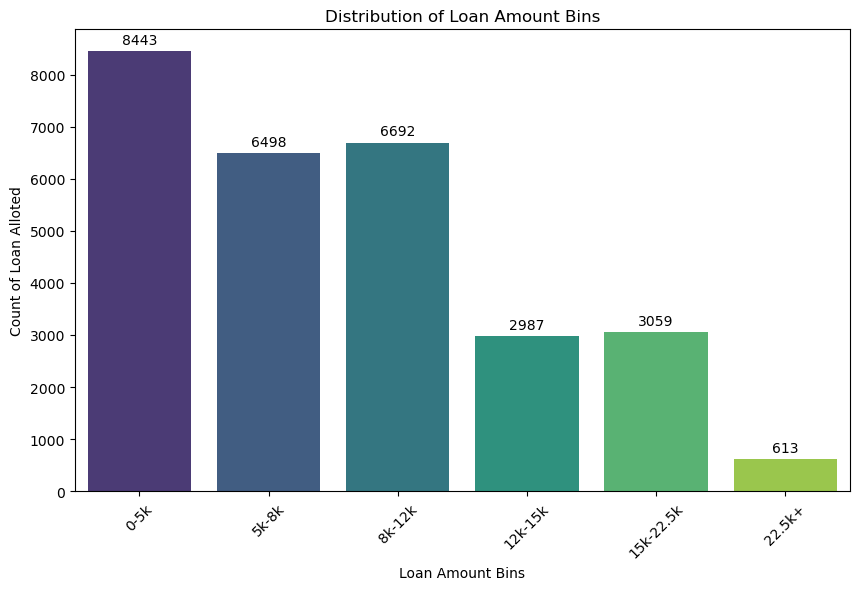

In [3771]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for loan_amnt_bins
univariate_bar_plot(data = loan_data, col = 'loan_amnt_bins',title = 'Distribution of Loan Amount Bins',x_label = 'Loan Amount Bins')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Consumers has taken <b>most loans below $12K and specially between bucket of $0-$5K.</b></div>

<b>Segmented Univariate Analysis</b>

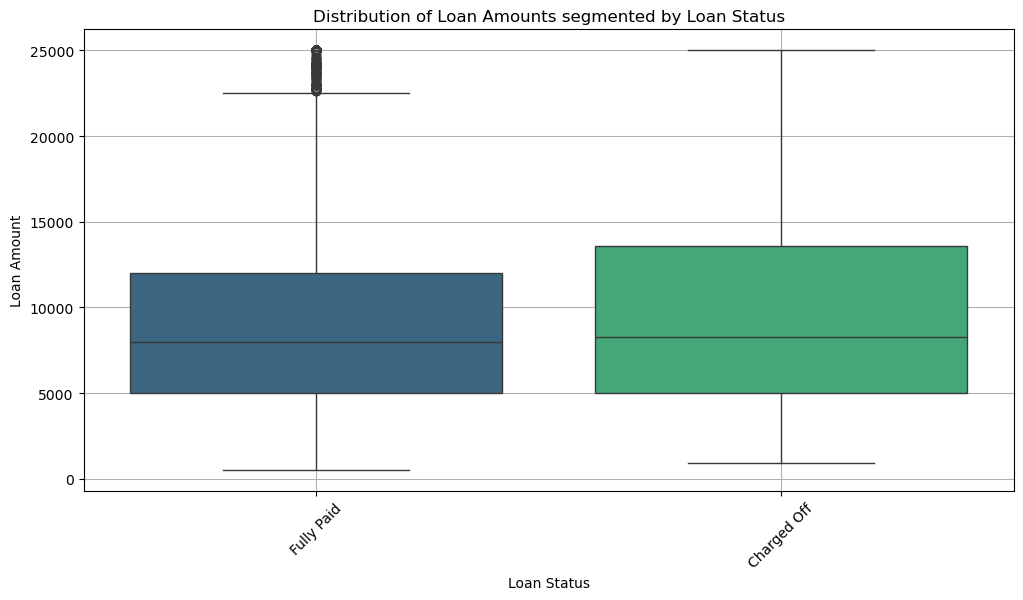

In [3772]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for loan_amnt segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'loan_amnt', segment_col = 'loan_status', 
                    title='Distribution of Loan Amounts segmented by Loan Status', 
                    x_label='Loan Status', y_label='Loan Amount')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  75th percentile of charged-off loans is higher than 75th percentile of fully paid loans. This means <b>Higher loan amounts are associated with higher default risk.</b> </div>

<b>Bivariate Analysis</b>

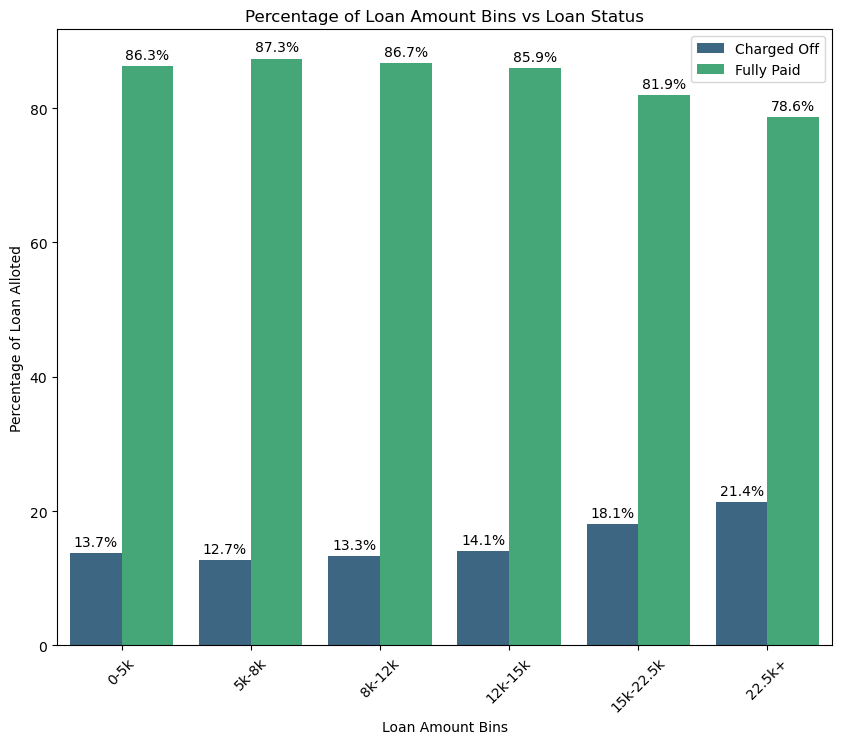

In [3773]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for loan_amnt_bins vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "loan_amnt_bins",
                            y_col = "loan_status", title = 'Percentage of Loan Amount Bins vs Loan Status',
                              x_label = 'Loan Amount Bins')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  Loan amount with more than $15K has higher chance of being defaulted / charged-off</div>

---
#### 2. Annual Income

<b>Univariate Analysis</b>

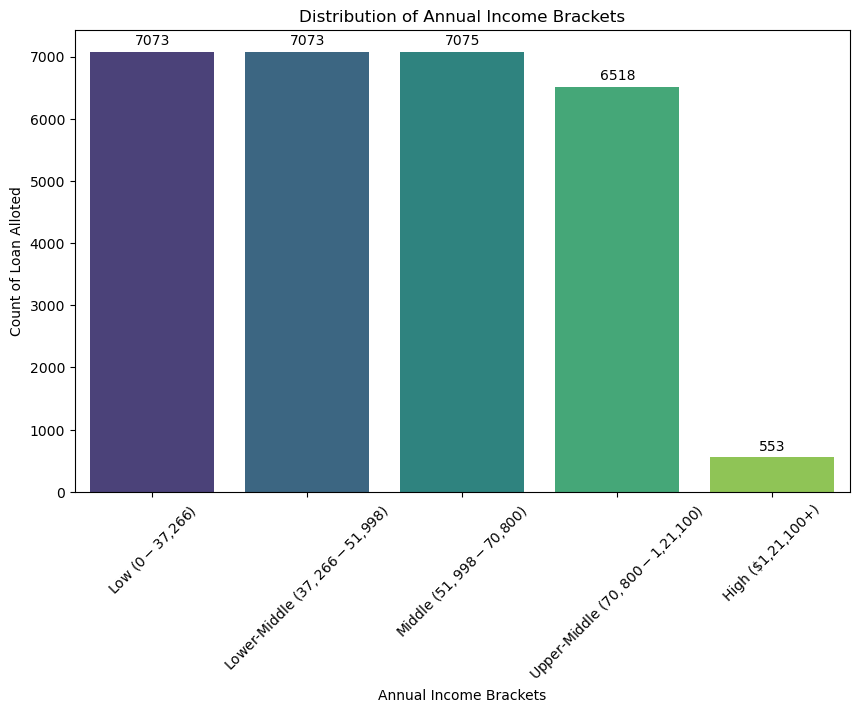

In [3774]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for annual_income_bracket
univariate_bar_plot(data = loan_data, col = 'annual_income_bracket',title = 'Distribution of Annual Income Brackets',x_label = 'Annual Income Brackets')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Consumers with high annual income ($1,21,100+) don't apply for loans frequently</div>

<b>Segmented Univariate Analysis</b>

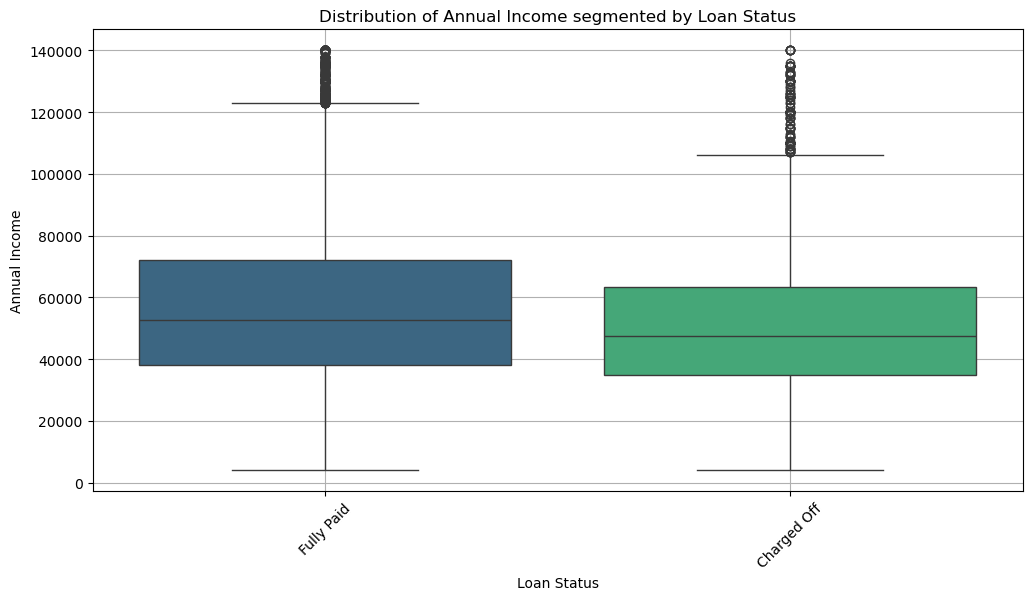

In [3775]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for annual_inc segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'annual_inc', segment_col = 'loan_status', 
                    title='Distribution of Annual Income segmented by Loan Status', 
                    x_label='Loan Status', y_label='Annual Income')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  IQR of charged-off loans is lower than IQR of fully paid loans. This means <b>lower annual income group are more likely to be defaulted.</b> </div>

<b>Bivariate Analysis</b>

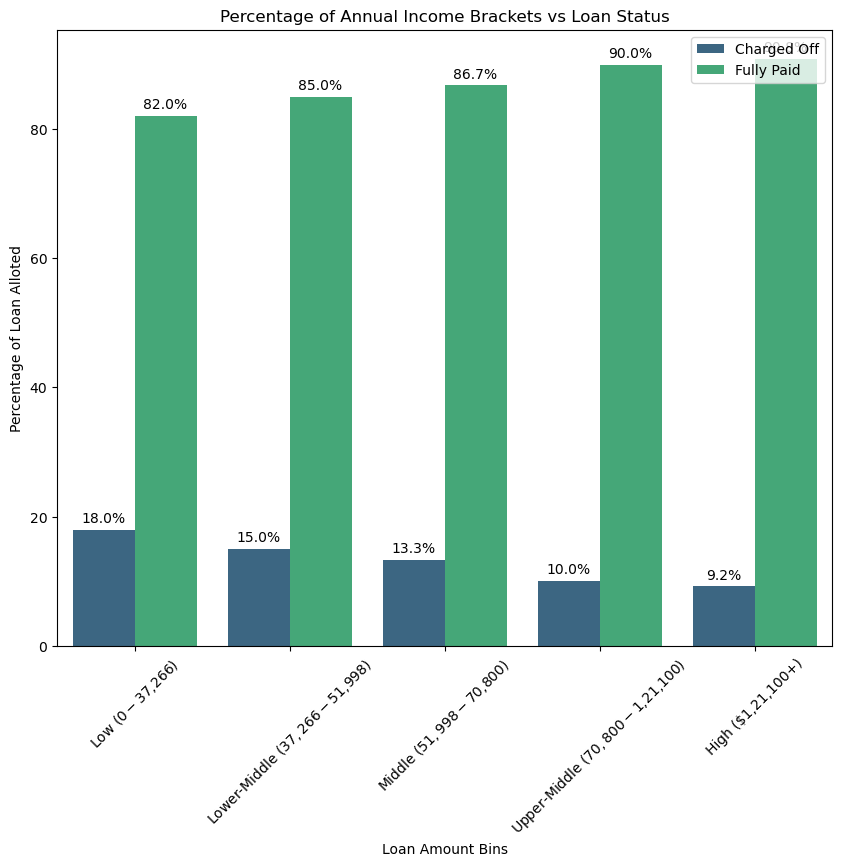

In [3776]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for annual_income_bracket vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "annual_income_bracket",
                            y_col = "loan_status", title = 'Percentage of Annual Income Brackets vs Loan Status',
                              x_label = 'Loan Amount Bins')

<div class="alert alert-block alert-success"><b>Conclusion:</b> There is direct relationship between fully paid loan and Annual Income. Lower Income Group has lower chance of loan being fully paid, while Higher Income Group has higher chance of loan being fully paid </div>

---
#### 3. Loan Amount to Income Ratio

<b>Univariate Analysis</b>

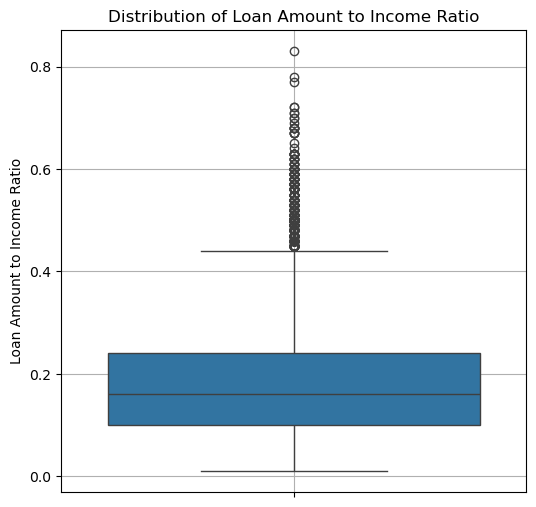

count    28292.000000
mean         0.178721
std          0.108696
min          0.010000
25%          0.100000
50%          0.160000
75%          0.240000
max          0.830000
Name: loan_amnt_income_ratio, dtype: float64

In [3777]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for loan_amnt_income_ratio
univariate_box_plot(data = loan_data, y_col = 'loan_amnt_income_ratio',  
                    title='Distribution of Loan Amount to Income Ratio', segment_col = None,
                    x_label=None, y_label='Loan Amount to Income Ratio')
loan_data['loan_amnt_income_ratio'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> On Median, Consumer took 16% of their annual income as total loan amount </div>

<b>Segmented Univariate Analysis</b>

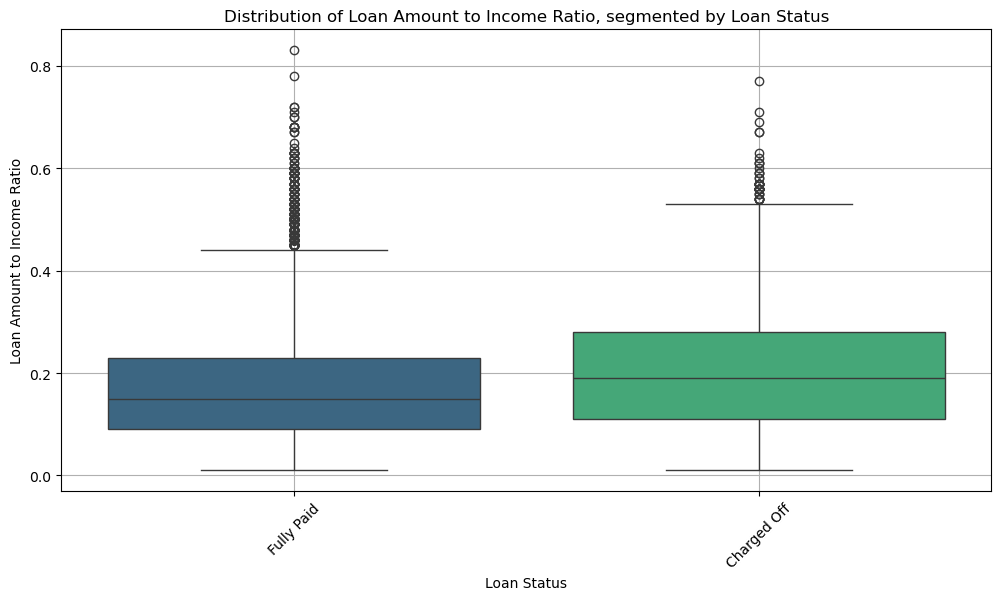

In [3778]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for loan_amnt_income_ratio segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'loan_amnt_income_ratio', segment_col = 'loan_status', 
                    title='Distribution of Loan Amount to Income Ratio, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Loan Amount to Income Ratio')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  Median, 25th and 75th percentile of charged-off loans is higher than that of fully paid loans. This means <b>Higher loan amounts to Income ratio are more likely to be charged off.</b> </div>

<b>Bivariate Analysis</b>

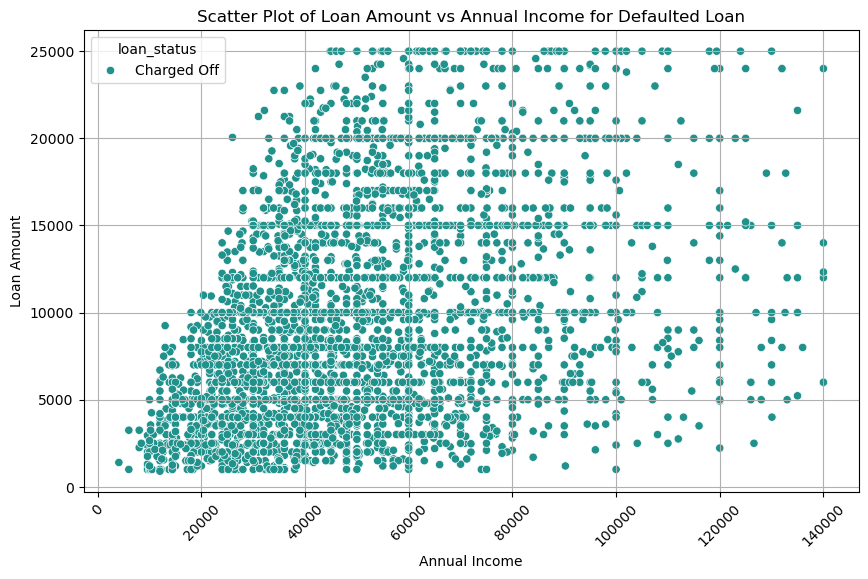

In [3779]:
# Scatter plot between loan amount and annual income for Charged Off Loans
plt.figure(figsize=(10, 6))
scatter_plot(data=loan_data[loan_data['loan_status']=='Charged Off'], x_col = 'annual_inc', y_col = 'loan_amnt', z_col = 'loan_status', 
             title = 'Scatter Plot of Loan Amount vs Annual Income for Defaulted Loan', x_label= 'Annual Income', y_label = 'Loan Amount')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
1. The concentration of charged off loans in the lower to lower middle income brackets suggests that borrowers in these income ranges are at a higher risk of default. <br>
2. Charged off loans are across various loan amounts, but there is a notable density in the $5,000 to $15,000 range.<br>
3. There seems to be a decrease in density at the higher income levels (above $80,000). This suggests that higher income borrowers may have a lower risk of default.<br></div>

---
#### 4. Installment

<b>Univariate Analysis</b>

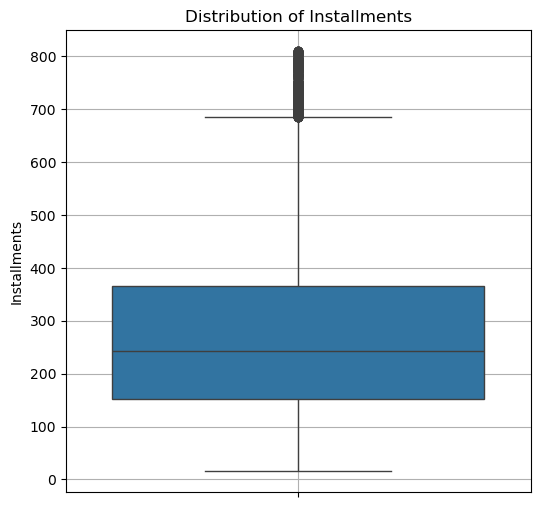

count    28292.000000
mean       271.605458
std        157.989648
min         15.690000
25%        152.415000
50%        243.340000
75%        365.392500
max        809.620000
Name: installment, dtype: float64

In [3780]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for installment
univariate_box_plot(data = loan_data, y_col = 'installment',  
                    title='Distribution of Installments', segment_col = None,
                    x_label=None, y_label='Installments')
loan_data['installment'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Median Installments is $243.34, which can be considered when setting average installment expectations for loans.</div>

<b>Segmented Univariate Analysis</b>

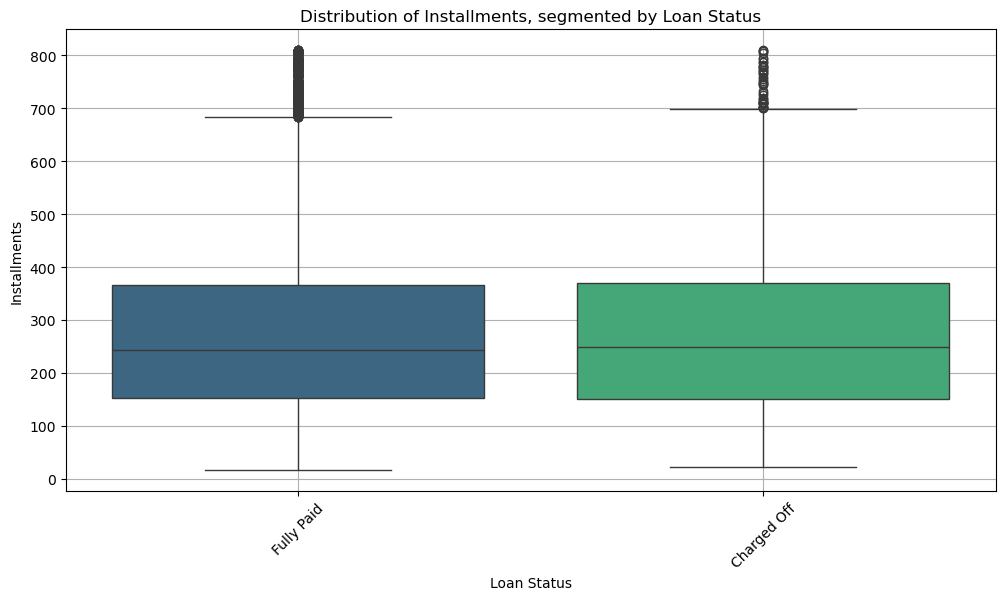

In [3781]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for installments segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'installment', segment_col = 'loan_status', 
                    title='Distribution of Installments, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Installments')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Nothing conclusive can be derived</div>

---
#### 5. Monthly Installment as percent of Income

<b>Univariate Analysis</b>

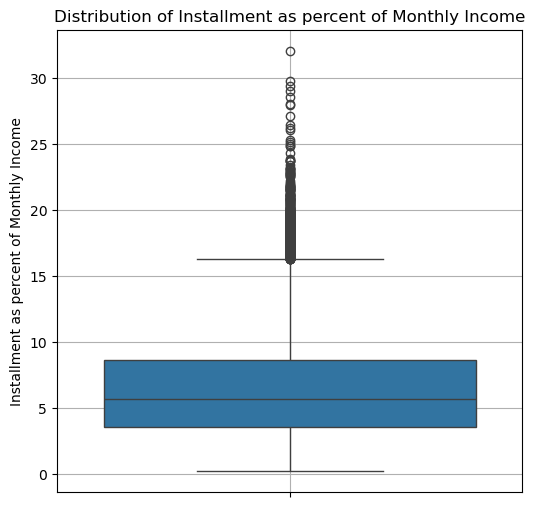

count    28292.000000
mean         6.459917
std          3.859304
min          0.220000
25%          3.530000
50%          5.710000
75%          8.630000
max         32.030000
Name: installment_as_percent_of_monthly_income, dtype: float64

In [3782]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for installment_as_percent_of_monthly_income
univariate_box_plot(data = loan_data, y_col = 'installment_as_percent_of_monthly_income',  
                    title='Distribution of Installment as percent of Monthly Income', segment_col = None,
                    x_label=None, y_label='Installment as percent of Monthly Income')
loan_data['installment_as_percent_of_monthly_income'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> On Median, Installments is 5.71% of monthly income.</div>

<b>Segmented Univariate Analysis</b>

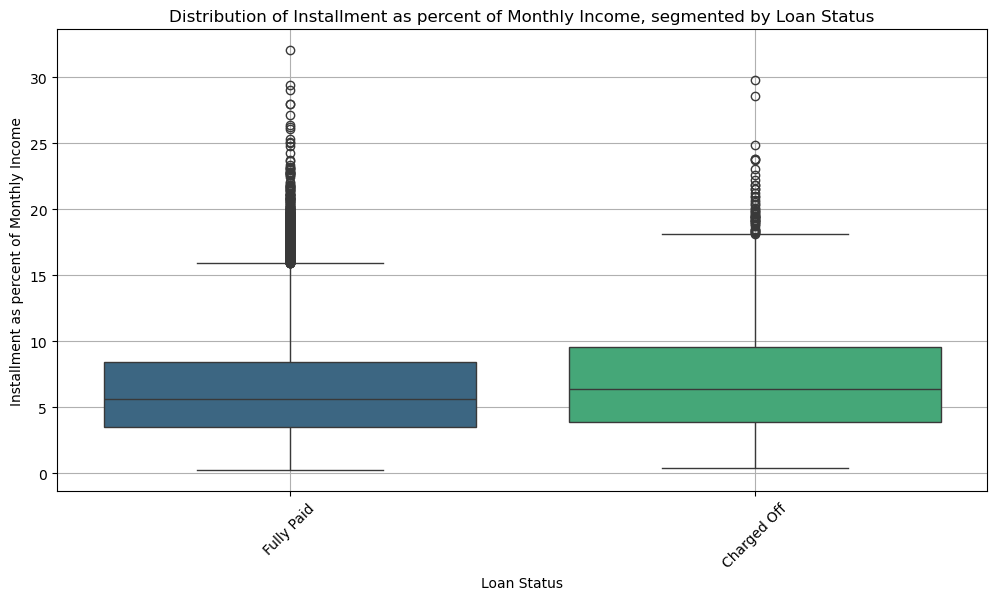

In [3783]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for installment_as_percent_of_monthly_income segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'installment_as_percent_of_monthly_income', segment_col = 'loan_status', 
                    title='Distribution of Installment as percent of Monthly Income, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Installment as percent of Monthly Income')

<div class="alert alert-block alert-success"><b>Conclusion:</b>  Median, 25th and 75th percentile of charged-off loans is higher than that of fully paid loans. This means <b>Higher installment amount percent of consumer's monthly income are more likely to be charged off. </div>

---
#### 6. Installment to loan ratio

<b>Univariate Analysis</b>

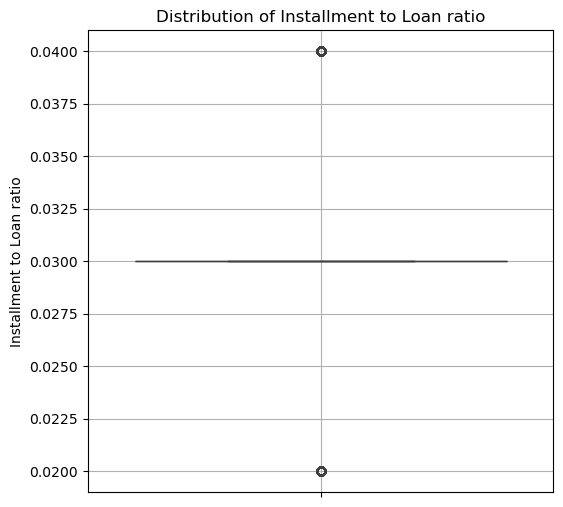

count    28292.000000
mean         0.028741
std          0.004598
min          0.020000
25%          0.030000
50%          0.030000
75%          0.030000
max          0.040000
Name: installment_to_loan_ratio, dtype: float64

In [3784]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for installment_to_loan_ratio
univariate_box_plot(data = loan_data, y_col = 'installment_to_loan_ratio',  
                    title='Distribution of Installment to Loan ratio', segment_col = None,
                    x_label=None, y_label='Installment to Loan ratio')
loan_data['installment_to_loan_ratio'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Installment to loan ratio doesn't seem to have much distribution</div>

<b>Segmented Univariate Analysis</b>

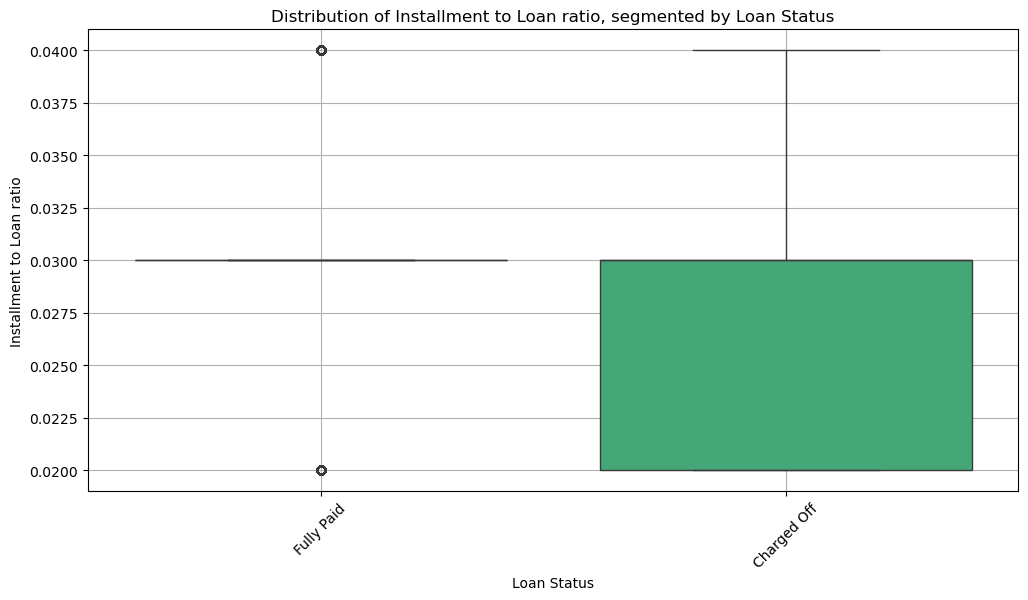

In [3785]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for installment_to_loan_ratio segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'installment_to_loan_ratio', segment_col = 'loan_status', 
                    title='Distribution of Installment to Loan ratio, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Installment to Loan ratio')

<div class="alert alert-block alert-warning"><b>Conclusion:</b>  Even though the medians are the same, the increased spread for charged off loans could mean that loans with higher or lower ratios than the median are more prone to default. </div>

---
#### 7. DTI

<b>Univariate Analysis</b>

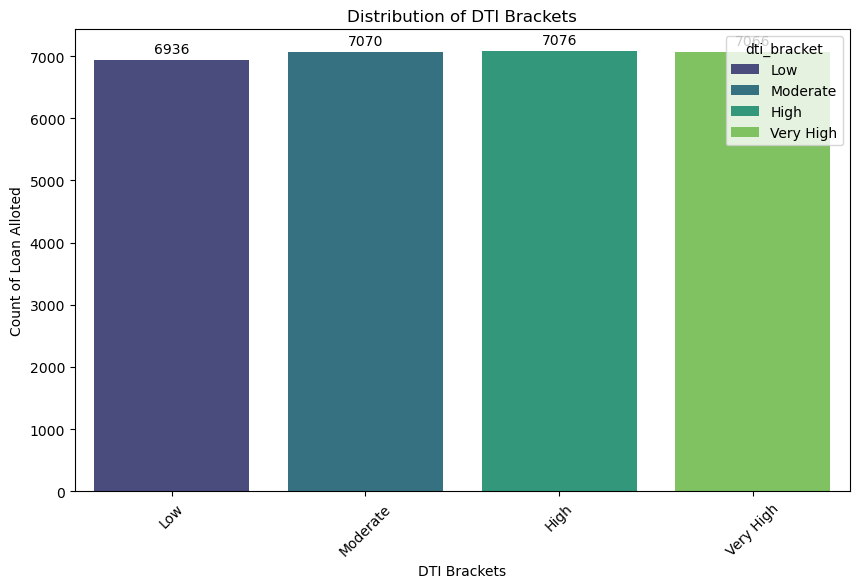

In [3786]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for dti_bracket
univariate_bar_plot(data = loan_data, col = 'dti_bracket',title = 'Distribution of DTI Brackets',x_label = 'DTI Brackets')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> No significant conclusion can be derived</div>

<b>Segmented Univariate Analysis</b>

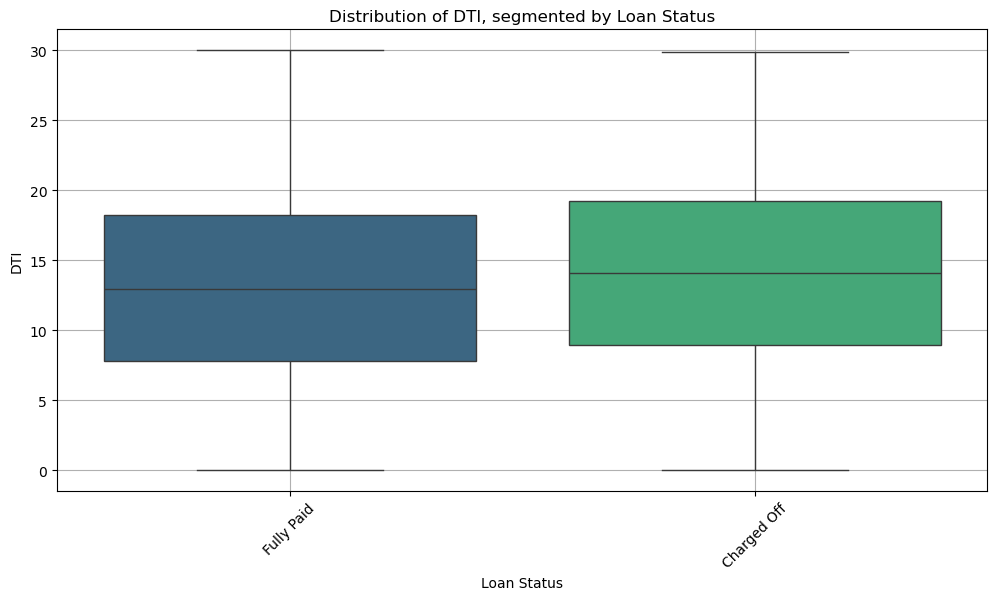

In [3787]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for dti segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'dti', segment_col = 'loan_status', 
                    title='Distribution of DTI, segmented by Loan Status', 
                    x_label='Loan Status', y_label='DTI')

<div class="alert alert-block alert-success"><b>Conclusion:</b> IQR of DTI is higher of Charged Off Loans. This means consumers with <b>higher DTI (Debt to Income ratio) are more likely to be defaulted.</b> </div>

<b>Bivariate Analysis</b>

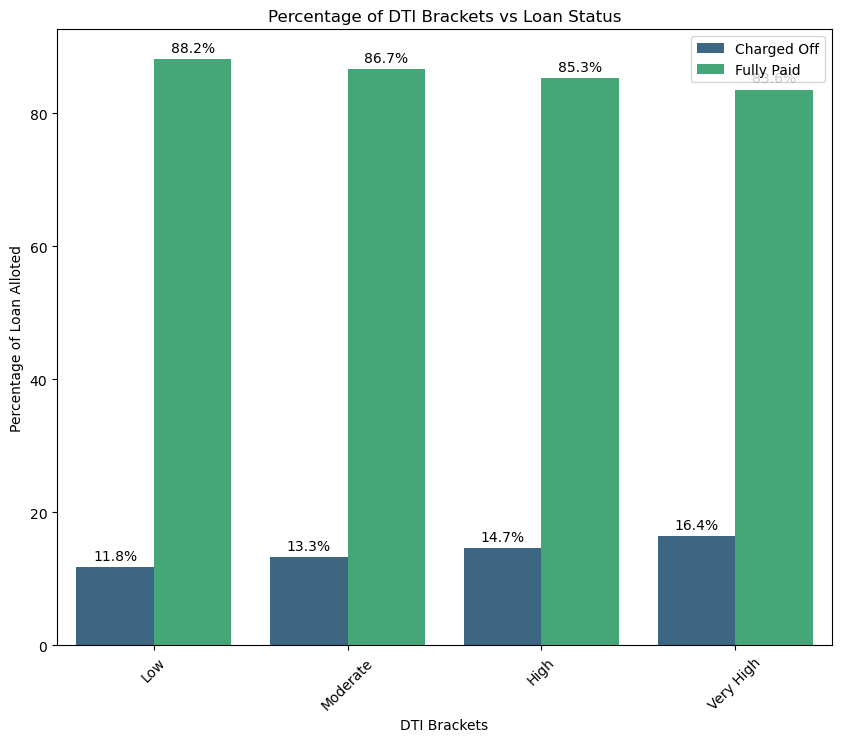

In [3788]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for dti_bracket vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "dti_bracket",
                            y_col = "loan_status", title = 'Percentage of DTI Brackets vs Loan Status',
                              x_label = 'DTI Brackets')

<div class="alert alert-block alert-success"><b>Conclusion:</b> There is direct relationship between Charged Off Loan and DTI. Lower DTI has lower chance of loan being charged off, while Higher DTI has higher chance of loan being charged off </div>

---
#### 8. Term

<b>Univariate Analysis</b>

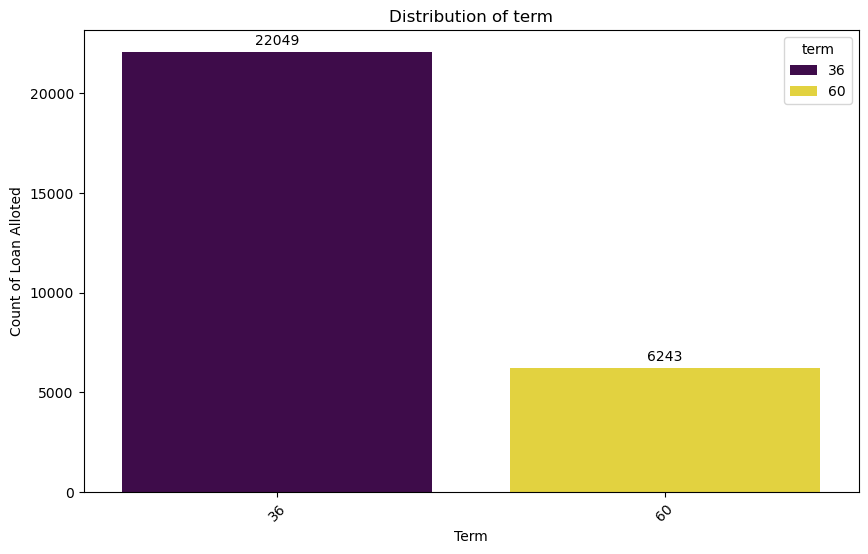

In [3789]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for term
univariate_bar_plot(data = loan_data, col = 'term',title = 'Distribution of term',x_label = 'Term')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> (100 * 22049 / (22049+6243)) = 77.93% Consumers have taken 36 month (lower tenure) loan.</b> Consumers prefer lower tenure loans.</div>

<b>Bivariate Analysis</b>

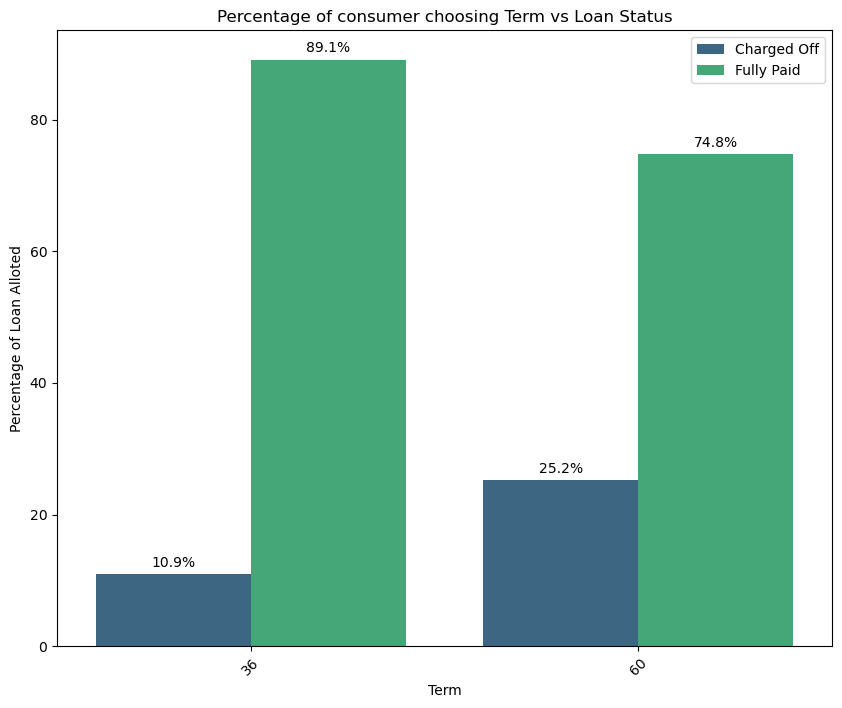

In [3790]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for term vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "term",
                            y_col = "loan_status", title = 'Percentage of consumer choosing Term vs Loan Status',
                              x_label = 'Term')

<div class="alert alert-block alert-success"><b>Conclusion:</b> There is direct relationship between Charged Off Loan and Term. Lower Term has lower chance of loan being charged off, while Higher Term has higher chance of loan being charged off. </div>

---
#### 9. Revolving Utilization

<b>Univariate Analysis</b>

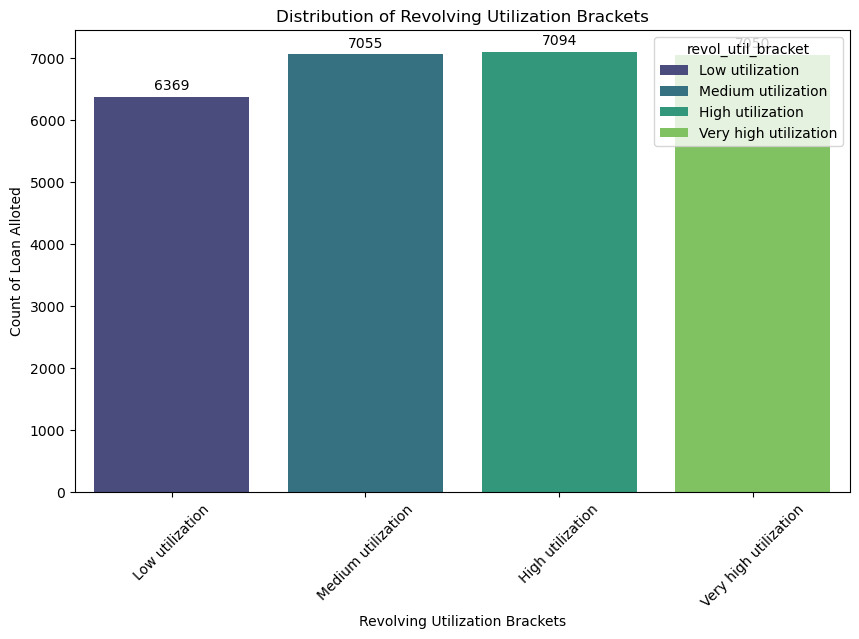

In [3791]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for revol_util_bracket
univariate_bar_plot(data = loan_data, col = 'revol_util_bracket',title = 'Distribution of Revolving Utilization Brackets',x_label = 'Revolving Utilization Brackets')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Consumers with Low Revolving Utilization are low.</div>

<b>Segmented Univariate Analysis</b>

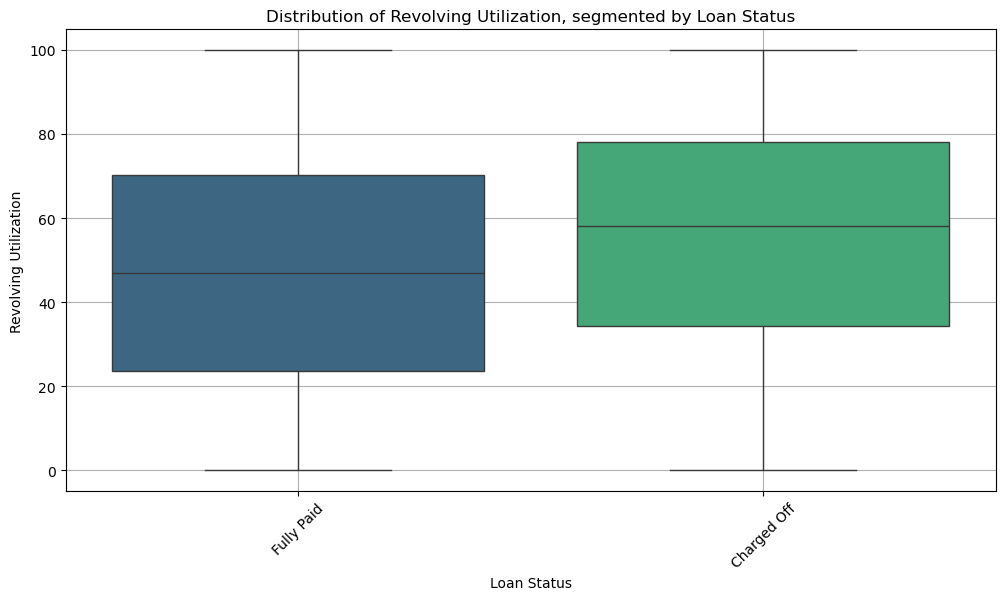

In [3792]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for revol_util segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'revol_util', segment_col = 'loan_status', 
                    title='Distribution of Revolving Utilization, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Revolving Utilization')

<div class="alert alert-block alert-success"><b>Conclusion:</b> IQR of Revolving Utilization is higher of Charged Off Loans. This means consumers with <b>higher Revolving Utilization are more likely to be defaulted.</b> </div>

<b>Bivariate Analysis</b>

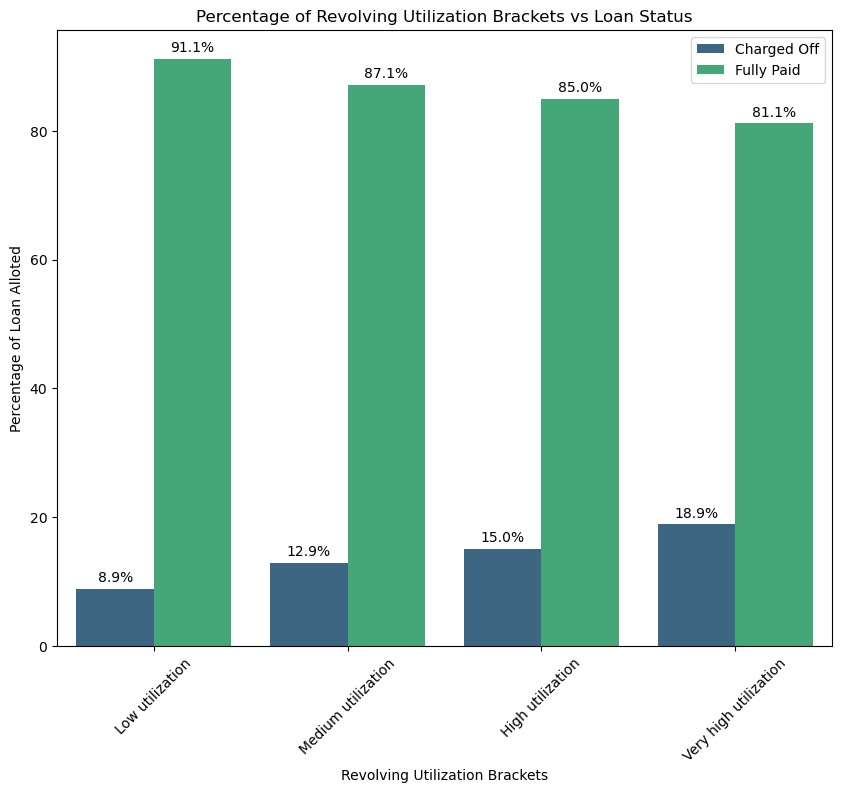

In [3793]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for revol_util vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "revol_util_bracket",
                            y_col = "loan_status", title = 'Percentage of Revolving Utilization Brackets vs Loan Status',
                              x_label = 'Revolving Utilization Brackets')

<div class="alert alert-block alert-success"><b>Conclusion:</b> There is direct relationship between Charged Off Loan and Revolving Utilization. Lower Revolving Utilization has lower chance of loan being charged off, while Higher Revolving Utilization has higher chance of loan being charged off </div>

---
#### 10. Interest Rate

<b>Univariate Analysis</b>

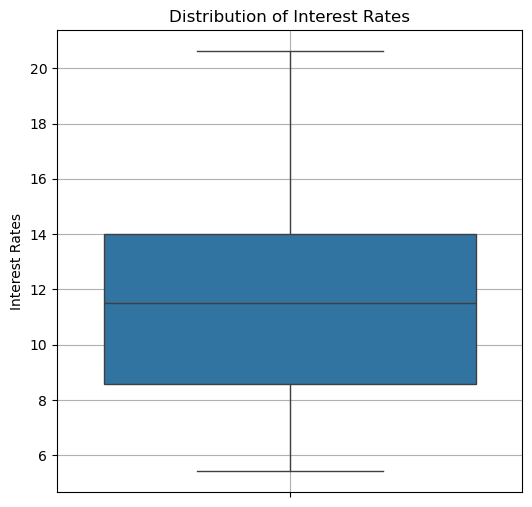

count    28292.000000
mean        11.599910
std          3.503203
min          5.420000
25%          8.590000
50%         11.490000
75%         13.990000
max         20.620000
Name: int_rate, dtype: float64

In [3794]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for Interest Rate
univariate_box_plot(data = loan_data, y_col = 'int_rate',  
                    title='Distribution of Interest Rates', segment_col = None,
                    x_label=None, y_label='Interest Rates')
loan_data['int_rate'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Median Interest rate is 11.49%, which can be considered when setting average Interest rate expectations for loans.</div>

<b>Segmented Univariate Analysis</b>

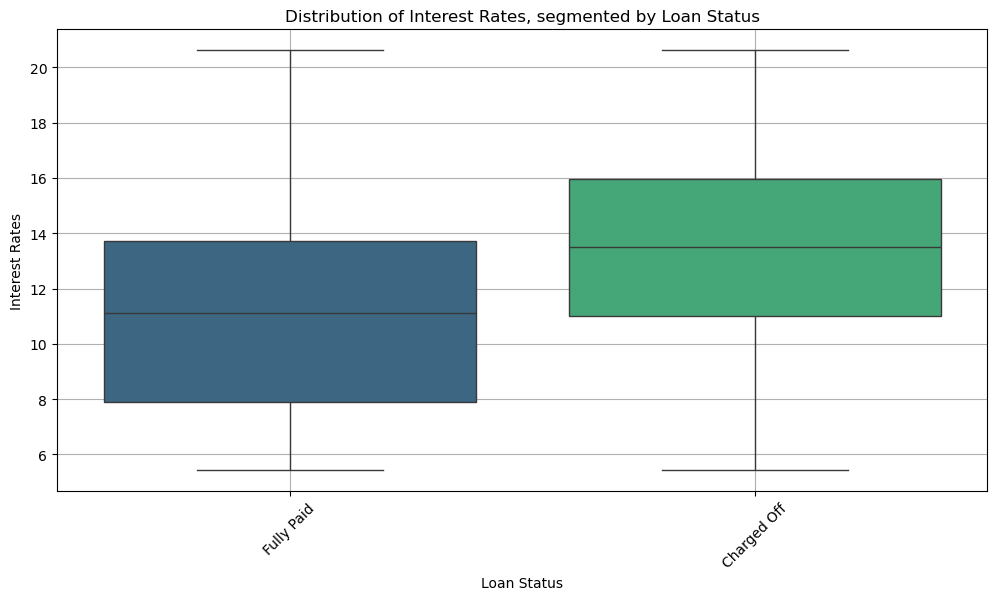

In [3795]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for int_rate segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'int_rate', segment_col = 'loan_status', 
                    title='Distribution of Interest Rates, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Interest Rates')

<div class="alert alert-block alert-success"><b>Conclusion:</b> IQR range of Charged Off loans are very high compared to fully paid loans. Hence, Higher Interest Rates has very high chance of being defaulted.</div>

<b>Bivariate Analysis</b>

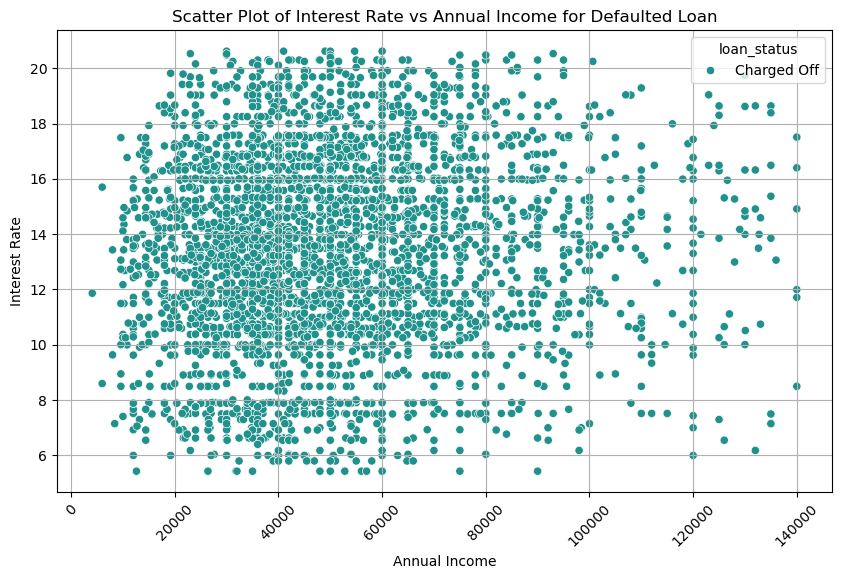

In [3796]:
# Scatter plot between Interest Rate and Annual income for Charged Off Loans
plt.figure(figsize=(10, 6))
scatter_plot(data=loan_data[loan_data['loan_status']=='Charged Off'], x_col = 'annual_inc', y_col = 'int_rate', z_col = 'loan_status', 
             title = 'Scatter Plot of Interest Rate vs Annual Income for Defaulted Loan', x_label= 'Annual Income', y_label = 'Interest Rate')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br> The concentration of charged off loans with Annual Income less than $80000 and Interest Rate above 10% suggests that borrowers in these ranges are at a higher risk of default.</div>

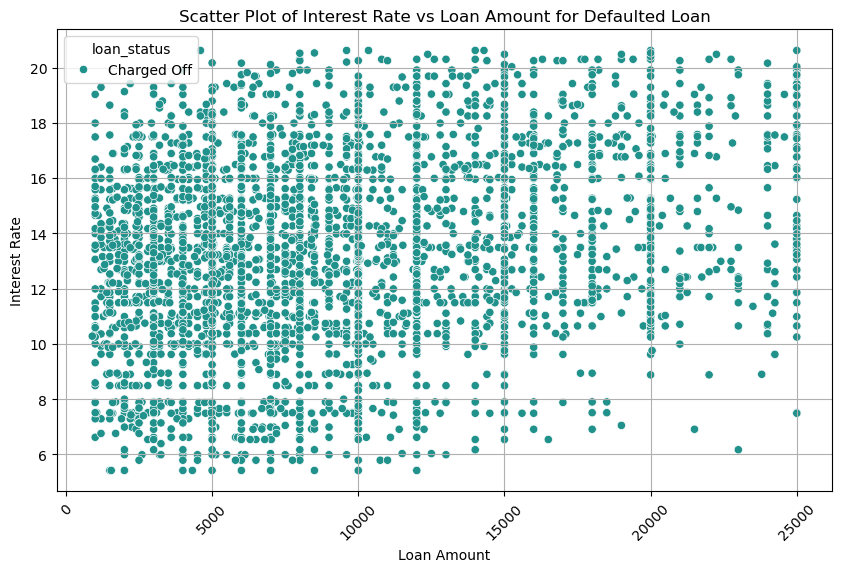

In [3797]:
# Scatter plot between Interest Rate and Loan Amount for Charged Off Loans
plt.figure(figsize=(10, 6))
scatter_plot(data=loan_data[loan_data['loan_status']=='Charged Off'], x_col = 'loan_amnt', y_col = 'int_rate', z_col = 'loan_status', 
             title = 'Scatter Plot of Interest Rate vs Loan Amount for Defaulted Loan', x_label= 'Loan Amount', y_label = 'Interest Rate')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
1. Interest rates between 10% and 18% suggests that higher interest rates may be associated with increased default risk.<br>
2. Lack of correlation between Loan Amount and Interest Rates.</div>

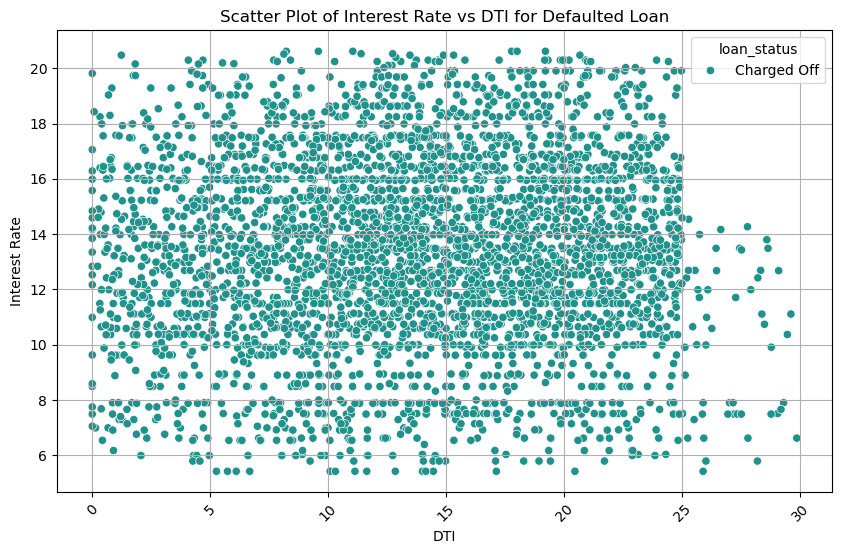

In [3798]:
# Scatter plot between Interest Rate and DTI for Charged Off Loans
plt.figure(figsize=(10, 6))
scatter_plot(data=loan_data[loan_data['loan_status']=='Charged Off'], x_col = 'dti', y_col = 'int_rate', z_col = 'loan_status', 
             title = 'Scatter Plot of Interest Rate vs DTI for Defaulted Loan', x_label= 'DTI', y_label = 'Interest Rate')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
1. Interest rates above 10% irrespective of DTI has highest defaulter rate.<br>
2. Lack of correlation between DTI and Interest Rates.</div>

---
#### 11. Issue Date

<b>Univariate Analysis</b>

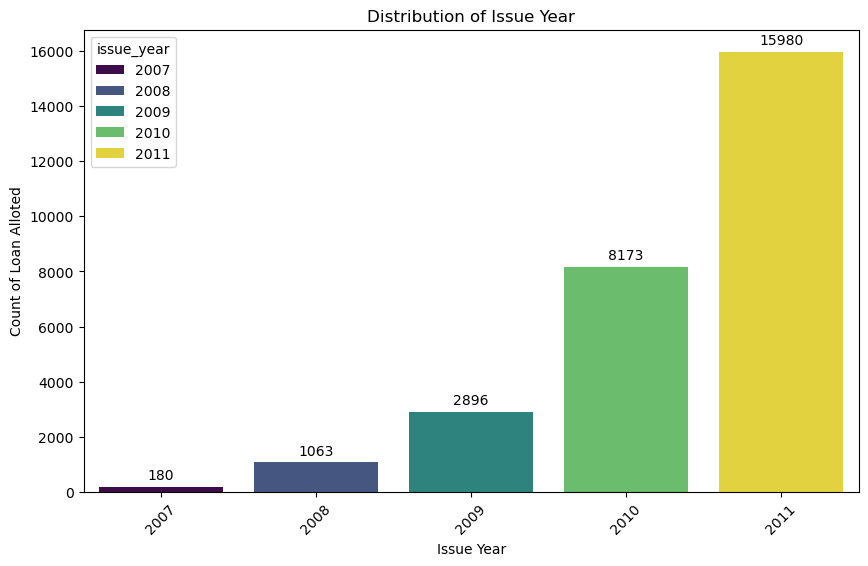

In [3799]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for issue year
univariate_bar_plot(data = loan_data, col = 'issue_year',title = 'Distribution of Issue Year',x_label = 'Issue Year')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> There is exponential growth in issuing loans year on year</div>

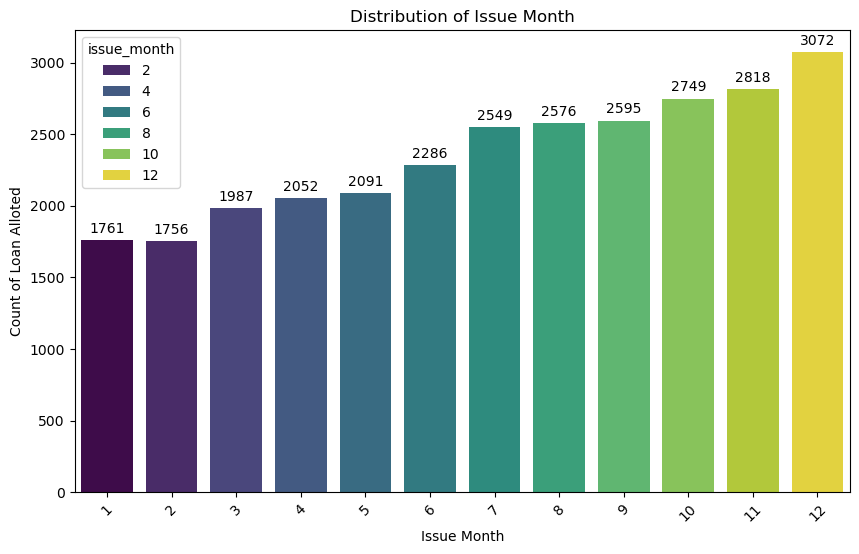

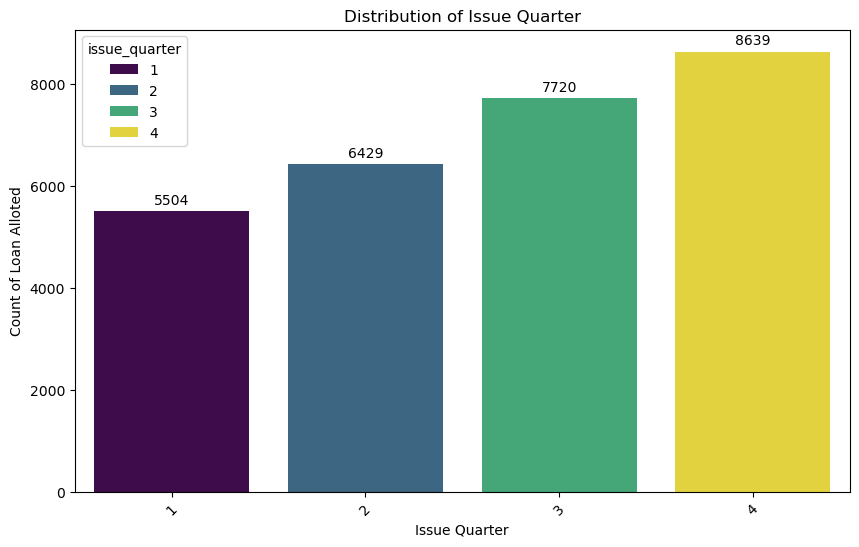

In [3800]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for issue month
univariate_bar_plot(data = loan_data, col = 'issue_month',title = 'Distribution of Issue Month',x_label = 'Issue Month')

# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for issue quarter
univariate_bar_plot(data = loan_data, col = 'issue_quarter',title = 'Distribution of Issue Quarter',x_label = 'Issue Quarter')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> <br>
1. There is increase in loan application quarter on quarter<br>
2. December has the highest loan applications</div>

<b>Bivariate Analysis (Segmented)</b>

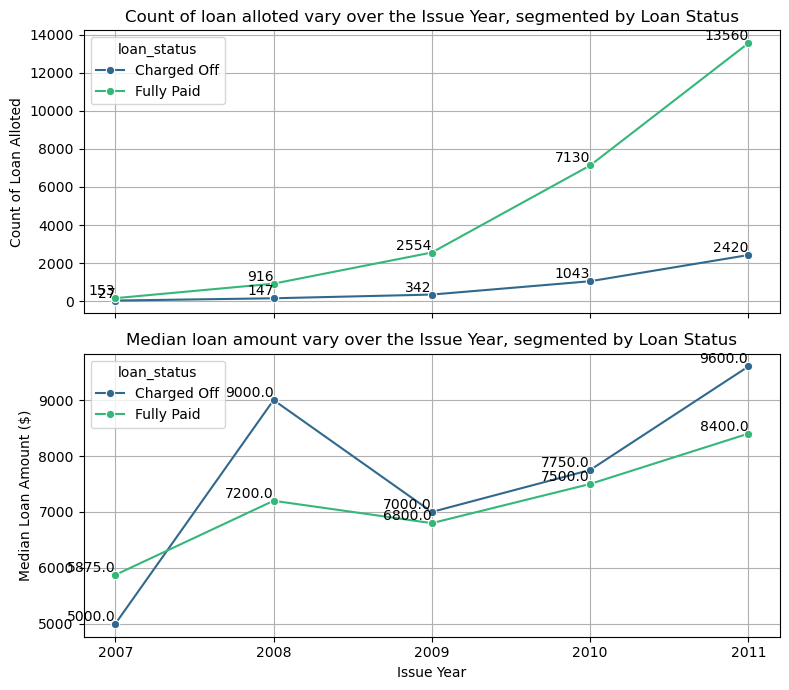

In [3801]:
#Bivariate analysis of Loan Alloted and Median Loan Amount year on year, segmented by Loan Status
line_graph_loan_date_wise(date_attribute_col='issue_year', date_attribute_label='Issue Year')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
1. In 2008, Median Loan amount of charged off loans were significantly higher than fully paid loans. <b>Possible reason could be recession (Great Recession in 2008), which resulted in higher loan amount to be defaulted.</b> After 2008, Charged off loan median was higher, than fully paid loan median.<br>
2. In Loan Alloted Chart, Fully paid loan increased more year of year compared to charged off loans.</div>

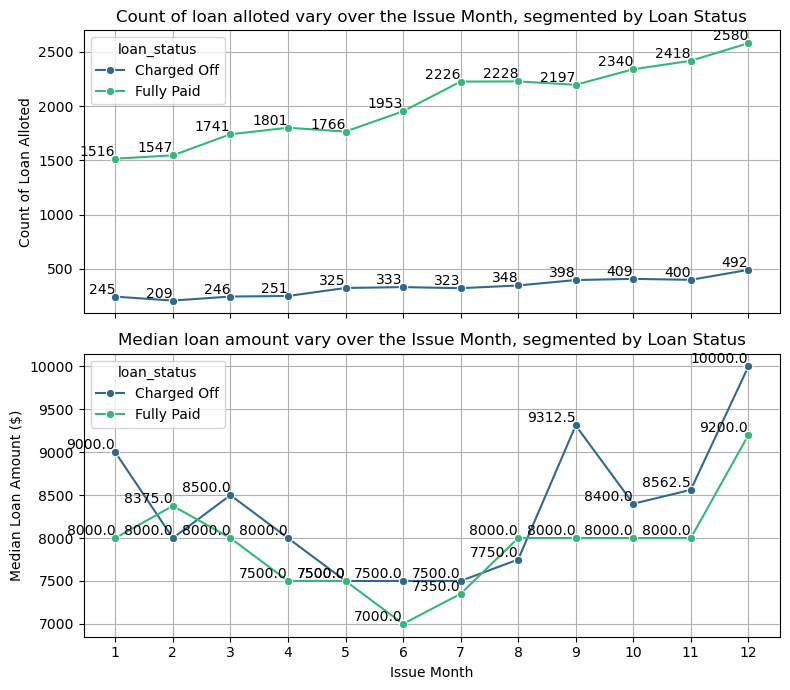

In [3802]:
#Bivariate analysis of Loan Alloted and Median Loan Amount month on month, segmented by Loan Status
line_graph_loan_date_wise(date_attribute_col='issue_month', date_attribute_label='Issue Month')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
1. In September, Median Loan amount of charged off loans were significantly higher than fully paid loans.<br> 
2. Except in Feb and Aug, Median Loan amount of charged off loan were higher than fully paid loans<br>
3. No conclusion can be derived from first graph (Loan Alloted count)</div>

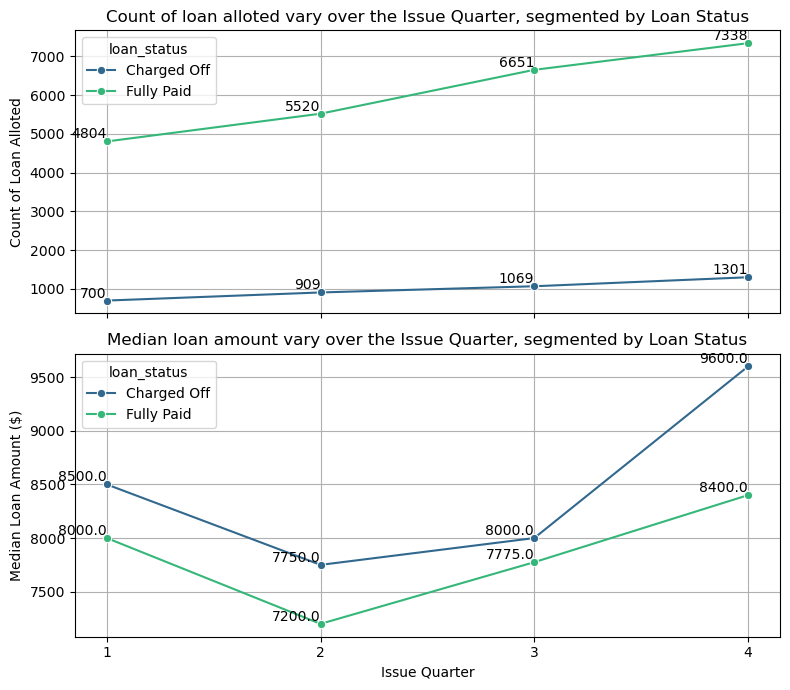

In [3803]:
#Bivariate analysis of Loan Alloted and Median Loan Amount quarter on quarter, segmented by Loan Status
line_graph_loan_date_wise(date_attribute_col='issue_quarter', date_attribute_label='Issue Quarter')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
1. In last quarter, Median Loan amount of charged off loans were significantly higher than fully paid loans.</br> 
2. Median Loan amount of charged off loan were higher than fully paid loans in all quarter.<br>
3. No conclusion can be derived from first graph (Loan Alloted count)</div>

---
#### 12. Earliest Credit Line (Years since earliest credit line was opened from Issue Date)

<b>Univariate Analysis</b>

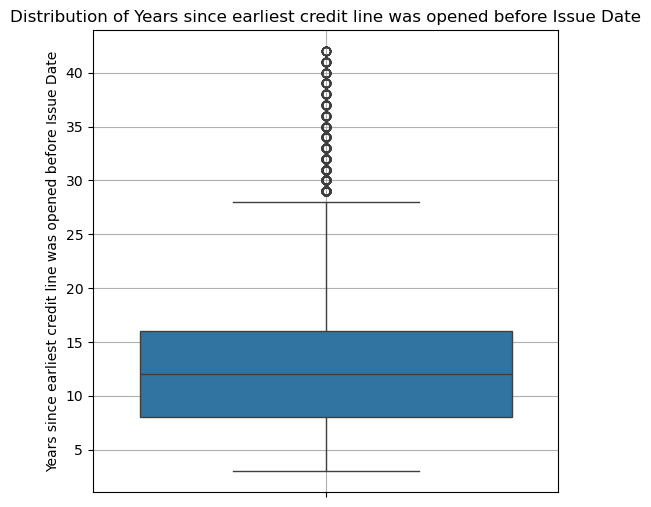

count    28292.000000
mean        12.807613
std          6.480020
min          3.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         42.000000
Name: years_since_earliest_credit_during_issue, dtype: float64

In [3804]:
# Set size of plot
plt.figure(figsize=(6, 6))

#Plotting the box plot for Years since earliest credit line was opened from Issue Date
univariate_box_plot(data = loan_data, y_col = 'years_since_earliest_credit_during_issue',  
                    title='Distribution of Years since earliest credit line was opened before Issue Date', segment_col = None,
                    x_label=None, y_label='Years since earliest credit line was opened before Issue Date')
loan_data['years_since_earliest_credit_during_issue'].describe()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> <br>
Earliest Credit Line was opened at median of 12 years before Issue Date.</div>

<b>Segmented Univariate Analysis</b>

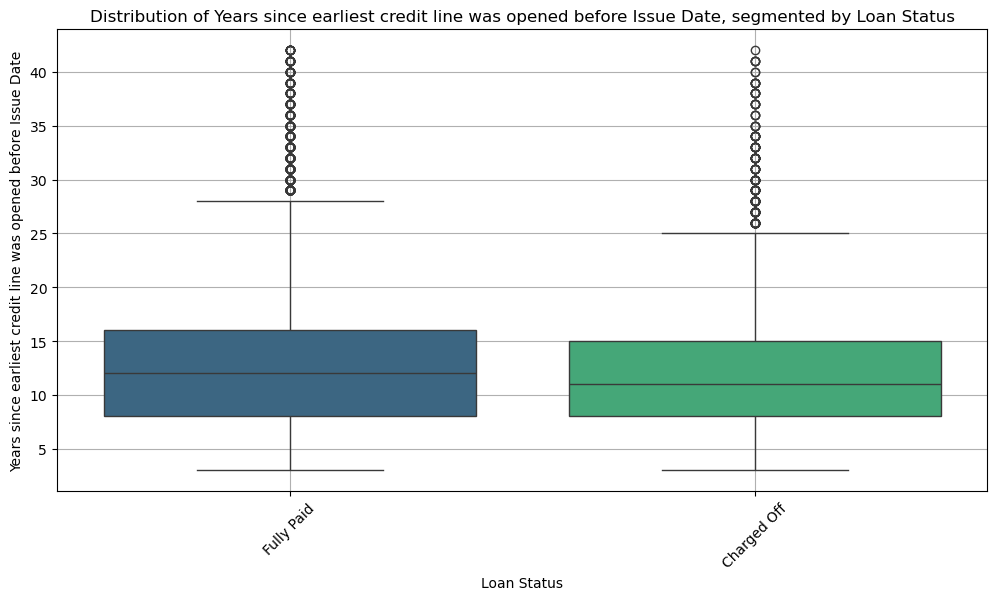

In [3805]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for years_since_earliest_credit_during_issue segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'years_since_earliest_credit_during_issue', segment_col = 'loan_status', 
                    title='Distribution of Years since earliest credit line was opened before Issue Date, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Years since earliest credit line was opened before Issue Date')

<div class="alert alert-block alert-success"><b>Conclusion:</b> <br>
Comparing Upper Fence and 75 percentile range of IQR, We can see borrowers with Fully Paid loans usually have longer credit histories than those with Charged Off loans. This might mean that longer credit histories are linked to better creditworthiness and lower default risk.</div>

<b>Bivariate Analysis</b>

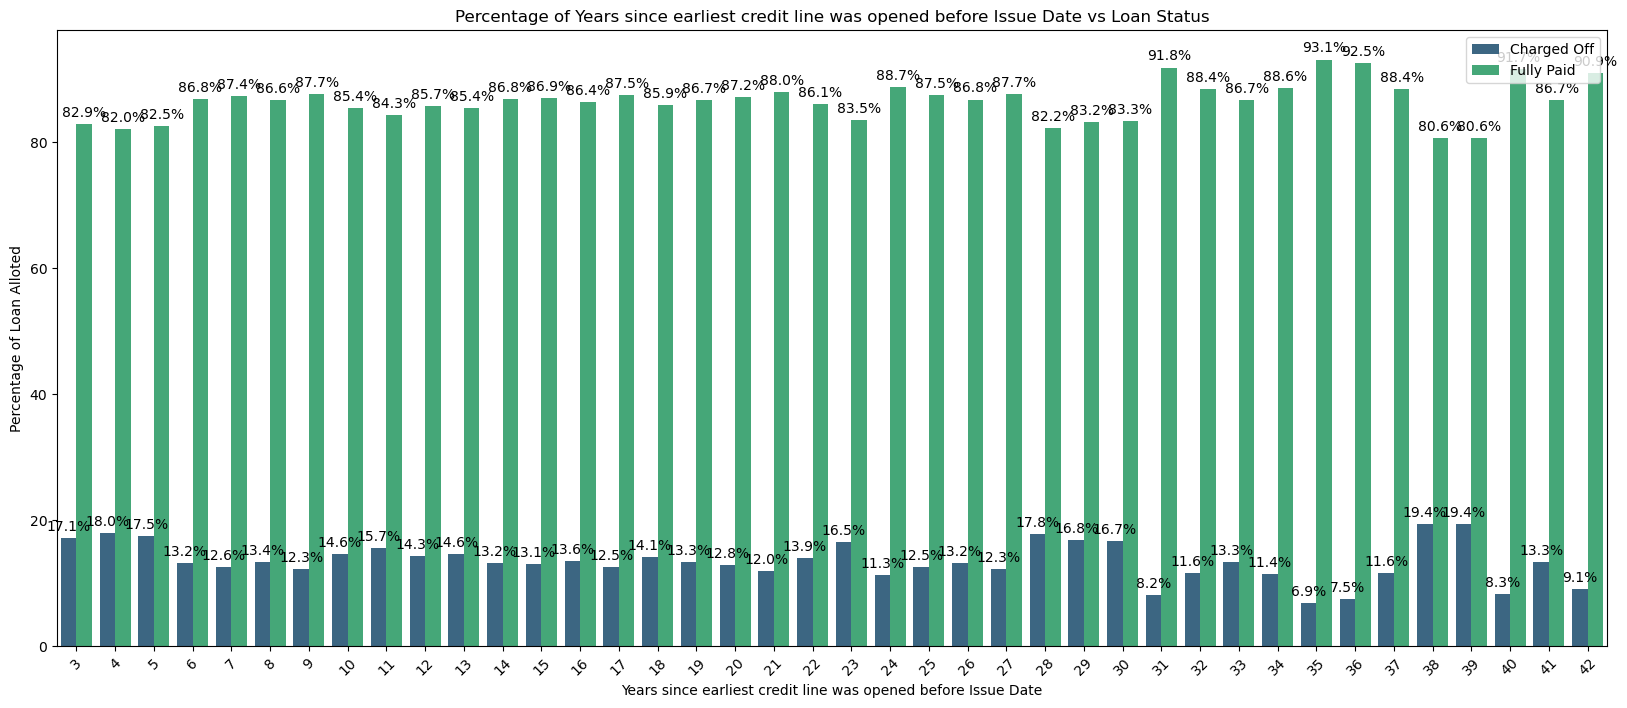

In [3806]:
# Set size of plot
plt.figure(figsize=(20, 8))

# Plotting the percentage count plot for years_since_earliest_credit_during_issue vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "years_since_earliest_credit_during_issue",
                            y_col = "loan_status", title = 'Percentage of Years since earliest credit line was opened before Issue Date vs Loan Status',
                              x_label = 'Years since earliest credit line was opened before Issue Date')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> No direct conclusion can be derived from above bivariate analyis</div>

---
#### 13. Grade and Sub Grade

<b>Univariate Analysis</b>

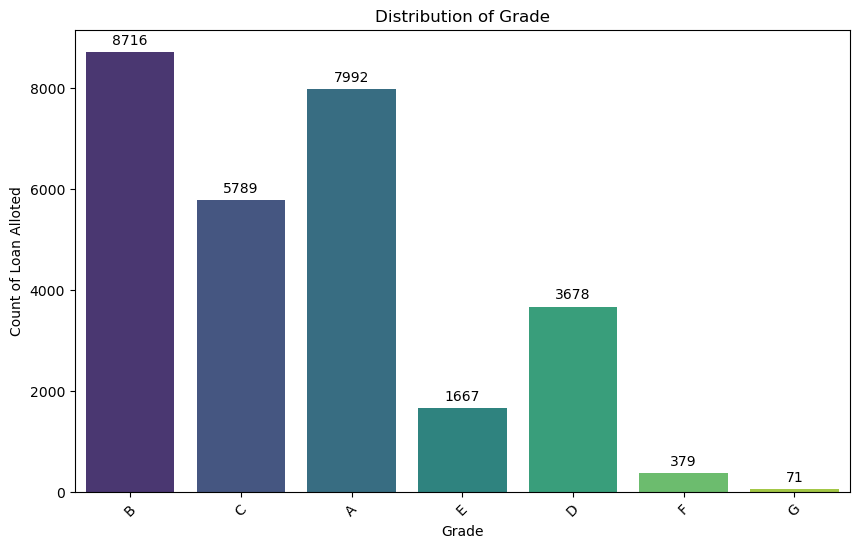

In [3807]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for Grade
univariate_bar_plot(data = loan_data, col = 'grade',title = 'Distribution of Grade',x_label = 'Grade')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Majority of alloted loans are categorized as B and A Grade</div>

<b>Bivariate Analysis</b>

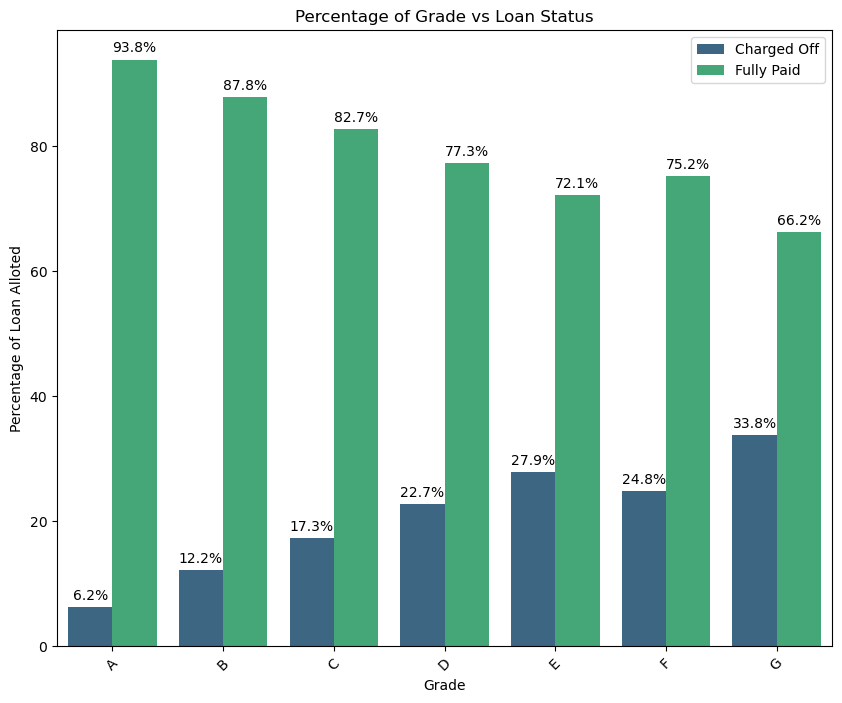

In [3808]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for grade vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "grade",
                            y_col = "loan_status", title = 'Percentage of Grade vs Loan Status',
                              x_label = 'Grade')

<div class="alert alert-block alert-success"><b>Conclusion:</b> With Grade F as exception, with increase in Grade there is increase in Charged Off Loans</div>

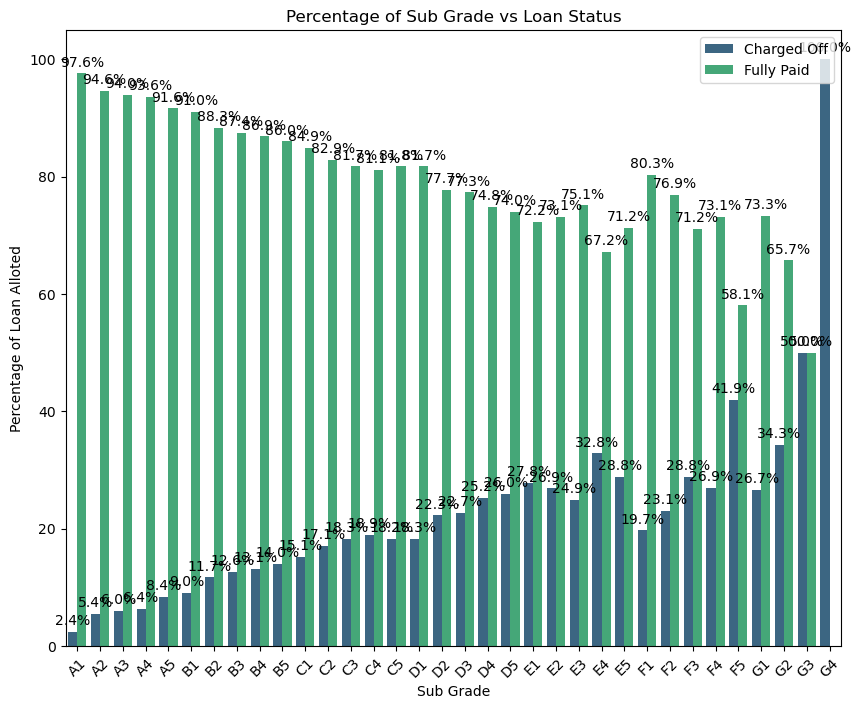

In [3809]:
# Set size of plot
plt.figure(figsize=(10, 8))

# Plotting the percentage count plot for sub_grade vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "sub_grade",
                            y_col = "loan_status", title = 'Percentage of Sub Grade vs Loan Status',
                              x_label = 'Sub Grade')

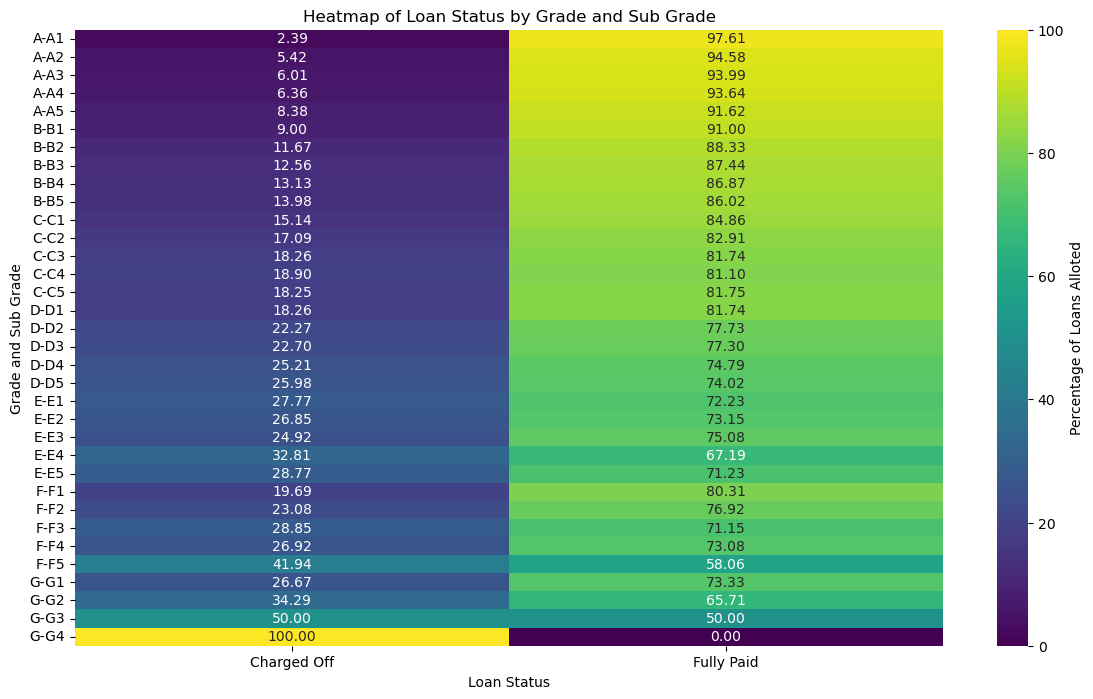

In [3810]:
#Heatmap of Loan Status by Grade and Sub Grade

# Create a pivot table
sub_grade_pivot_table = pd.pivot_table(loan_data, index=['grade', 'sub_grade'], 
                             columns='loan_status', aggfunc='size', fill_value=0) #group by grade and sub_grade and segmented by loan status

# Calculate percentages
sub_grade_pivot_table_percentage = sub_grade_pivot_table.apply(lambda x: x / x.sum() * 100, axis=1)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(sub_grade_pivot_table_percentage, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Percentage of Loans Alloted'})
plt.title('Heatmap of Loan Status by Grade and Sub Grade')
plt.xlabel('Loan Status')
plt.ylabel('Grade and Sub Grade')
plt.show()

<div class="alert alert-block alert-success"><b>Conclusion:</b><br> 
1. With certain Sub Grade within Grade as exception, with increase in Sub Grade there is increase in Charged Off Loans<br>
2. Sub Grade G4 has 100% Charged Off Loan Status. No loan should be alloted to Sub Grade G4.
</div>


---
#### 14. Verification Status

<b>Univariate Analysis</b>

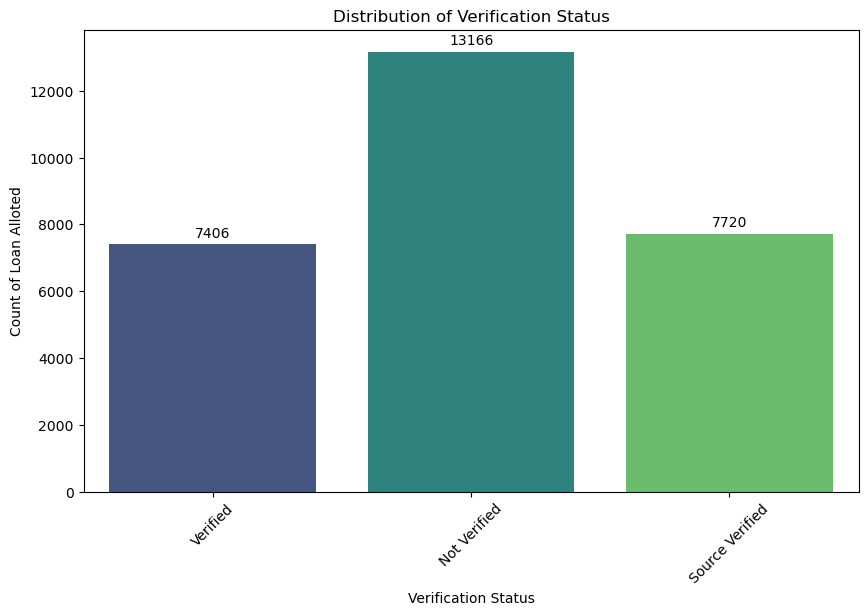

In [3811]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for verification_status
univariate_bar_plot(data = loan_data, col = 'verification_status',title = 'Distribution of Verification Status',x_label = 'Verification Status')

In [3812]:
print('Not verified percent of borrowers: ',str(np.round(100 * 13166/len(loan_data),2)) + '%')

Not verified percent of borrowers:  46.54%


<div class="alert alert-block alert-warning"><b>Conclusion:</b> 46.54% of loans alloted to not verified borrower.</div>

<b>Bivariate Analysis</b>

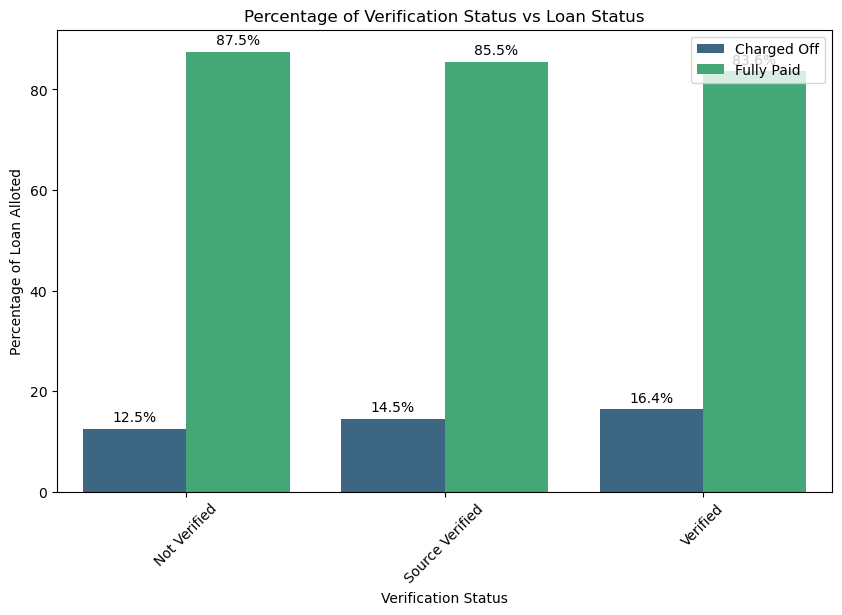

In [3813]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the percentage count plot for verification_status vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "verification_status",
                            y_col = "loan_status", title = 'Percentage of Verification Status vs Loan Status',
                              x_label = 'Verification Status')

<div class="alert alert-block alert-warning"><b>Conclusion:</b>  Strangely, Verified Borrowers have defaulted more compared to non verified. <b>This could suggest that verification alone does not eliminate the risk of default.</b></div>

---
#### 15. Purpose

<b>Univariate Analysis</b>

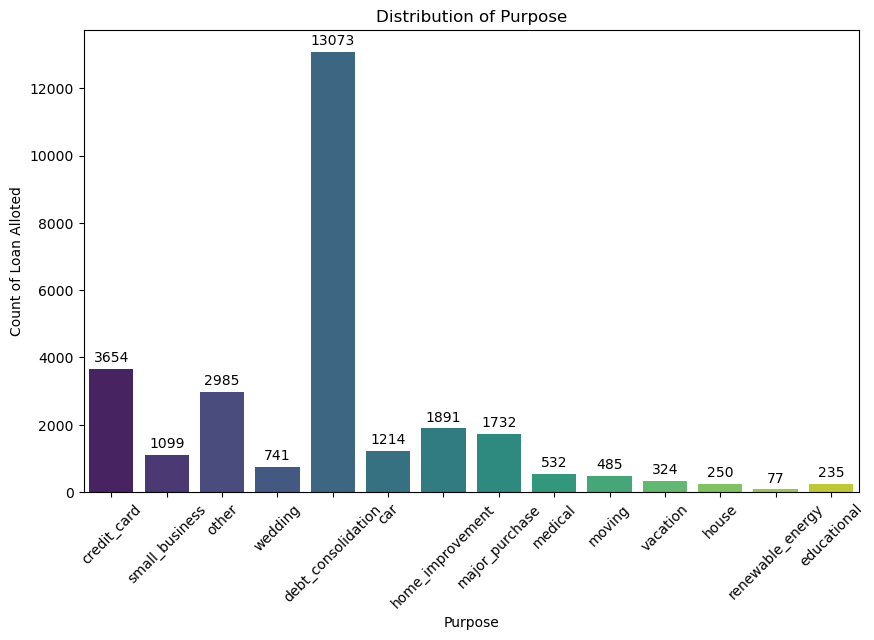

In [3814]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for purpose
univariate_bar_plot(data = loan_data, col = 'purpose',title = 'Distribution of Purpose',x_label = 'Purpose')

In [3815]:
print('Loans with purpose as debt consolidation: ',str(np.round(100 * 13073/len(loan_data),2)) + '%')

Loans with purpose as debt consolidation:  46.21%


<div class="alert alert-block alert-warning"><b>Conclusion:</b> 46.21% of the loan purpose was debt consolidation.</div>

<b>Bivariate Analysis</b>

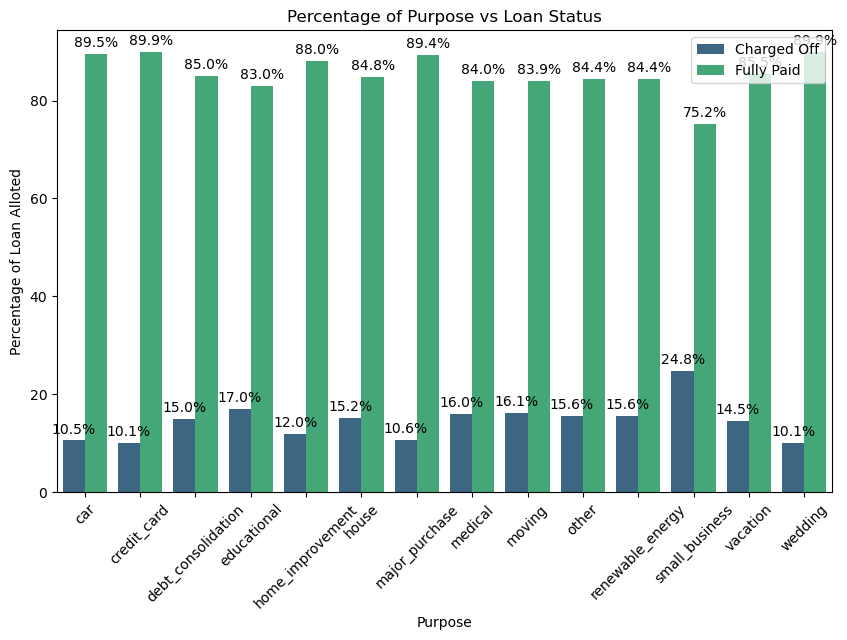

In [3816]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the percentage count plot for Purpose vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "purpose",
                            y_col = "loan_status", title = 'Percentage of Purpose vs Loan Status',
                              x_label = 'Purpose')

<div class="alert alert-block alert-success"><b>Conclusion:</b><br>
1. Loan with purpose of 'Renewable Energy' defaulted the most, around 24.8% of default rate.<br>
2. Debt Consolidation has around 17% default rate, and around 46.21% of loans are for this purpose. This loans should be considered carefully</div>

---
#### 16. Employment Length

<b>Univariate Analysis</b>

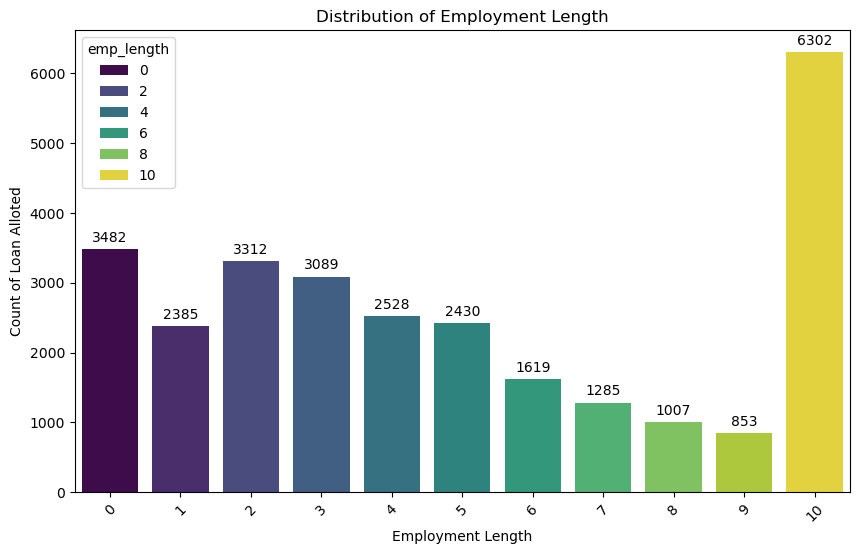

In [3817]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for emp_length
univariate_bar_plot(data = loan_data, col = 'emp_length',title = 'Distribution of Employment Length',x_label = 'Employment Length')

In [3818]:
print('Employment Length: ',str(np.round(100 * 6302/len(loan_data),2)) + '%')

Employment Length:  22.27%


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Majority borrowers (22.27%) had employment length atleast 10 years.</div>

<b>Segmented Univariate Analysis</b>

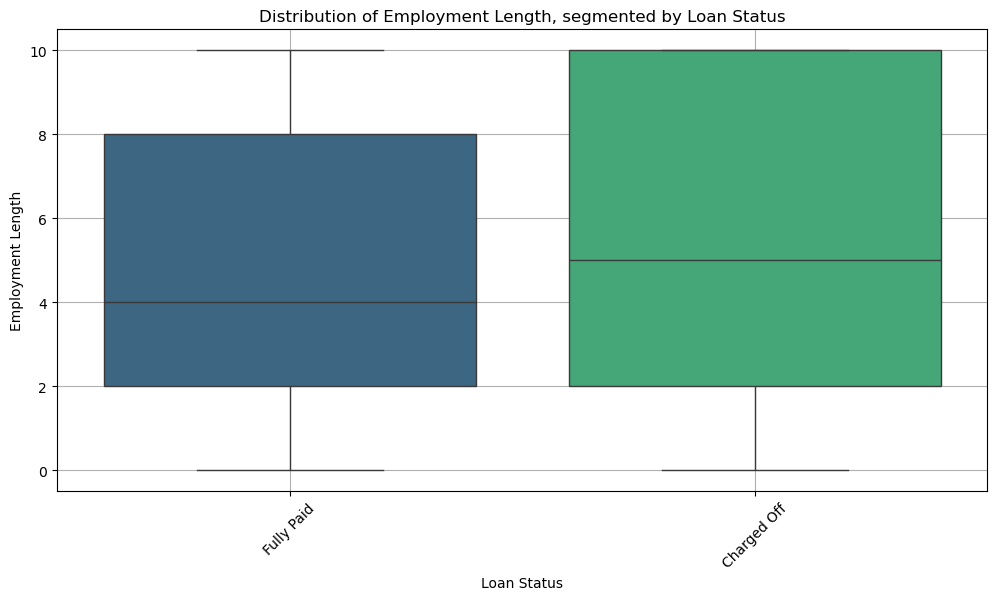

In [3819]:
# Set size of plot
plt.figure(figsize=(12, 6))

#Plotting the box plot for emp_length segmented by loan_status
univariate_box_plot(data = loan_data, y_col = 'emp_length', segment_col = 'loan_status', 
                    title='Distribution of Employment Length, segmented by Loan Status', 
                    x_label='Loan Status', y_label='Employment Length')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Borrowers with Charged Off loans tend to have a higher median employment length compared to those with Fully Paid loans. This could indicate that a longer employment history alone is not a sufficient predictor of loan repayment success.</div>

<b>Bivariate Analysis</b>

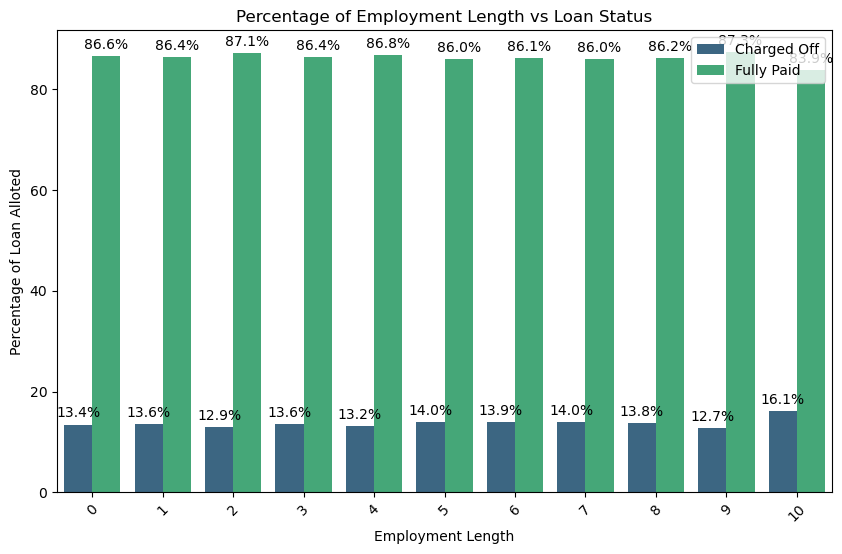

In [3820]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the percentage count plot for Employment Length vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "emp_length",
                            y_col = "loan_status", title = 'Percentage of Employment Length vs Loan Status',
                              x_label = 'Employment Length')

<div class="alert alert-block alert-success"><b>Conclusion:</b><br>
Borrowers with employment length of atleast 10 years has higher chance of defaulting.
</div>

---
#### 17. Home Ownership

<b>Univariate Analysis</b>

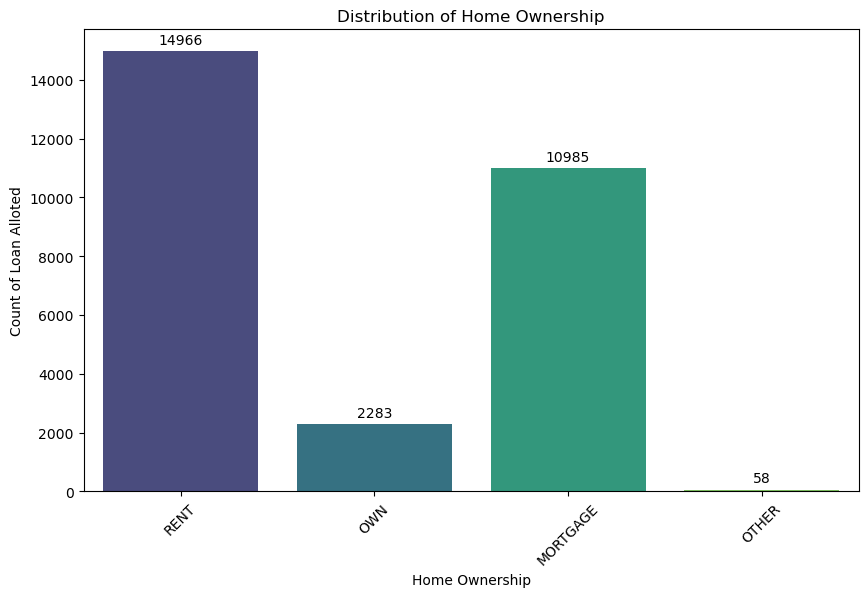

In [3821]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the bar plot for home_ownership
univariate_bar_plot(data = loan_data, col = 'home_ownership',title = 'Distribution of Home Ownership',x_label = 'Home Ownership')

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Most of the house are rented, while very few houses are owned.</div>

<b>Bivariate Analysis</b>

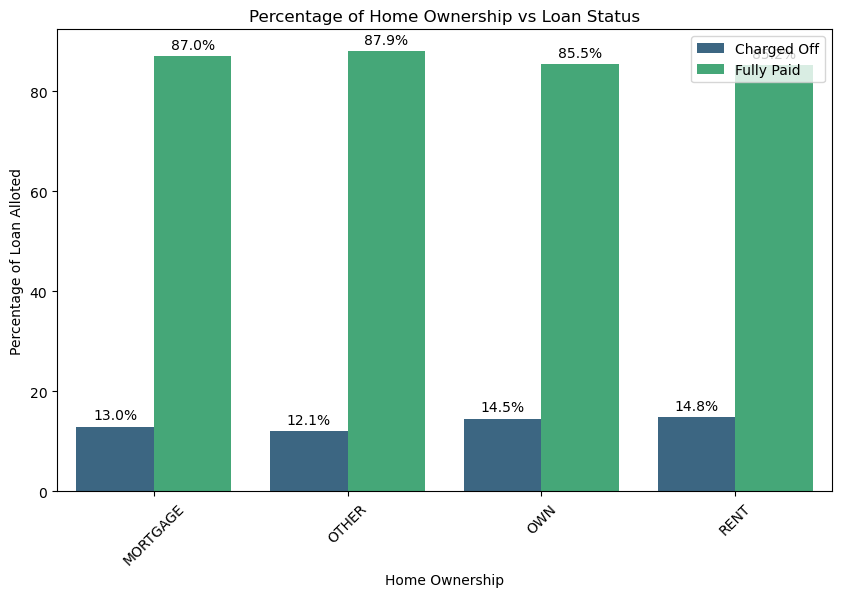

In [3822]:
# Set size of plot
plt.figure(figsize=(10, 6))

# Plotting the percentage count plot for home_ownership vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "home_ownership",
                            y_col = "loan_status", title = 'Percentage of Home Ownership vs Loan Status',
                              x_label = 'Home Ownership')

<div class="alert alert-block alert-warning"><b>Conclusion:</b><br>
Although "Other" home ownership has lowest 12.1% of Loan Default Rate, still we can't conclude with the above chart.</div>

---
#### 18. State (Address)

<b>Univariate Analysis</b>

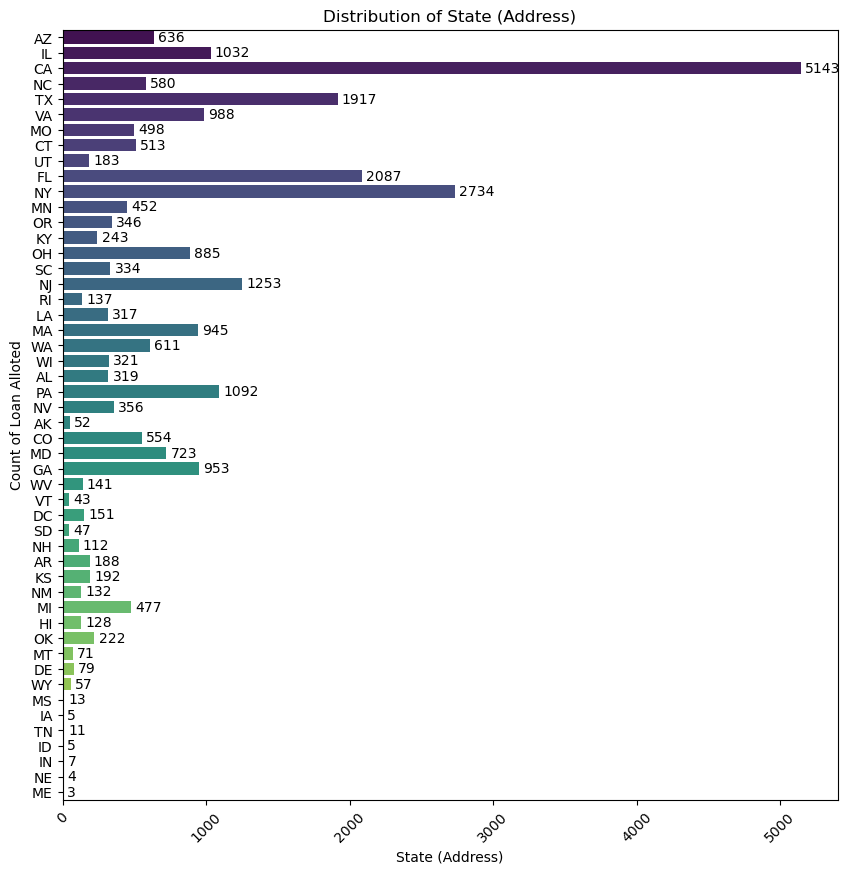

In [3823]:
# Set size of plot
plt.figure(figsize=(10, 10))

# Plotting the bar plot for addr_state
univariate_bar_plot(data = loan_data, col = 'addr_state',title = 'Distribution of State (Address)',x_label = 'State (Address)',horizontal = True)

<div class="alert alert-block alert-warning"><b>Conclusion:</b> CA (California) has taken most loans, while ME (Maine) has taken least loans</div>

<b>Bivariate Analysis</b>

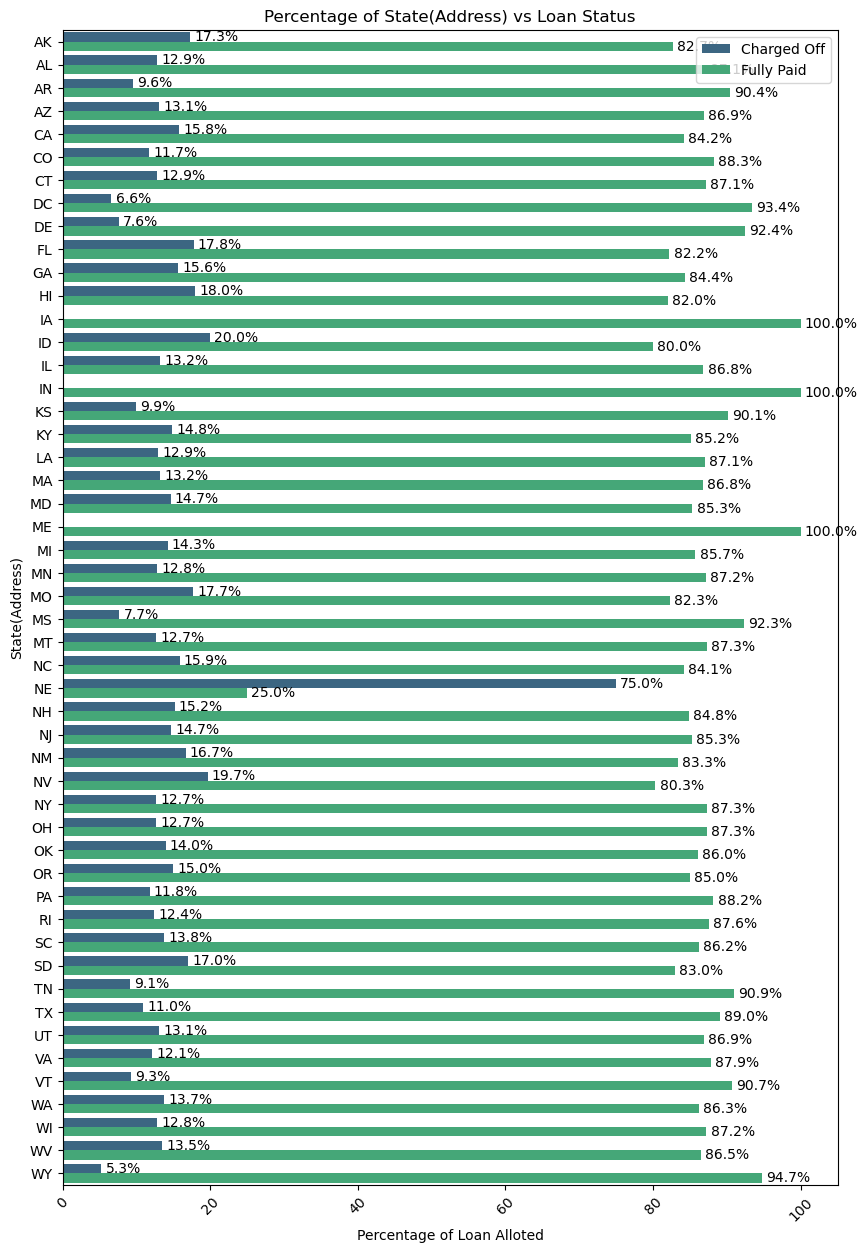

In [3824]:
# Set size of plot
plt.figure(figsize=(10, 15))

# Plotting the percentage count plot for addr_state vs loan_status
bivariate_percent_bar_plot(data = loan_data, x_col = "addr_state",
                            y_col = "loan_status", title = 'Percentage of State(Address) vs Loan Status',
                              x_label = 'State(Address)', horizontal=True)

<div class="alert alert-block alert-success"><b>Conclusion:</b><br>
Note: NE, IA, IN and ME has taken very less loans. So, below conclusion cannot be taken into consideration.<br>
1. NE (Nebraska) had 75% (very high) charged off loan<br>
2. IA (Iowa), IN (Indiana) and ME (Maine) had 100% Fully Paid Loan Status
</div>

We will filter out all the states whose count is below 25 percentile threshold and perform bivariate analysis.

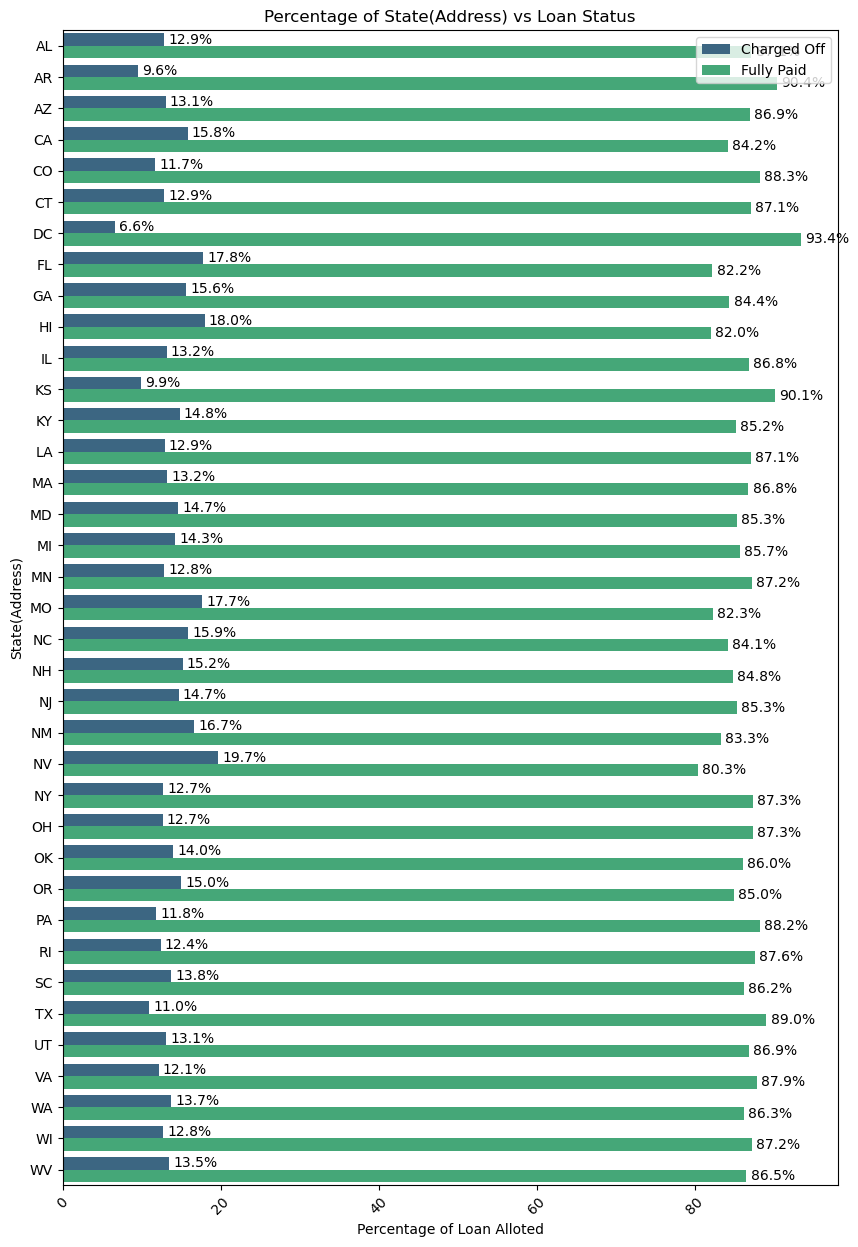

In [3825]:
# Calculate the 25th percentile of record counts by state
state_counts = loan_data['addr_state'].value_counts()
threshold = state_counts.quantile(0.25)

# Filter the states that have record counts above the 25th percentile
states_above_threshold = state_counts[state_counts > threshold].index
state_filtered_loan_data = loan_data[loan_data['addr_state'].isin(states_above_threshold)]

# Set size of plot
plt.figure(figsize=(10, 15))

# Plotting the percentage count plot for addr_state vs loan_status, for state having record count above 25 percentile
bivariate_percent_bar_plot(data = state_filtered_loan_data, x_col = "addr_state",
                            y_col = "loan_status", title = 'Percentage of State(Address) vs Loan Status',
                              x_label = 'State(Address)', horizontal=True)

<div class="alert alert-block alert-success"><b>Conclusion (for state having loan count having 25+ percentile):</b><br>
1. NV (Nebraska) had highest charged off loan status about 19.7%<br>
2. DC has highest paid off loan status for about 93.4%
</div>

---
#### 19. Remaining columns/variables

<b>Segmented Univariate Analysis</b>

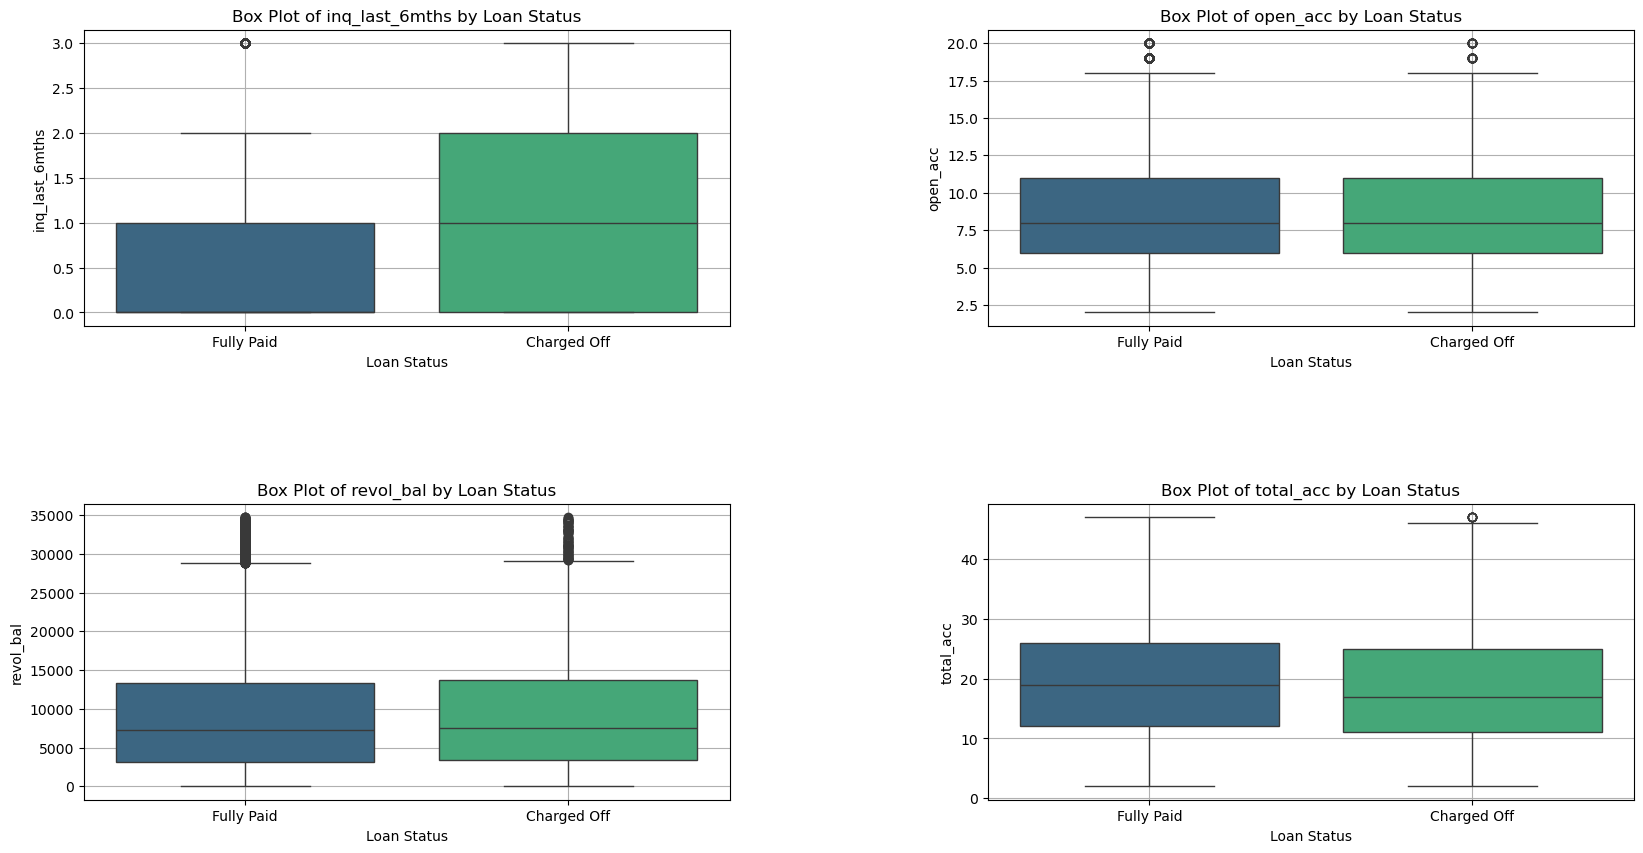

In [3826]:
# Number of rows and columns for the subplots
remaining_more_diverse_numerical_columns = [   
       
        'inq_last_6mths', 'open_acc',
       'revol_bal', 'total_acc'
]
num_cols = 2
num_rows = (len(remaining_more_diverse_numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), gridspec_kw={'wspace': 0.4, 'hspace': 0.6})

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each box plot
for i, col in enumerate(remaining_more_diverse_numerical_columns):
    sns.boxplot(x='loan_status', y=col, data=loan_data, ax=axes[i], palette='viridis',hue='loan_status')
    axes[i].set_title(f'Box Plot of {col} by Loan Status')
    axes[i].set_xlabel('Loan Status')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(remaining_more_diverse_numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

<div class="alert alert-block alert-success"><b>Conclusion:</b><br>
1. Both Loan Status show that inquiries in the last 6 months <b>(inq_last_6mths)</b> have a slightly higher median for Charged Off loans.
This suggests that customers with more inquiries in the last 6 months are somewhat more likely to be charged off.<br>
2. The number of open accounts <b>(open_acc)</b> shows no major conclusions.<br>
3. Revolving Balance <b>(revol_bal)</b> shows no major conclusions.<br>
4. The total number of credit line accounts <b>(total_acc)</b> shows a slightly higher median for Fully Paid loans. Which suggests having more accounts seems to correlate with payment behaviour and are more likely to fully pay the loan.<br>
</div>


<b>Bivariate Analysis</b>

Let's analyse ordinal categorical variables such as delinq_2yrs, pub_rec, pub_rec_bankruptcies and inq_last_6mths further using bivariate analysis.

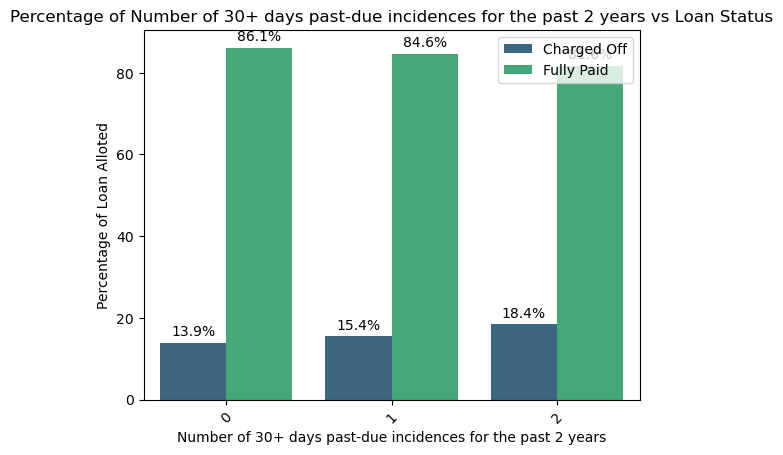

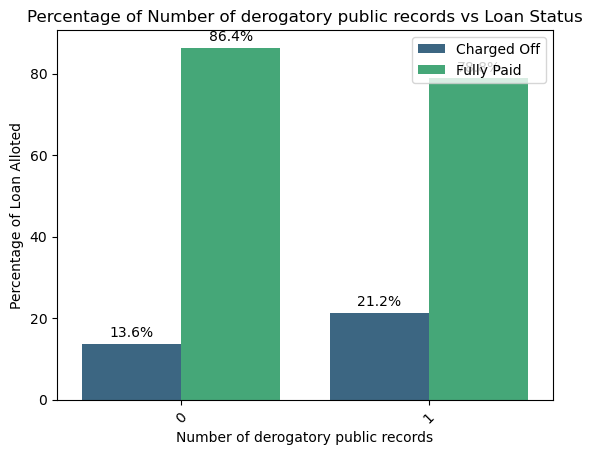

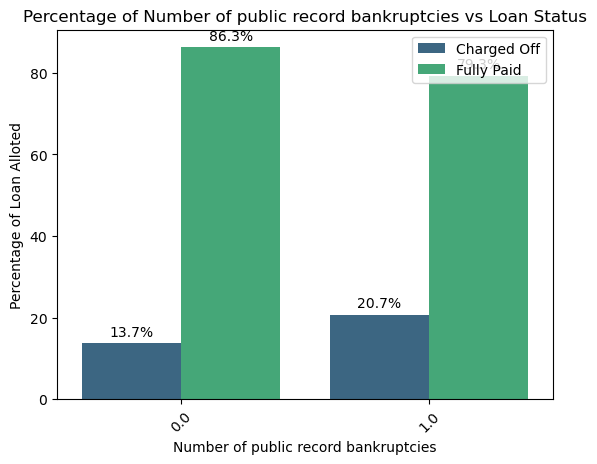

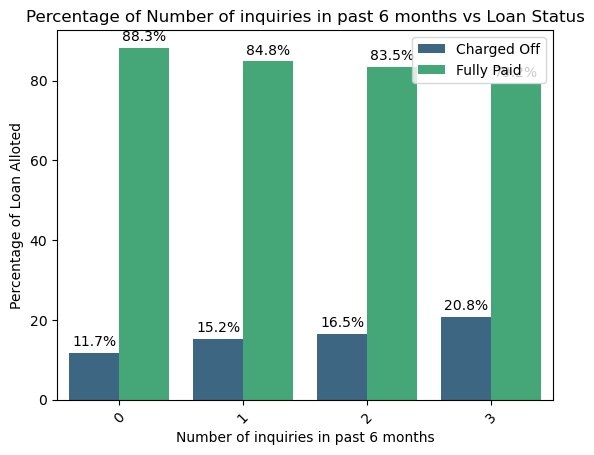

In [3827]:
remaining_ordinal_categorical_columns ={'delinq_2yrs':'Number of 30+ days past-due incidences for the past 2 years',
                                         'pub_rec':'Number of derogatory public records', 'pub_rec_bankruptcies':'Number of public record bankruptcies' , 
                                         'inq_last_6mths': 'Number of inquiries in past 6 months'}
# Plotting the percentage count plot for remaining_ordinal_categorical_columns vs loan_status
for column_id, column_label in remaining_ordinal_categorical_columns.items():
    bivariate_percent_bar_plot(data = loan_data, x_col = column_id,
                                y_col = "loan_status", title = f'Percentage of {column_label} vs Loan Status',
                                x_label = column_label)

<div class="alert alert-block alert-success"><b>Conclusion:</b><br>
There is direct relationship between charged off loan and below column. Lesser the value, Lesser chances of getting default. Indicating lesser value or even 0 in all below column will result in better repayment of loan.<br>
1. Number of 30+ days past-due incidences for the past 2 years <b>(delinq_2yrs)</b><br>
2. Number of derogatory public records <b>(pub_rec)</b><br>
3. Number of public record bankruptcies <b>(pub_rec_bankruptcies)</b><br>
4. Number of inquiries in past 6 months <b>(inq_last_6mths)</b><br>
</div>

---
---
## Summary of Key Conclusions:

1. **Loan Amount and Default Risk**:
   - Higher loan amounts (above $15K) correlate with a greater risk of default.
   - Higher loan amounts relative to income (loan-to-income ratio) are associated with higher default risk.

2. **Income and Default Risk**:
   - Borrowers with lower annual incomes are associated with a higher chance of defaulting on loans.
   - Higher income groups are associated with a higher likelihood of fully paying their loans.

3. **Debt-to-Income (DTI) Ratio**:
   - Higher DTI ratios are correlated with higher default rates.
   - Lower DTI ratios are associated with a higher likelihood of fully paying the loan.

4. **Installment Amount**:
    - Higher installment amounts as a percent of the consumer's monthly income are associated with a higher chance of being charged off.

5. **Loan Term and Default Risk**:
   - Longer loan terms are associated with higher default rates.

6. **Revolving Utilization**:
   - Higher revolving utilization (credit card balances relative to credit limits) is associated with higher default risk.

7. **Interest Rates**:
   - Higher interest rates (above 10%) are linked to higher default rates.

7. **Issue Date**:
   - Loans issued during the 2008 recession had higher default rates.
   - Last quarter of each year and specially month of December are linked to higher default rates.

7. **Credit History**:
   - Longer credit histories are associated with a higher likelihood of fully paying loans.
   - Borrowers with more inquiries in the last 6 months are associated with a higher chance of defaulting.

8. **Loan Purpose**:
   - Loans for debt consolidation and renewable energy are associated with higher default rates.

9. **Employment Length**:
   - Borrowers with longer employment histories tend to have higher default rates.
   - This may indicate that employment length alone is not a sufficient predictor of loan repayment success.

10. **Verification Status**:
    - Verified borrowers have higher default rates compared to non-verified borrowers, indicating that verification alone does not eliminate default risk.

11. **State Analysis**:
- NE, IA, IN, and ME have taken **very few loans**. So, the conclusions for these states **cannot be taken into consideration.**
    - NE (Nebraska) had 75% (very high) charged off loans.
    - IA (Iowa), IN (Indiana), and ME (Maine) had 100% Fully Paid Loan Status.
- For states with loan counts above the 25th percentile:
    - NV (Nevada) had the highest charged off loan status.
    - DC (District of Columbia) has the highest fully paid loan status.

12. **Public Records**:
   -  Consumers with no public records have better repayment history.
<br>

---
---
## Next Business Steps:

1. **Pricing and Lending**:
   - Pricing strategies may include offering better interest rates or lower approval criteria to low risk borrowers (e.g., those with low DTI, high income, and long credit histories).
   - Set higher interest rates or stricter approval criteria for high risk borrowers (e.g., those with high revolving utilization and low incomes).

2. **Limiting Loan Amount**:
   - Consider capping loan amounts for borrowers with lower incomes to reduce the risk of default.
   - Implement stricter approval criteria for loans above certain amounts, especially for borrowers with high loan-to-income ratios.

3. **Targeted Marketing and Offers**:
   - Focus marketing efforts on low risk borrower segments (high income, low DTI, good credit history).
   - Offer incentives for borrowers to maintain low revolving balances and improve their credit scores.

4. **Creditworthiness Assessment**:
   - Incorporate additional factors into creditworthiness assessments, such as revolving utilization and DTI.
   - Develop more robust credit scoring models that account for employment length, credit history length, and loan purpose.

5. **Monitoring and Adjustments**:
   - Continuously monitor loan performance and adjust risk assessment models based on emerging trends (e.g., economic conditions, borrower behavior).
   - Use data analytics to identify early warning signs of potential defaults and intervene with proactive measures

6. **Geographical Focus**:
   - Tailor lending strategies based on state specific performance. For example, implement more stringent criteria in states with higher default rates.
   - Conduct further analysis to understand regional differences and develop localized strategies.

7. **Loan Purpose and Verification**:
   - Be cautious with loans for high risk purposes (e.g., debt consolidation, renewable energy) and implement additional checks.

---
---
